In [1]:
import sys
import os

import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
import pandas as pd
import datetime
import copy


from statsmodels.stats.diagnostic import acorr_ljungbox
from statsmodels.tsa.stattools import acf

import matplotlib.dates as mdates
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import ticker as mticker

# Local files
__root__ = '../../'
module_path = os.path.abspath(os.path.join(__root__[:-1]))
if module_path not in sys.path:
    sys.path.append(f"{module_path}/py/")

import log_ret

import misc_functions as misc_fns
import plot_functions as plot_fns
import dist_functions as dist_fns
import hawkes_functions as hwks_fns
import log_ret_functions as lr_fns
import cvol_functions as cvol_fns
import greek_roman as GR

In [2]:
# Set seed
np.random.seed(3791)

In [3]:
plot_fns.plt_setup(plt, SMALL_SIZE=6.5, MEDIUM_SIZE=6.5, BIGGER_SIZE=8)
cols = plot_fns.calc_cols()
cols_CI = plot_fns.calc_cols_CI()
cols_tail = plot_fns.calc_cols_tail(rows=True)


In [4]:
r_r = f"r"

resid_r = f"\\tilde{{{r_r}}}"
sim_r = f"\\acute{{{r_r}}}"

tilde_t_cont = "\\Lambda"
tilde_t_disc = "\\Pi"

In [5]:
def get_sd_not_scale():
    return False

def get_dpi(dpi=None):
    if dpi is None:
        dpi = 300
    return dpi

def get_thesis(thesis=None):
    if thesis is None:
        thesis = True
    return thesis


def get_an_mode(mode=None):
    if mode is None:
        mode = 'thesis'
    return mode


def get_C_str_matter():
    return 'm'
def get_C_str_n():
    return 3
def get_C_str_n_post():
    return ':'
def get_C_str_initchr():
    return 'A'


def calc_C_str(C_str_nl_pre=None, C_str_matter=None, C_str_n=None, C_str_l=None, C_str_n_post=None, C_str_l_post=None, C_str_initchr=None):

    if C_str_matter is None:
        C_str_matter = get_C_str_matter()
    if C_str_n is None:
        C_str_n = get_C_str_n()
    if C_str_n_post is None:
        C_str_n_post = get_C_str_n_post()
    if C_str_initchr is None:
        C_str_initchr = get_C_str_initchr()

    return plot_fns.calc_C_str(C_str_nl_pre=C_str_nl_pre, C_str_matter=C_str_matter, C_str_n=C_str_n, C_str_l=C_str_l, C_str_n_post=C_str_n_post, C_str_l_post=C_str_l_post, C_str_initchr=C_str_initchr)


C_str = calc_C_str()



def get_app_dlrs():
    return True
def get_app_tex_num():
    return True

def capp_dlrs(S, app_dlrs=None):

    if app_dlrs is None:
        app_dlrs = get_app_dlrs()

    return misc_fns.capp_dlrs(S=S, app_tex_num=app_dlrs)

def capp_tex_num(S, app_tex_num=None):

    if app_tex_num is None:
        app_tex_num = get_app_tex_num()

    return misc_fns.capp_tex_num(S=S, app_tex_num=app_tex_num)


def capp_dlrs_tex_num(S=None, app_dlrs=None, app_tex_num=None, app_null=None):

    if app_dlrs is None:
        app_dlrs = get_app_dlrs()
    if app_tex_num is None:
        app_tex_num = get_app_tex_num()

    return misc_fns.capp_dlrs(S=misc_fns.capp_tex_num(S=S, app_tex_num=app_tex_num, app_null=app_null), app_dlrs=app_dlrs, app_null=app_null)




def calc_root(root=None, mkdir=None):

    if root is None:
        root = __root__
    return plot_fns.calc_root(root=root, mkdir=mkdir)



def calc_subdir(subs=None, field=None, postsubs=None, app_field=None, root=None, mkdir=None, app_fn=None):

    if app_fn is None:
        app_fn = True

    root = calc_root(root=root, mkdir=mkdir)

    if postsubs is None:
        postsubs = []
    postsubs = misc_fns.make_iterable_array(postsubs)

    if app_fn:
        postsubs = np.concatenate([['T23', f"T23_{calc_C_str()['n'][:-1]}"], postsubs])


    return plot_fns.calc_subdir(subs=subs, field=field, postsubs=postsubs, app_field=app_field, root=root, mkdir=mkdir)


def calc_dir(dir=None, subs=None, field=None, postsubs=None, app_field=None, root=None, mkdir=None, app_fn=None):

    if mkdir is None:
        mkdir = True

    if dir is None:
        dir = calc_subdir(subs=subs, field=field, postsubs=postsubs, app_field=app_field, root=root, mkdir=mkdir, app_fn=app_fn)
    else:
        dir = plot_fns.mkdir_export(dir, mkdir=mkdir)

    return dir


def calc_write_address(dir=None, subs=None, root=None, mkdir=None, app_fn=None, file_nm=None, file_ext=None):

    dir = calc_dir(dir=dir, subs=subs, root=root, mkdir=mkdir, app_fn=app_fn)

    return plot_fns.calc_write_address(dir=dir, mkdir=False, file_nm=file_nm, file_ext=file_ext)


def print_str_pw(print_str=None, do_print=None, do_write=None, write_mode=None, write_address=None, 
                 dir=None, subs=None, field=None, postsubs=None, app_field=None, root=None, mkdir=None, app_fn=None,
                 file_nm=None, file_ext=None):
    
    if field is None:
        field = 'tables' 

    dir = calc_dir(dir=dir, subs=subs, field=field, postsubs=postsubs, app_field=app_field, root=root, mkdir=mkdir, app_fn=app_fn)

    return plot_fns.print_str_pw(print_str=print_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, 
                                 dir=dir, mkdir=False,  file_nm=file_nm, file_ext=file_ext)


def get_dpi(dpi=None):
    if dpi is None:
        dpi = 300
    return dpi


def fig_export(fig, height=None, width=None, 
               dir=None, subs=None, field=None, postsubs=None, app_field=None, root=None, mkdir=None, app_fn=None,
               thesis=None, formats=None, dpi=None):

    if field is None:
        field = 'figures'  

    dir = calc_dir(dir=dir, subs=subs, field=field, postsubs=postsubs, app_field=app_field, root=root, mkdir=mkdir, app_fn=app_fn)

    plot_fns.fig_export(fig=fig, height=height, width=width, dir=dir, mkdir=False, formats=formats, dpi=get_dpi(dpi=dpi), thesis=get_thesis(thesis=thesis))

In [6]:
B20_setup = dict()

B20_setup['results_dir'] = f"{__root__}results/"

B20_setup['datetime'] = dict()
B20_setup['datetime']['dt'] = {'w': datetime.datetime.now(datetime.timezone.utc)}
B20_setup['datetime']['str'] = {i: misc_fns.dt_str(B20_setup['datetime']['dt'][i]) for i in B20_setup['datetime']['dt']}


#B20_setup['ticks'] = ['SPX', 'DJI', 'DAX', 'CAC', 'NKX', 'HSI']
B20_setup['ticks'] = ['SPX']

#B20_setup['a_q'] = np.array([float(f'{x:.5f}') for x in 0.0025*(1+np.array(range(60)))])
B20_setup['a_q'] = np.array([float(f'{x:.5f}') for x in [0.025]])

B20_setup['a_u'] = np.array([float(f'{x:.5f}') for x in 0.0125*(1+np.array(range(20)))])



B20_setup['mode_bound'] =   {
                                'bi': 'both',
                                'bi_d': ['both', 'left', 'right'],
                                'ci': 'both',
                                'ci_s': 'both',
                            }


B20_setup['dates'] = {
                        'all_start': pd.Timestamp("1959-10-02"),
                        #'all_end': pd.Timestamp("2020-11-20"),
                        'all_end': pd.Timestamp("2023-09-16"),
                        'train_end': pd.Timestamp("2008-09-01"),
                    }

In [7]:
B20_setup['a_u']

array([0.0125, 0.025 , 0.0375, 0.05  , 0.0625, 0.075 , 0.0875, 0.1   ,
       0.1125, 0.125 , 0.1375, 0.15  , 0.1625, 0.175 , 0.1875, 0.2   ,
       0.2125, 0.225 , 0.2375, 0.25  ])

In [8]:
B20 = log_ret.log_ret(dir_base=__root__, ticks=B20_setup['ticks'])

In [9]:
fix_a_lambda=True

In [10]:
B20.set_tk(
                **B20_setup['dates'],
                cv_vol=["GARCH"], cv_p=1, cv_o=[0,1], cv_q=1, cv_dist=["norm", "t"],
                tt_a_u=B20_setup['a_u'], tt_dt_dt_fine=24, tt_fix_a_lambda=fix_a_lambda,
                hb_dist=["norm"], hb_bound=None, hb_mode_bound=B20_setup['mode_bound'], hb_set_fit=True,
                a_q=B20_setup['a_q'],
                #cv_set_am_stats=True, cv_set_eval=False, append_fit_cv_w=True, append_vrs_cv_w=False, cv_write_tick=False,
                #tt_i_0=0, tt_read_params=True, tt_fit_if_need=False,
                set_cv=False, set_tt=True,
                save_t=True, 
                CT_Q=[], CT_E=[]
        )

	mp run 1/1 (n_proc = 1)
	start: 2024-06-04 23:25:19.532001+00:00
	  end: 2024-06-04 23:28:40.873935+00:00 | delta: 0 days 00:03:21.341723899


In [11]:
cv_mp_tick_time = B20.set_cv_mp_tick(set_am_stats=True, set_eval=False, append_fit_cv_w=True, append_vrs_cv_w=False, write_tick=False)

	mp run 1/1 (n_proc = 1)
	start: 2024-06-04 23:28:40.890570+00:00
	  end: 2024-06-04 23:31:52.552285+00:00 | delta: 0 days 00:03:11.661746499


In [12]:
B20.set_fit_tt_mp_tick(write_tick=False,
                        a_u_rng=[1], tt_fix_a_lambda=fix_a_lambda, tt_read_params=True, tt_fit_if_need=False, append_fit_tt_w=False)

	mp run 1/1 (n_proc = 1)
	start: 2024-06-04 23:31:52.567260+00:00
	  end: 2024-06-04 23:35:03.931531+00:00 | delta: 0 days 00:03:11.364708100


[{'start': Timestamp('2024-06-04 23:31:52.567260+0000', tz='UTC'),
  'end': Timestamp('2024-06-04 23:35:03.931531+0000', tz='UTC'),
  'delta': Timedelta('0 days 00:03:11.364708100')}]

In [13]:
tick="SPX"
mode='bi'
mark='mark'

B20.tk[tick].tt.tt[mode][mark]._parameters.a_u.get_value()

array([0.025, 0.025])

In [14]:
B20.tk[tick].tt.tt[mode][mark]._parameters.a_lambda.get_value()

array([0.025, 0.025])

In [15]:
B20.tk[tick].tt.tt[mode][mark]._parameters.a_lambda.get_default()

array([0.025, 0.025])

In [16]:

tails = [f"L", f"R"]
signs = np.array([-1,1])


T_year = 252


str_dp=1
str_exp_plus=True
str_exp_zeros=2


tail_fit_setup = {
                    'u': np.outer([-1,1], [0.005, 0.01, 0.025, 0.05, 0.075, 0.1, 0.2]),
                    'a_u': np.outer([1,1], B20_setup['a_u']),
                }




for tick in B20.tk:
    B20.tk[tick]._T = {period: B20.tk[tick].pd.lr["p"][period].values.size for period in ['train', 'all']}
    B20.tk[tick]._N = {period: np.array([[np.sum(signs[i]*B20.tk[tick].pd.lr["p"][period].values > signs[i]*tail_fit_setup['u'][i,j]) for j in range(tail_fit_setup['u'].shape[1])] for i in range(signs.size)]) for period in ['train', 'all']}
    for val in ['T', 'N']:
        B20.tk[tick].__dict__[f"_{val}"]['forecast'] = B20.tk[tick].__dict__[f"_{val}"]['all'] - B20.tk[tick].__dict__[f"_{val}"]['train']



    B20.tk[tick]._stat_dist_fit = dict()
    for dist in ['norm', 't']:
        B20.tk[tick]._stat_dist_fit[f"{dist}_ML"] = dist_fns.calc_scipy_dist_est_se_log_L(data=B20.tk[tick].pd.lr["p"]["train"].values, dist=dist)
    Q_rng = [0.25, 0.75]
    B20.tk[tick]._stat_dist_fit[f"norm_Q"] = dist_fns.calc_scipy_dist_est_se_log_L(data=B20.tk[tick].pd.lr["p"]["train"].values, dist='norm', est=np.array([np.median(B20.tk[tick].pd.lr["p"]["train"].values),
                                                                                                                                        (np.diff(np.quantile(B20.tk[tick].pd.lr["p"]["train"].values, Q_rng))/np.diff(scipy.stats.norm().ppf(Q_rng)))[0]]))
    
    meanstd = B20.tk[tick]._stat_dist_fit[f"norm_ML"]['est']
    B20.tk[tick]._stat_dist_fit["t_ML_f"] = dist_fns.calc_scipy_dist_est_se_log_L(data=B20.tk[tick].pd.lr["p"]["train"].values, dist='t', est=np.array([meanstd[0], meanstd[1],
                                                                                                                                                scipy.stats.t.fit((B20.tk[tick].pd.lr["p"]["train"].values-meanstd[0])/meanstd[1], floc=0, fscale=1)[0]]))
    
    B20.tk[tick]._stat_dist = dict()
    B20.tk[tick]._stat_dist_symb = dict()
    B20.tk[tick]._stat_dist_symb_fit = dict()
    B20.tk[tick]._stat_dist_symb_mod = dict()
    for dist in B20.tk[tick]._stat_dist_fit:
        B20.tk[tick]._stat_dist[dist] = scipy.stats.__getattribute__(dist[:dist.find("_")])(*B20.tk[tick]._stat_dist_fit[dist]['est'])
        B20.tk[tick]._stat_dist_symb[dist] = dist_fns.get_scipy_dist_symb(dist[:dist.find('_')])
        B20.tk[tick]._stat_dist_symb_fit[dist] = dist_fns.get_scipy_dist_symb(dist[:dist.find('_')])
        B20.tk[tick]._stat_dist_symb_mod[dist] = dist_fns.get_scipy_dist_symb(dist[:dist.find('_')])

    for dist in ['norm', 't']:
        #B20.tk[tick]._stat_dist_symb_fit[f"{dist}_ML"] = B20.tk[tick]._stat_dist_symb_fit[f"{dist}_ML"] + f"_{{\\mathrm{{ML}}}}"
        B20.tk[tick]._stat_dist_symb_fit[f"{dist}_ML"] = B20.tk[tick]._stat_dist_symb_fit[f"{dist}_ML"] + f"_{{W}}"
        B20.tk[tick]._stat_dist_symb_mod[f"{dist}_ML"] = f"{cvol_fns.calc_cv_vol_symb(val='uv')}^{{{B20.tk[tick]._stat_dist_symb[f'{dist}_ML']}}}"
    
    B20.tk[tick]._stat_dist_symb_fit[f"norm_Q"] = B20.tk[tick]._stat_dist_symb_fit[f"norm_Q"] + f"_{{Q}}"
    #B20.tk[tick]._stat_dist_symb_fit[f"t_ML_f"] = B20.tk[tick]._stat_dist_symb_fit[f"t_ML_f"] + f"_{{\\mathrm{{ML}}}}^{{f}}"
    B20.tk[tick]._stat_dist_symb_fit[f"t_ML_f"] = B20.tk[tick]._stat_dist_symb_fit[f"t_ML_f"] + f"_{{W}}^{{f}}"

    for mod in [f"norm_Q", f"t_ML_f"]:
        B20.tk[tick]._stat_dist_symb_mod[mod] = f"{cvol_fns.calc_cv_vol_symb(val='uv')}^{{{B20.tk[tick]._stat_dist_symb_fit[mod]}}}"

        

    B20.tk[tick]._tail_fit = {key: dist_fns.calc_tail_fit(B20.tk[tick].pd.lr["p"]["train"].values, **{key: tail_fit_setup[key]}) for key in tail_fit_setup}


    for key in B20.tk[tick]._tail_fit:
        B20.tk[tick]._tail_fit[key]['lambda']['inv_lambda_str'] = np.array([[misc_fns.scif_string((1/T_year)/B20.tk[tick]._tail_fit[key]['lambda']['a_lambda'][i,j], dp=str_dp, exp_plus=str_exp_plus, exp_zeros=str_exp_zeros) 
                                                                                for j in range(B20.tk[tick]._tail_fit[key]['lambda']['a_lambda'].shape[1])] for i in range(B20.tk[tick]._tail_fit[key]['lambda']['a_lambda'].shape[0])], dtype=object)
        
        B20.tk[tick]._tail_fit[key]['lambda']['inv_lambda_str'][np.isinf(B20.tk[tick]._tail_fit[key]['lambda']['a_lambda'])] = f"$>{misc_fns.scif_string(B20.tk[tick]._T['train']/T_year, dp=str_dp, exp_plus=str_exp_plus, exp_zeros=str_exp_zeros, app_dlrs=False)}$"


    B20.tk[tick]._inv_lambda = dict()
    B20.tk[tick]._inv_lambda["N"] = {period: (B20.tk[tick]._T[period]/T_year)/B20.tk[tick]._N[period] for period in B20.tk[tick]._T}
    
    for dist in B20.tk[tick]._stat_dist:
        #B20.tk[tick]._inv_lambda[dist] = np.array([(1/T_year)/(i + ((-1)**i)*B20.tk[tick]._stat_dist[dist].cdf(tail_fit_setup['u'][i,:])) for i in range(signs.size)])
        B20.tk[tick]._inv_lambda[dist] = np.array([np.exp(-B20.tk[tick]._stat_dist[dist].logcdf(i*2*B20.tk[tick]._stat_dist[dist].mean() + ((-1)**i)*tail_fit_setup['u'][i,:])) for i in range(tail_fit_setup['u'].shape[0])])/T_year
        
        

    B20.tk[tick]._inv_lambda_str = dict()
    for dist in  B20.tk[tick]._stat_dist:
        B20.tk[tick]._inv_lambda_str[dist] = np.array([[misc_fns.scif_string(B20.tk[tick]._inv_lambda[dist][i,j], dp=str_dp, exp_plus=str_exp_plus, exp_zeros=str_exp_zeros) for j in range(tail_fit_setup['u'].shape[1])] for i in range(signs.size)], dtype=object)

    B20.tk[tick]._inv_lambda_str["N"] = {period: np.array([[misc_fns.scif_string(B20.tk[tick]._inv_lambda["N"][period][i,j], dp=str_dp, exp_plus=str_exp_plus, exp_zeros=str_exp_zeros) for j in range(tail_fit_setup['u'].shape[1])] for i in range(signs.size)], dtype=object) for period in B20.tk[tick]._inv_lambda["N"]}
    for period in B20.tk[tick]._inv_lambda_str["N"]:
        B20.tk[tick]._inv_lambda_str["N"][period][np.isinf(B20.tk[tick]._inv_lambda["N"][period])] = f"$>{misc_fns.scif_string(B20.tk[tick]._T[period]/T_year, dp=str_dp, exp_plus=str_exp_plus, exp_zeros=str_exp_zeros, app_dlrs=False)}$"
        B20.tk[tick]._inv_lambda_str["N"][period][np.isnan(B20.tk[tick]._inv_lambda["N"][period])] = f""

c:\Users\mft28\.conda\envs\PhD\lib\site-packages\numdifftools\limits.py:150: UserWarning: All-NaN slice encountered
  warnings.warn(str(msg))
c:\Users\mft28\.conda\envs\PhD\lib\site-packages\numpy\core\fromnumeric.py:3419: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\mft28\.conda\envs\PhD\lib\site-packages\numpy\core\_methods.py:188: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
c:\Users\mft28\.conda\envs\PhD\lib\site-packages\numpy\core\_methods.py:261: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
c:\Users\mft28\.conda\envs\PhD\lib\site-packages\numpy\core\_methods.py:221: RuntimeWarning: invalid value encountered in true_divide
  arrmean = um.true_divide(arrmean, div, out=arrmean, casting='unsafe',
c:\Users\mft28\.conda\envs\PhD\lib\site-packages\numpy\core\_methods.py:253: RuntimeWarning: invalid value encountered in 

In [17]:

bounds = ['start', 'end', 'T']
periods = ['all', 'train', 'forecast']



dates_ts_latex = {tick: {period: {bound: None for bound in bounds} for period in periods} for tick in B20.tk}
dates_T_latex = {tick: {period: None for period in periods} for tick in B20.tk} 
T = {period: None for period in periods}


for tick in B20.tk:
    for period in periods:
        if period=='forecast':
            dates_ts_latex[tick][period]['start'] = B20.tk[tick].pd._dates['train'][-1].strftime('%Y-%m-%d')
            dates_ts_latex[tick][period]['end'] = B20.tk[tick].pd._dates['all'][-1].strftime('%Y-%m-%d')
            T[period] = T['all'] - T['train']
        else:
            for i in range(2):
                bound = bounds[i]
                dates_ts_latex[tick][period][bound] = B20.tk[tick].pd._dates[period][i].strftime('%Y-%m-%d')
            T[period] = B20.tk[tick].pd.lr['p'][period].values.size

        dates_ts_latex[tick][period]['T'] = capp_tex_num(T[period])


multi_all_start = False
print(f"% Dates")
if multi_all_start:
    print(f"\\newcommand{{\\{C_str['l']}rsDateAllStartALL}}{{}}")
else:
    print(f"\\newcommand{{\\{C_str['l']}rsDateAllStartALL}}{{{B20_setup['dates']['all_start'].strftime('%Y-%m-%d')}}}")

print(f"\\newcommand{{\\{C_str['l']}rsDateAllEndALL}}{{{B20_setup['dates']['all_end'].strftime('%Y-%m-%d')}}}")
if multi_all_start:
    print(f"\\newcommand{{\\{C_str['l']}rsDateTrainStartALL}}{{}}")
else:
    print(f"\\newcommand{{\\{C_str['l']}rsDateTrainStartALL}}{{{B20_setup['dates']['all_start'].strftime('%Y-%m-%d')}}}")
print(f"\\newcommand{{\\{C_str['l']}rsDateTrainEndALL}}{{{B20_setup['dates']['train_end'].strftime('%Y-%m-%d')}}}")
print(f"\\newcommand{{\\{C_str['l']}rsDateForecastStartALL}}{{{B20_setup['dates']['train_end'].strftime('%Y-%m-%d')}}}")
print(f"\\newcommand{{\\{C_str['l']}rsDateForecastEndALL}}{{{B20_setup['dates']['all_end'].strftime('%Y-%m-%d')}}}")
print('')

for period in periods:
    for bound in bounds:
        for tick in B20.tk:
            print(f"\\newcommand{{\\{C_str['l']}rsDate{period.capitalize()}{bound.capitalize()}{tick}}}{{{dates_ts_latex[tick][period][bound]}}}")
        print('')


% Dates
\newcommand{\CmCrsDateAllStartALL}{1959-10-02}
\newcommand{\CmCrsDateAllEndALL}{2023-09-16}
\newcommand{\CmCrsDateTrainStartALL}{1959-10-02}
\newcommand{\CmCrsDateTrainEndALL}{2008-09-01}
\newcommand{\CmCrsDateForecastStartALL}{2008-09-01}
\newcommand{\CmCrsDateForecastEndALL}{2023-09-16}

\newcommand{\CmCrsDateAllStartSPX}{1959-10-02}

\newcommand{\CmCrsDateAllEndSPX}{2023-09-16}

\newcommand{\CmCrsDateAllTSPX}{\num{16097}}

\newcommand{\CmCrsDateTrainStartSPX}{1959-10-02}

\newcommand{\CmCrsDateTrainEndSPX}{2008-09-01}

\newcommand{\CmCrsDateTrainTSPX}{\num{12311}}

\newcommand{\CmCrsDateForecastStartSPX}{2008-09-01}

\newcommand{\CmCrsDateForecastEndSPX}{2023-09-16}

\newcommand{\CmCrsDateForecastTSPX}{\num{3786}}



In [18]:
_tail_fit = dist_fns.calc_tail_fit(B20.tk[tick].tt.tt[mode][mark]._df[0].values, u=np.transpose([B20.tk[tick].tt.tt[mode][mark]._parameters.u.get_value()])) 

In [19]:
_tail_fit['lambda']['T']*_tail_fit['lambda']['a_lambda']*(-1 + np.log(_tail_fit['lambda']['a_lambda']))

array([[-2294.62453235],
       [-2116.66639486]])

In [20]:
_tail_fit['lambda']['N']*(-1 + np.log(_tail_fit['lambda']['N']) - np.log(_tail_fit['lambda']['T']))

array([[-2294.62453235],
       [-2116.66639486]])

In [21]:
_tail_fit['gp_fit']['eval']['log_L']

array([[1894.71423883],
       [1743.98095021]])

In [22]:
tick='SPX'
mode='ci'
mark='mark'


n_ratio = B20.tk[tick].tt.tt[mode][mark]._parameters.gamma.get_value()[0,0]/B20.tk[tick].tt.tt[mode][mark]._parameters.gamma.get_value()[1,1]
n_ratio_se = n_ratio*np.sqrt(np.sum(np.array([B20.tk[tick].tt.tt[mode][mark]._parameters._fitted_se["gamma_" + str(i)+"_"+str(i)]/B20.tk[tick].tt.tt[mode][mark]._parameters._fitted["gamma_" + str(i)+"_"+str(i)] for i in range(1,3)])**2))
print(tick, n_ratio, n_ratio_se)



beta_ratio = B20.tk[tick].tt.tt[mode][mark]._parameters.beta.get_value()[0]/B20.tk[tick].tt.tt[mode][mark]._parameters.beta.get_value()[1]
beta_ratio_se = beta_ratio*np.sqrt(np.sum(np.array([B20.tk[tick].tt.tt[mode][mark]._parameters._fitted_se["beta_" + str(i)]/B20.tk[tick].tt.tt[mode][mark]._parameters._fitted["beta_" + str(i)] for i in range(1,3)])**2))
print(tick, beta_ratio, beta_ratio_se)

SPX 1.989404856155063 0.3301661339489592
SPX 5.4572956979004665 1.403588433902221


In [23]:
tick='SPX'
mode='bi'
mark='mark'


n_ratio = B20.tk[tick].tt.tt[mode][mark]._parameters.gamma.get_value()[0,0]/B20.tk[tick].tt.tt[mode][mark]._parameters.gamma.get_value()[1,1]
n_ratio_se = n_ratio*np.sqrt(np.sum(np.array([B20.tk[tick].tt.tt[mode][mark]._parameters._fitted_se["gamma_" + str(i)+"_"+str(i)]/B20.tk[tick].tt.tt[mode][mark]._parameters._fitted["gamma_" + str(i)+"_"+str(i)] for i in range(1,3)])**2))
print(tick, n_ratio, n_ratio_se)



beta_ratio = B20.tk[tick].tt.tt[mode][mark]._parameters.beta.get_value()[0]/B20.tk[tick].tt.tt[mode][mark]._parameters.beta.get_value()[1]
beta_ratio_se = beta_ratio*np.sqrt(np.sum(np.array([B20.tk[tick].tt.tt[mode][mark]._parameters._fitted_se["beta_" + str(i)]/B20.tk[tick].tt.tt[mode][mark]._parameters._fitted["beta_" + str(i)] for i in range(1,3)])**2))
print(tick, beta_ratio, beta_ratio_se)

SPX 1.877222975084948 0.3664779924504593
SPX 5.326782122155466 1.3841711850276286


In [24]:
tick='SPX'
mode='ci'
mark='mark'

gamma = B20.tk[tick].tt.tt[mode][mark]._parameters.gamma.get_value()
gamma_se = np.array([[B20.tk[tick].tt.tt[mode][mark]._parameters._fitted_se["gamma_" + str(1+i)+"_"+str(1+j)] for j in range(2)] for i in range(2)])


gamma_ci = np.sum(gamma, axis=0)
gamma_ci_se = np.sqrt(np.sum(gamma_se**2, axis=0))
if mode[:2]=='ci':
    gamma_ci_se *= np.sqrt(2)


gamma_ratio = np.product(gamma_ci**np.array([1,-1]))
gamma_ratio_se = gamma_ratio*(np.sum((gamma_ci_se/gamma_ci)**2))



beta = B20.tk[tick].tt.tt[mode][mark]._parameters.beta.get_value()
beta_se = np.array([B20.tk[tick].tt.tt[mode][mark]._parameters._fitted_se["beta_" + str(1+i)] for i in range(2)])

beta_ratio = beta[0]/beta[1]
beta_ratio_se = beta_ratio*np.sqrt(np.sum((beta_se/beta)**2))


print(gamma)
print(gamma_se)

print(gamma_ci)
print(gamma_ci_se)

print(tick, gamma_ratio, gamma_ratio_se)
print(tick, beta_ratio, beta_ratio_se)

[[0.56105482 0.28202144]
 [0.56105482 0.28202144]]
[[0.03809221 0.04270915]
 [0.03809221 0.04270915]]
[1.12210964 0.56404288]
[0.07618442 0.08541831]
SPX 1.989404856155063 0.05479511908776872
SPX 5.4572956979004665 1.403588433902221


In [25]:
tick='SPX'
mode='bi'
mark='mark'

gamma = B20.tk[tick].tt.tt[mode][mark]._parameters.gamma.get_value()
gamma_se = np.array([[B20.tk[tick].tt.tt[mode][mark]._parameters._fitted_se["gamma_" + str(1+i)+"_"+str(1+j)] for j in range(2)] for i in range(2)])


gamma_ci = np.sum(gamma, axis=0)
gamma_ci_se = np.sqrt(np.sum(gamma_se**2, axis=0))
if mode[:2]=='ci':
    gamma_ci_se *= np.sqrt(2)


gamma_ratio = np.product(gamma_ci**np.array([1,-1]))
gamma_ratio_se = gamma_ratio*(np.sum((gamma_ci_se/gamma_ci)**2))



beta = B20.tk[tick].tt.tt[mode][mark]._parameters.beta.get_value()
beta_se = np.array([B20.tk[tick].tt.tt[mode][mark]._parameters._fitted_se["beta_" + str(1+i)] for i in range(2)])

beta_ratio = beta[0]/beta[1]
beta_ratio_se = beta_ratio*np.sqrt(np.sum((beta_se/beta)**2))

print(gamma)
print(gamma_se)

print(gamma_ci)
print(gamma_ci_se)

print(tick, gamma_ratio, gamma_ratio_se)
print(tick, beta_ratio, beta_ratio_se)

[[0.55138667 0.25050056]
 [0.58087201 0.29372466]]
[[0.05257728 0.06442678]
 [0.0462746  0.05003649]]
[1.13225868 0.54422522]
[0.07004077 0.08157488]
SPX 2.080496533684155 0.05470482290698672
SPX 5.326782122155466 1.3841711850276286


In [26]:
def print_table_H_mode_param_square(ticks=None, mark=None, lambda_types=None, incl_u_foot=None, ci_s_cols=None, scalar_centre=None, do_print=None, do_write=None, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None,
                                    incl_un=None,
                                    phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format=None):

    if print_ftab is None:
        print_ftab = True

    scif_string_spec = {
                        #'exp_zeros': 1,
                        'dp': 1,
                        'phantom_sign': phantom_sign,
                        'phantom_brac': phantom_brac,
                        'sign_inside_brac': sign_inside_brac, 
                        'scif_string_format': scif_string_format,
                    }


    tab_str = []
    ftab_str = []

    ftab_str_post = []


    if ticks is None: 
        ticks = B20._ticks


    if mark is None:
        mark='mark'

    if incl_un is None:
        incl_un = False


    if ci_s_cols is None:
        ci_s_cols = 2
    if scalar_centre is None:
        scalar_centre = True

    if incl_u_foot is None:
        incl_u_foot = True

    if lambda_types is None:
        lambda_types = ['bi', 'ci']
    lambda_types = misc_fns.make_iterable_array(lambda_types)
    
    lambda_types_rows = {
                            'bi': ["bi", "bi_d"],
                            'ci': ["ci", "ci_s"],
                            'un': ["un", ""],
                        }
    
    Fkey = f"{misc_fns.str_concatenate(misc_fns.array_attr(lambda_types, 'capitalize'))}{mark.capitalize()}"


    mode_macros = {
                        "bi": f"\\rsHwkModeBi",
                        "bi_d": f"\\rsHwkModeBiD",
                        "ci": f"\\rsHwkModeCi",
                        "ci_s": f"\\rsHwkModeCiS",
                        "un": f"\\rsHwkModeUn",
                    }


    arrows = [
                [f"\\rsTL", f"\\rsTR"], 
                [f"\\rsTA", f""],
                ]
    
    if incl_u_foot:
        m_fnm = {
                    'bi': [[f"\\footnotemark[1]", f"\\footnotemark[2]"], [f"", f""]],
                    'ci': [[f"", f""], [f"\\footnotemark[3]", f""]],
                    'un': [[f"", f""], [f"", f""]],
                }
    else:
        m_fnm = {
                    lt: [["" for k1 in range(2)] for k2 in range(2)] for lt in ['bi', 'ci', 'un']
                }



    m_arrows = {
                    lt: [f"\\multicolumn{{1}}{{c}}{{${arrows[0][0]}${m_fnm[lt][k][0]}}} & \\multicolumn{{1}}{{c}}{{${arrows[0][1]}${m_fnm[lt][k][1]}}}" for k in range(2)] for lt in lambda_types_rows
                }

    
    m1_cols = 2
    if lambda_types.size==1 and lambda_types[0]=='ci':
        #ci_tab = True
        m1_cols = ci_s_cols
        if m1_cols==2:
            if scalar_centre:
                m_arrows['ci'][1] = f"\\multicolumn{{2}}{{c}}{{${arrows[1][0]}${m_fnm['ci'][1][0]}}}"
            else:
                m_arrows['ci'][1] = f"\\multicolumn{{1}}{{c}}{{${arrows[1][0]}${m_fnm['ci'][1][0]}}} & \\multicolumn{{1}}{{c}}{{${arrows[1][1]}${m_fnm['ci'][1][1]}}}"
        else:
            m_arrows['ci'][1] = f"\\multicolumn{{1}}{{c}}{{${arrows[1][0]}${m_fnm['ci'][1][0]}}}"
    else:
        #ci_tab = False
        m_arrows['ci'][1] = f"\\multicolumn{{1}}{{c}}{{${arrows[0][0]}${m_fnm['ci'][1][0]}}} & \\multicolumn{{1}}{{c}}{{${arrows[0][1]}${m_fnm['ci'][1][1]}}}"

    m_arrows['un'][1] = f"&"
    

    left_l = 1
    C = 3 + m1_cols


    ticks = misc_fns.make_iterable_array(ticks)



    for tick in ticks:


        tab_macro_str = f"TABparam{Fkey}{tick}"
        tab_mfn_str = f"\\{C_str['l']}{tab_macro_str}"

        
        if print_ftab:
            if incl_u_foot:
                if np.isin('bi', lambda_types):
                    ftab_str_post.append(f"\\footnotetext[1]{{Left-tail: $\\rsPr_{{t}} < u^{{\\rsTL}} = \\CmCrsThreshLeft{{}}$.}}")
                    ftab_str_post.append(f"\\footnotetext[2]{{Right-tail: $\\rsPr_{{t}} > u^{{\\rsTR}} = \\CmCrsThreshRight{{}}$.}}")
                if np.isin('ci', lambda_types):
                    ftab_str_post.append(f"\\footnotetext[3]{{Common-tail: $\\left|\\rsPr_{{t}} - \\left(u^{{\\rsTR}} + u^{{\\rsTL}}\\right)/2\\right| > u^{{\\rsTA}} = \\left(u^{{\\rsTR}} - u^{{\\rsTL}}\\right)/2 = \\CmCrsThreshBoth{{}}$.}}")

            c_str = misc_fns.str_concatenate(np.concatenate([np.repeat('l', left_l), np.repeat('l', C)]))
            ftab_str = plot_fns.calc_ftab_str(tab_mfn_str=tab_mfn_str, c_str=c_str, sizes=None, size=ftab_size, ftab_str=ftab_str, ftab_str_post=ftab_str_post)

        tab_str.append(f"\\newcommand{{{tab_mfn_str}}}{{")


        for l in range(lambda_types.size):

            lt = lambda_types[l]

            if l!=0:
                tab_str.append(f"\\hline")

            models = lambda_types_rows[lt]

            #tab_str.append(f"\\newcommand{{\\{C_str['l']}TABparam{fkey}{tick}}}{{")
            tab_str.append(f"\\multicolumn{{1}}{{c}}{{}} & \\multicolumn{{2}}{{c}}{{$\\rsMdlPrtHwkHwk^{{{mode_macros[models[0]]}}}$}} &  & \\multicolumn{{{m1_cols}}}{{c}}{{$\\rsMdlPrtHwkHwk^{{{mode_macros[models[1]]}}}$}} \\\\")
            tab_str.append(f"\\cmidrule{{2-3}}\\cmidrule{{5-{4+m1_cols}}}")
            tab_str.append(f"\\multicolumn{{1}}{{c}}{{$\\hat{{{GR.sbv('theta')}}}$}} & {misc_fns.str_concatenate(m_arrows[lt], fill_str=' & & ', fill_str_void=-1)} \\\\")
            tab_str.append(f"\\hline")
            for name in ['a_lambda', 'gamma', 'beta', 'xi', 'varsigma', 'eta', 'alpha']:
                names = B20.tk[tick].tt.tt[models[0]][mark]._parameters.__dict__[name]._names
                if np.ndim(names) == 1:
                    names = [names]
                
                factors = np.repeat(1,2)
                if lt=='ci':
                    if name=="gamma":
                        factors= np.repeat(2,2)
                    elif name=="a_lambda" or name=="mu":
                        factors = np.repeat(2,2)

                


                for i in range(len(names)):
                    param_val = [[[B20.tk[tick].tt.tt[models[m]][mark]._parameters._fitted[names[i][j]], B20.tk[tick].tt.tt[models[m]][mark]._parameters._fitted_se[names[i][j]]] for j in range(2)] for m in range(len(models))]
                    for m in range(2):
                        for j in range(2):
                            for k in range(2):
                                if param_val[m][j][k] is None:
                                    param_val[m][j][k] = 0
                    param = [[None for j in range(2)] for m in range(2)]
                    param_m = [None for m in range(2)]
                    if lt=='ci':
                        for k in range(2):
                            param_val[1][1][k] = 0
                    for m in range(2):
                        if lt=='ci':
                            if name=="a_lambda" or name=="a_u":
                                for k in range(2):
                                    param_val[m][1][k] = 0

                        for j in range(2):
                            if False:
                                if np.isnan(param_val[m][j][0]):
                                    param[m][j] = "& "
                                else:
                                    if param_val[m][j][0] == 0:
                                        exp=0
                                    else:
                                        exp = int(np.floor(np.log(np.abs(param_val[m][j][0])) / np.log(10)))
                                    est = param_val[m][j][0]*10**(-exp)
                                    se = param_val[m][j][1]*10**(-exp)
                                    if exp == 0:
                                        param[m][j] = f"& ${est:.1f} \pm {se:.1f}$ "
                                    else:
                                        param[m][j] = f"& $({est:.1f} \pm {se:.1f}) \\times 10^{{{exp}}}$ "
                            else:
                                if np.isnan(param_val[m][j][0]):
                                    param[m][j] = ""
                                elif param_val[m][j][0]==0:
                                    param[m][j] = ""
                                else:
                                    param[m][j] = f"{misc_fns.scif_string(val=factors[m]*param_val[m][j][0], se=factors[m]*param_val[m][j][1], **scif_string_spec)}"
                            

                            centre = False
                            if scalar_centre:
                                if models[m]=="ci_s":
                                    if m1_cols==2:
                                        centre = True
                                elif models[m]=="ci":
                                    if name=="a_lambda" or name=="mu":
                                        centre=True
                            if centre:
                                param_m[m] = f"\\multicolumn{{2}}{{c}}{{{param[m][0]}}}"
                            else:
                                if m1_cols==1 and m==1:
                                    param_m[m] = f"{param[m][0]}"
                                else:
                                    param_m[m] = f"{param[m][0]} & {param[m][1]}"

                    
                    print_bool = True
                    if name=="a_lambda":
                        if lt=='ci':
                            symb = f"$a_{{\\lambda}}^{{\\rsTA}}{hwks_fns.model_slash_unit(name, fill=' ', model_unit=None)}$"
                        else:
                            symb = f"${GR.sbv('a')}_{{\\lambda}}{hwks_fns.model_slash_unit(name, fill=' ', model_unit=None)}$"
                    elif name=="mu":
                        if lt=='ci':
                            symb = f"{name}^{{\\rsTA}}{hwks_fns.model_slash_unit(name, fill=' ', model_unit=None)}$"
                        else:
                            symb = f"${GR.sbv(name)}^{{{arrow}}}{hwks_fns.model_slash_unit(name, fill=' ', model_unit=None)}$"
                    elif name=="a_u":
                        symb = f"${GR.sbv('a')}_{{u}}{hwks_fns.model_slash_unit(name, fill=' ', model_unit=None)}$"
                    elif name=="gamma":
                        if lt=='ci':
                            arrow = arrows[1][0]
                            if i>0:
                                print_bool = False
                        else:
                            arrow = arrows[0][i]
                            
                        symb = f"${GR.sbv(name)}^{{{arrow}}}{hwks_fns.model_slash_unit(name, fill=' ', model_unit=None)}$"
                    elif name=="varsigma":
                        symb = f"${GR.sbv(name)}_{{\\mu}}{hwks_fns.model_slash_unit(name, fill=' ', model_unit=None)}$"
                    else:
                        symb = f"${GR.sbv(name)}{hwks_fns.model_slash_unit(name, fill=' ', model_unit=None)}$"

                    if print_bool:

                        tab_str.append(f"{symb} & {param_m[0]} &  & {param_m[1]} \\\\")

        if incl_un:

            tab_str.append(f"\\hline")

            tab_str.append(f"\\multicolumn{{1}}{{c}}{{}} & \\multicolumn{{2}}{{c}}{{$\\rsMdlPrtHwkHwk^{{\\rsHwkModeUn}}$}} & & \\\\")
            tab_str.append(f"\\cmidrule{{2-3}}")
            tab_str.append(f"\\multicolumn{{1}}{{c}}{{$\\hat{{{GR.sbv('theta')}}}$}} & {misc_fns.str_concatenate(m_arrows['un'], fill_str=' & & ', fill_str_void=-1)} \\\\")
            tab_str.append(f"\\hline")

            un_vals = dict()

            
            a_u_key = np.where(B20.tk[tick]._tail_fit['a_u']['lambda']['a_u'][0,:] == B20.tk[tick].tt.tt['bi']['mark']._parameters.a_u.get_value()[0])[0][0]

            
            a_l_mode = 'a_u'
            
            
            
            
            un_vals['a_lambda'] = [misc_fns.scif_string(val=B20.tk[tick]._tail_fit['a_u']['lambda'][a_l_mode][i,a_u_key], 
                                                        **scif_string_spec) for i in range(2)]
            un_vals['xi'] = [misc_fns.scif_string(val=B20.tk[tick]._tail_fit['a_u']['gp_fit']['est'][i,a_u_key,0], 
                                                  se=B20.tk[tick]._tail_fit['a_u']['gp_fit']['se'][i,a_u_key,0],
                                                  **scif_string_spec) for i in range(2)]
            un_vals['varsigma_mu'] = [misc_fns.scif_string(val=B20.tk[tick]._tail_fit['a_u']['gp_fit']['est'][i,a_u_key,2], 
                                                  se=B20.tk[tick]._tail_fit['a_u']['gp_fit']['se'][i,a_u_key,2],
                                                  **scif_string_spec) for i in range(2)]


            tab_str.append(f"${GR.sbv('a')}_{{\\lambda}}{hwks_fns.model_slash_unit('a_lambda', fill=' ', model_unit=None)}$ & {misc_fns.str_concatenate(un_vals['a_lambda'], fill_str=' & ', fill_str_void=-1)} & & & \\\\")
            tab_str.append(f"${GR.sbv('xi')}$ & {misc_fns.str_concatenate(un_vals['xi'], fill_str=' & ', fill_str_void=-1)} & & & \\\\")
            tab_str.append(f"${GR.sbv('varsigma')}_{{\\mu}}$ & {misc_fns.str_concatenate(un_vals['varsigma_mu'], fill_str=' & ', fill_str_void=-1)} & & & \\\\")

        tab_str.append(f"}}")
        tab_str.append(f"")

        
    


    if file_nm is None:
        file_nm = "H_mode_param_square"

    print_str_pw(print_str=tab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"tab_{file_nm}", file_ext=file_ext)
    if print_ftab:
        print_str_pw(print_str=ftab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"ftab_{file_nm}", file_ext=file_ext)
        
    
    
    #tab_str.append(symb + param[0][0] + param[0][1] + param[1][0] + param[1][1] + "\\\\")

    #tab_str.append(f"}}")

In [27]:
phantom_sign=True
phantom_brac=True
sign_inside_brac=None
scif_string_format='E'
ftab_size=None
incl_un=True

print_table_H_mode_param_square(ticks=None, mark=None, lambda_types=['bi', 'ci'], ci_s_cols=None, scalar_centre=None, incl_u_foot=True, do_print=True, do_write=True,  write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=ftab_size,
                                incl_un=incl_un,
                                phantom_sign=phantom_sign, phantom_brac=phantom_brac, sign_inside_brac=sign_inside_brac, scif_string_format=scif_string_format)

\newcommand{\CmCTABparamBiCiMarkSPX}{
\multicolumn{1}{c}{} & \multicolumn{2}{c}{$\rsMdlPrtHwkHwk^{\rsHwkModeBi}$} &  & \multicolumn{2}{c}{$\rsMdlPrtHwkHwk^{\rsHwkModeBiD}$} \\
\cmidrule{2-3}\cmidrule{5-6}
\multicolumn{1}{c}{$\hat{\vect{\theta}}$} & \multicolumn{1}{c}{$\rsTL$\footnotemark[1]} & \multicolumn{1}{c}{$\rsTR$\footnotemark[2]} & & \multicolumn{1}{c}{$\rsTL$} & \multicolumn{1}{c}{$\rsTR$} \\
\hline
$\vect{\mathrm{a}}_{\lambda} / \mathrm{d}_{\mathrm{tr}}^{-1}$ & $\phantom{+}\phantom{(}2.5\phantom{)}\mathrm{E-}{02}$ & $\phantom{+}\phantom{(}2.5\phantom{)}\mathrm{E-}{02}$ &  & $\phantom{+}\phantom{(}2.5\phantom{)}\mathrm{E-}{02}$ & $\phantom{+}\phantom{(}2.5\phantom{)}\mathrm{E-}{02}$ \\
$\vect{\gamma}^{\rsTL}$ & $\phantom{+}\left(5.5 \pm 0.5\right)\mathrm{E-}{01}$ & $\phantom{+}\left(2.5 \pm 0.6\right)\mathrm{E-}{01}$ &  & $\phantom{+}\left(7.5 \pm 0.4\right)\mathrm{E-}{01}$ &  \\
$\vect{\gamma}^{\rsTR}$ & $\phantom{+}\left(5.8 \pm 0.5\right)\mathrm{E-}{01}$ & $\phantom{+}\left(

In [28]:
lr_fns.calc_ps_tT(self=B20, tick='SPX', r=None, overwrite_t_ps=None)

{'all': {'t': array([    0, 16097], dtype=int64), 'T': 16097},
 'train': {'t': array([    0, 12311], dtype=int64), 'T': 12311},
 'forecast': {'t': array([12310, 16096]), 'T': 3786}}

In [29]:
def kappa_F(F, alpha=0):
    return (1- alpha*np.log(1-F))/(1+alpha)

def fig_process_setup(name="fig"):

    fig = {
                "name": name,
                "fig": None,
                "gs": None,
                "ax":   [
                            [None for j in range(2)] for i in range(2)
                        ],
            }
    fig["fig"] = plt.figure(constrained_layout=True)
    fig["gs"] = fig["fig"].add_gridspec(6, 6)

    for i in range(2):
        fig["ax"][i][0] = fig["fig"].add_subplot(fig["gs"][3*i:3*(1+i), :2])
    fig["ax"][0][1] = fig["fig"].add_subplot(fig["gs"][:4, 2:])
    fig["ax"][1][1] = fig["fig"].add_subplot(fig["gs"][4:, 2:])

    for i in range(2):
        for j in range(2):
            fig["ax"][i][j].tick_params(
                                        which='both',      
                                        bottom=True, labelbottom=i,     
                                        top=True, labeltop=1-i,
                                        left=True, labelleft=1-j,     
                                        right=True, labelright=j,         
                                        direction="out",
                                    )


        fig["ax"][i][-1].yaxis.set_label_position("right")   
        fig["ax"][0][i].xaxis.set_label_position("top")                                 
        
    

    fig["fig"].set_size_inches(7, 3)
    fig["fig"].tight_layout()

    return fig

C:\Users\mft28\AppData\Local\Temp/ipykernel_14380/3941942444.py:40: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()


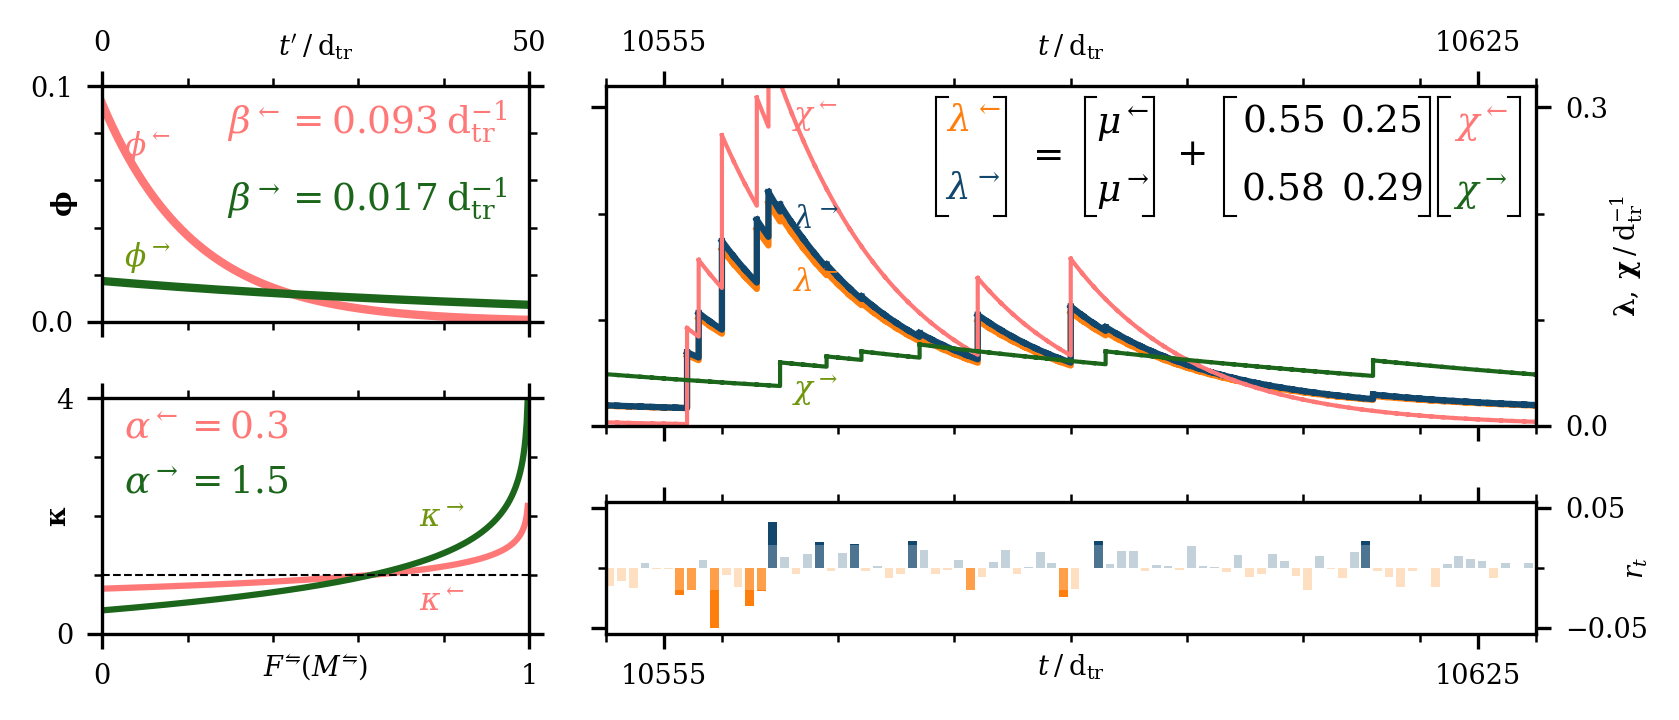

In [30]:
# %%time
tick='SPX'
mode='bi'
mark='mark'

fig_process = fig_process_setup(name=f"{tick}_process_{mode}-{mark}")

arrows = ["\\leftarrow", "\\rightarrow"]

B20.tk[tick].tt.tt[mode][mark].plot_lambda_ax(markers=False, plot_chi=True, market_time=True, ax=fig_process["ax"][0][1])
for i in range(2):
    fig_process["ax"][0][1].get_children()[i].set_color(cols_tail[0][i])
    fig_process["ax"][0][1].get_children()[2+i].set_color(cols_tail[1][i])
    fig_process["ax"][0][1].get_children()[i].set_linewidth(1.5)
    fig_process["ax"][0][1].get_children()[2+i].set_linewidth(1)


alphas = [0.25, 0.75, 1]
side_list = ["left", "right"]
sub = [np.logical_and(-((-1)**i)*B20.tk[tick].tt.tt[mode][mark]._df[0]>0, -((-1)**i)*B20.tk[tick].tt.tt[mode][mark]._df[0]<=np.abs(B20.tk[tick].tt.tt[mode][mark]._parameters.u.get_value())[i]) for i in range(2)]
barwidth=0.75


if True:
    for i in range(2):
        side = side_list[i]
        fig_process["ax"][1][1].bar(x=np.where(sub[i])[0], 
                                            height=B20.tk[tick].tt.tt[mode][mark]._df[0][sub[i].values], 
                                    width=barwidth, align="edge", color=plot_fns.colour_transform_alpha(cols_tail[0][i], alpha=0.25))
        fig_process["ax"][1][1].bar(x=B20.tk[tick].tt.tt[mode][mark]._events["t"][i, :B20.tk[tick].tt.tt[mode][mark]._events["N"][i]], 
                                            height=-((-1)**i)*np.abs(B20.tk[tick].tt.tt[mode][mark]._parameters.u.get_value())[i], 
                                    width=barwidth, align="edge", color=plot_fns.colour_transform_alpha(cols_tail[0][i], alpha=0.75))
        fig_process["ax"][1][1].bar(x=B20.tk[tick].tt.tt[mode][mark]._events["t"][i, :B20.tk[tick].tt.tt[mode][mark]._events["N"][i]], 
                                            height=-((-1)**i)*B20.tk[tick].tt.tt[mode][mark]._events["M"][i, :B20.tk[tick].tt.tt[mode][mark]._events["N"][i]], 
                                            bottom=-((-1)**i)*np.abs(B20.tk[tick].tt.tt[mode][mark]._parameters.u.get_value())[i],
                                    width=barwidth, align="edge", color=plot_fns.colour_transform_alpha(cols_tail[0][i], alpha=1))


shift=210
for a in range(2):
    fig_process["ax"][a][1].set_xlim([10550,10630])
    #fig_process["ax"][a][1].set_xlim([12500,12580])
    #fig_process["ax"][a][1].set_xlim(shift+np.array([7790,7870]))



x_t = np.linspace(0, 50, 401)
x_F = np.linspace(0, 0.9975, 400)

    
for k in range(2):  
    fig_process["ax"][0][0].plot(x_t, B20.tk[tick].tt.tt[mode][mark]._parameters.phi(lag=x_t, node=k), color=cols_tail[1][k], linewidth=2)
    fig_process["ax"][1][0].plot(x_F, kappa_F(x_F, alpha=B20.tk[tick].tt.tt[mode][mark]._parameters.alpha.get_value()[k]), color=cols_tail[1][k])

fig_process["ax"][1][0].axhline(1, color="black", linestyle="--", linewidth=0.5)

eqn_fields = ['x', 'y', 'xycoords', 'horizontalalignment', 'verticalalignment', 'fontsize', 'color']
eqn_entry = {
                '1': ['=', '+'],
                '2': ['lambda', 'mu', 'gamma', 'chi'],
            }

eqn_setup = {l:
                {entry: 
                        {field: None for field in eqn_fields} 
                for entry in eqn_entry[l]}
            for l in eqn_entry}

for l in eqn_setup:
    for entry in eqn_setup[l]:
        eqn_setup[l][entry]['xycoords'] = 'axes fraction'
        eqn_setup[l][entry]['fontsize'] = 9
        eqn_setup[l][entry]['horizontalalignment'] = 'right'
        eqn_setup[l][entry]['verticalalignment'] = 'top'
        if l=='2':
            eqn_setup[l][entry]['color'] = ['black' for i in range(2)]
            eqn_setup[l][entry]['y'] = [1-0.2*i-0.05 for i in range(2)]
        elif l=='1':
            eqn_setup[l][entry]['color'] = 'black'
            eqn_setup[l][entry]['y'] = 1-0.1-0.05
eqn_setup['2']['lambda']['color'] = [cols_tail[0][i] for i in range(2)]
eqn_setup['2']['chi']['color'] = [cols_tail[1][i] for i in range(2)]
if get_thesis():
    eqn_setup['1']['=']['x'] = 0.55-0.06
    eqn_setup['1']['+']['x'] = 0.695-0.05

    eqn_setup['2']['lambda']['x'] = [0.485-0.06]
    eqn_setup['2']['mu']['x'] = [0.635-0.05]
    eqn_setup['2']['gamma']['x'] = [0.795+0.105*j-0.0225 for j in range(2)]
    eqn_setup['2']['chi']['x'] = [1-0.03]

    br_y = np.array([0.6171875, 0.96875])
    br_x = np.array([
                        [0.355, 0.43], 
                        [0.515, 0.59], 
                        [0.665, 0.8865], 
                        [0.895, 0.9825],
                    ])
else:
    eqn_setup['1']['=']['x'] = 0.55-0.02
    eqn_setup['1']['+']['x'] = 0.695-0.02

    eqn_setup['2']['lambda']['x'] = [0.485-0.02]
    eqn_setup['2']['mu']['x'] = [0.635-0.02]
    eqn_setup['2']['gamma']['x'] = [0.8075+0.0925*j-0.0225 for j in range(2)]
    eqn_setup['2']['chi']['x'] = [1-0.03]

    br_y = np.array([0.6171875, 0.96875])
    br_x = np.array([
                        [0.4, 0.475], 
                        [0.55, 0.625], 
                        [0.69375, 0.89375], 
                        [0.90625, 0.98125],
                    ])



for i in range(2):
    fig_process["ax"][0][0].annotate(f"$\\beta^{{{arrows[i]}}} = {B20.tk[tick].tt.tt[mode][mark]._parameters.beta.get_value()[i]:.3f} \: {hwks_fns.get_model_unit()['beta']}$",
                                                        xy=(1-0.05, 1-(0.3+0.03)*i-0.05), xycoords='axes fraction',
                                                        horizontalalignment='right',
                                                        verticalalignment='top',
                                                        fontsize=9,
                                                        color=cols_tail[1][i])
    fig_process["ax"][1][0].annotate(f"$\\alpha^{{{arrows[i]}}} = {B20.tk[tick].tt.tt[mode][mark]._parameters.alpha.get_value()[i]:.1f}$",
                                                        xy=(0+0.05, 1-(0.2+0.03)*i-0.05), xycoords='axes fraction',
                                                        horizontalalignment='left',
                                                        verticalalignment='top',
                                                        fontsize=9,
                                                        color=cols_tail[1][i])

    for entry in eqn_setup['2']:
        if entry=='gamma':
            annot = [f"${B20.tk[tick].tt.tt[mode][mark]._parameters.gamma.get_value()[i,j]:.2f}$" for j in range(2)]
        else:
            annot = [f"$\\{entry}^{{{arrows[i]}}}$"]
        for j in range(len(annot)):
            fig_process["ax"][0][1].annotate(annot[j],
                                                xy=(eqn_setup['2'][entry]['x'][j], eqn_setup['2'][entry]['y'][i]), xycoords=eqn_setup['2'][entry]['xycoords'],
                                                horizontalalignment=eqn_setup['2'][entry]['horizontalalignment'],
                                                verticalalignment=eqn_setup['2'][entry]['verticalalignment'],
                                                fontsize=eqn_setup['2'][entry]['fontsize'],
                                                color=eqn_setup['2'][entry]['color'][i])

for entry in eqn_setup['1']:
    fig_process["ax"][0][1].annotate(f"${entry}$",
                                            xy=(eqn_setup['1'][entry]['x'], eqn_setup['1'][entry]['y']), xycoords=eqn_setup['1'][entry]['xycoords'],
                                                horizontalalignment=eqn_setup['1'][entry]['horizontalalignment'],
                                                verticalalignment=eqn_setup['1'][entry]['verticalalignment'],
                                                fontsize=eqn_setup['1'][entry]['fontsize'],
                                                color=eqn_setup['1'][entry]['color'])






    



fig_process["ax"][0][1].set_ylim([0,0.32])
pbr_y = br_y*np.diff(fig_process["ax"][0][1].get_ylim()) + fig_process["ax"][0][1].get_ylim()[0]
pbr_x = br_x*np.diff(fig_process["ax"][0][1].get_xlim()) + fig_process["ax"][0][1].get_xlim()[0]

if True:
    for i in range(br_x.shape[0]):
        for j in range(br_x.shape[1]):
            fig_process["ax"][0][1].plot(np.repeat(pbr_x[i,j],2), pbr_y, color="black", linewidth=0.5)
            for k in range(2):
                fig_process["ax"][0][1].plot(np.repeat(pbr_x[i,j],2)+((-1)**j)*np.array([0, 1]), np.repeat(pbr_y[k],2), color="black", linewidth=0.5)





#fig_process["ax"][0][0].set_ylabel("$\phi^{{\\leftrightharpoons}}{{(t')}}$", labelpad=-12)
fig_process["ax"][0][0].set_ylabel(f"${GR.pltsbv('phi')}$", labelpad=-12)
fig_process["ax"][0][0].set_xlabel(f"$t' \\: / \\: {hwks_fns.get_unit_d_tr()}$", labelpad=-6)
fig_process["ax"][0][0].set_ylim([0,0.1])
fig_process["ax"][0][0].set_xlim([0,50])
fig_process["ax"][0][0].set_yticks([0,0.1])
fig_process["ax"][0][0].set_xticks([0,50])

#fig_process["ax"][1][0].set_ylabel("$\kappa^{{\\leftrightharpoons}}{{(m^{{\\leftrightharpoons}})}}$", labelpad=-4)
fig_process["ax"][1][0].set_ylabel(f"${GR.pltsbv('kappa')}$", labelpad=-4)
fig_process["ax"][1][0].set_xlabel(f"$F^{{\\leftrightharpoons}}{{(M^{{\\leftrightharpoons}})}}$", labelpad=-9)
fig_process["ax"][1][0].set_ylim([0,4])
fig_process["ax"][1][0].set_xlim([0,1])
fig_process["ax"][1][0].set_yticks([0,4])
fig_process["ax"][1][0].set_xticks([0,1])








fig_process["ax"][0][1].set_xticks([10555, 10625])
#fig_process["ax"][0][1].set_xticks([12505, 12575])
#fig_process["ax"][0][1].set_xticks(shift+np.array([7795, 7865]))

fig_process["ax"][0][1].set_yticks([0, 0.3])
#fig_process["ax"][0][1].set_yticks([0, 0.25])
fig_process["ax"][1][1].set_xticks(fig_process["ax"][0][1].get_xticks())
fig_process["ax"][1][1].set_yticks(0.05*np.array([-1, 1]))


#fig_process["ax"][0][1].set_ylabel("$\\lambda^{{\\leftrightharpoons}} \: [\\chi^{{\\leftrightharpoons}}] \: / \: {{\mathrm{{d}}_{{\mathrm{{t}}}}}}^{{-1}}$", labelpad=0)
#fig_process["ax"][0][1].set_ylabel(f"$\\lambda^{{\\leftrightharpoons}}, \\: \\chi^{{\\leftrightharpoons}} \\: / \\: {{\mathrm{{d}}_{{\mathrm{{t}}}}}}^{{-1}}$", labelpad=0)
fig_process["ax"][0][1].set_ylabel(f"${GR.pltsbv('lambda')}, \\: {GR.pltsbv('chi')} \\: / \\: {hwks_fns.get_model_unit()['a_lambda']}$", labelpad=0)

fig_process["ax"][0][1].set_xlabel(f"$t \\: / \\: {hwks_fns.get_unit_d_tr()}$", labelpad=-6)
fig_process["ax"][1][1].set_ylabel("$r_{{t}}$", labelpad=-6)
fig_process["ax"][1][1].set_xlabel(f"$t \\: / \\: {hwks_fns.get_unit_d_tr()}$", labelpad=-9)


#fig_process["ax"][0][1].set_ylim([0,0.25])
fig_process["ax"][1][1].set_ylim(0.055*np.array([-1,1]))


fig_process["ax"][0][0].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.02))
fig_process["ax"][0][0].xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(10))
fig_process["ax"][1][0].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(1))
fig_process["ax"][1][0].xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.2))

fig_process["ax"][0][1].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.1))
fig_process["ax"][0][1].xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(10))
fig_process["ax"][1][1].yaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(0.05))
fig_process["ax"][1][1].xaxis.set_minor_locator(matplotlib.ticker.MultipleLocator(10))

fig_process["ax"][0][0].annotate(f"$\\phi^{{{arrows[0]}}}$",
                                                        xy=(2.5, 0.067), xycoords='data',
                                                        horizontalalignment='left',
                                                        verticalalignment='bottom',
                                                        fontsize=7.5,
                                                        color=cols[3])
fig_process["ax"][0][0].annotate(f"$\\phi^{{{arrows[1]}}}$",
                                                        xy=(2.5, 0.02), xycoords='data',
                                                        horizontalalignment='left',
                                                        verticalalignment='bottom',
                                                        fontsize=7.5,
                                                        color=cols_tail[0][2])
fig_process["ax"][1][0].annotate(f"$\\kappa^{{{arrows[0]}}}$",
                                                        xy=(0.85, 0.8), xycoords='data',
                                                        horizontalalignment='right',
                                                        verticalalignment='top',
                                                        fontsize=7.5,
                                                        color=cols[3])
fig_process["ax"][1][0].annotate(f"$\\kappa^{{{arrows[1]}}}$",
                                                        xy=(0.85, 1.7), xycoords='data',
                                                        horizontalalignment='right',
                                                        verticalalignment='bottom',
                                                        fontsize=7.5,
                                                        color=cols_tail[0][2])


fig_process["ax"][0][1].annotate(f"$\\chi^{{{arrows[0]}}}$",
                                                        xy=(10566, 0.275), xycoords='data',
                                                        horizontalalignment='left',
                                                        verticalalignment='bottom',
                                                        fontsize=7.5,
                                                        color=cols[3])
fig_process["ax"][0][1].annotate(f"$\\chi^{{{arrows[1]}}}$",
                                                        xy=(10566, 0.05), xycoords='data',
                                                        horizontalalignment='left',
                                                        verticalalignment='top',
                                                        fontsize=7.5,
                                                        color=cols_tail[0][2])
fig_process["ax"][0][1].annotate(f"$\\lambda^{{{arrows[0]}}}$",
                                                        xy=(10566, 0.15), xycoords='data',
                                                        horizontalalignment='left',
                                                        verticalalignment='top',
                                                        fontsize=7.5,
                                                        color=cols_tail[0][0])
fig_process["ax"][0][1].annotate(f"$\\lambda^{{{arrows[1]}}}$",
                                                        xy=(10566, 0.18), xycoords='data',
                                                        horizontalalignment='left',
                                                        verticalalignment='bottom',
                                                        fontsize=7.5,
                                                        color=cols_tail[0][1])



#fig_process["fig"].set_size_inches(7,2.5)
#fig_process["fig"].tight_layout()


fig_export(fig_process, height=2.5)

c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:512: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()


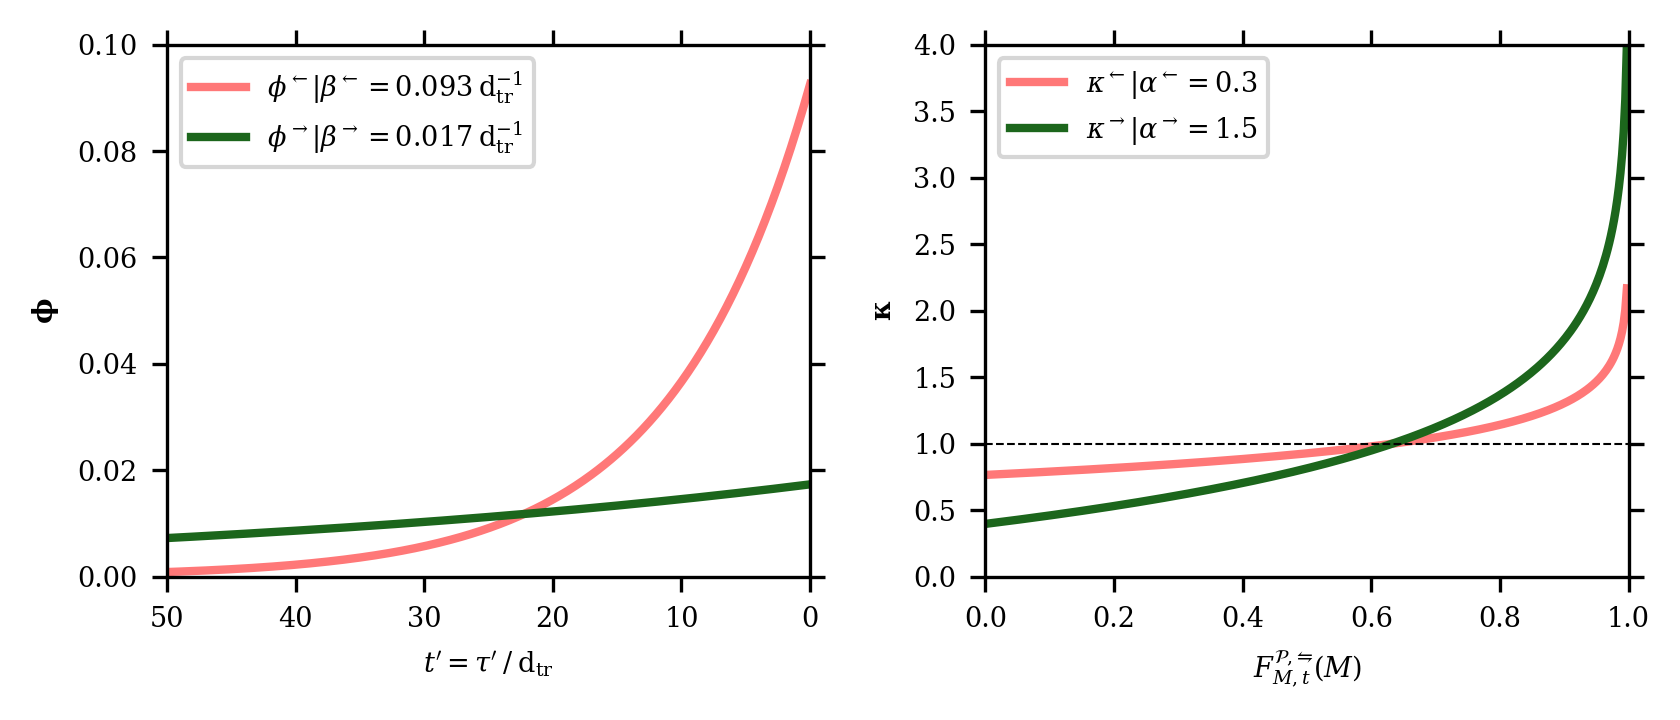

In [31]:
for tick in B20.tk:

    fig_chi_subfn = plot_fns.rc_plot_setup(name=f"{tick}_chi_subfn", ncols=2)

    arrows = [f"\\leftarrow", f"\\rightarrow"]

    for k in range(2):  
        fig_chi_subfn["ax"][0][0].plot(x_t, B20.tk[tick].tt.tt[mode][mark]._parameters.phi(lag=x_t, node=k), color=cols_tail[1][k], lw=2)
        fig_chi_subfn["ax"][0][1].plot(x_F, kappa_F(x_F, alpha=B20.tk[tick].tt.tt[mode][mark]._parameters.alpha.get_value()[k]), color=cols_tail[1][k], lw=2)

    fig_chi_subfn["ax"][0][1].axhline(1, color="black", linestyle="--", linewidth=0.5)

    fig_chi_subfn["ax"][0][0].legend([fig_chi_subfn["ax"][0][0].get_children()[k] for k in range(2)], 
                                    [f"$\\phi^{{{arrows[k]}}} | \\beta^{{{arrows[k]}}} = {B20.tk[tick].tt.tt[mode][mark]._parameters.beta.get_value()[k]:.3f} \: {hwks_fns.get_model_unit()['beta']}$" for k in range(2)],
                                    loc="upper left")
    fig_chi_subfn["ax"][0][1].legend([fig_chi_subfn["ax"][0][1].get_children()[k] for k in range(2)], 
                                    [f"$\\kappa^{{{arrows[k]}}} | \\alpha^{{{arrows[k]}}} = {B20.tk[tick].tt.tt[mode][mark]._parameters.alpha.get_value()[k]:.1f}$" for k in range(2)],
                                    loc="upper left")



    fig_chi_subfn["ax"][0][1].tick_params(labelleft=True, labelright=False)
    fig_chi_subfn["ax"][0][1].yaxis.set_label_position("left")

    fig_chi_subfn["ax"][0][0].set_ylabel(f"${GR.pltsbv('phi')}$", 
                                        #labelpad=-12
                                        )
    fig_chi_subfn["ax"][0][0].set_xlabel(f"$t' = \\tau' \\: / \\: {hwks_fns.get_unit_d_tr()}$", 
                                        #labelpad=-6
                                        )
    fig_chi_subfn["ax"][0][0].set_ylim([0,0.1])
    fig_chi_subfn["ax"][0][0].set_xlim(
                                        #[0,50]
                                        np.flip([0,50])
                                        )

    fig_chi_subfn["ax"][0][1].set_ylabel(f"${GR.pltsbv('kappa')}$", 
                                        #labelpad=-4
                                        )
    fig_chi_subfn["ax"][0][1].set_xlabel(f"$F_{{M,t}}^{{{dist_fns.get_scipy_dist_symb(dist='genpareto')},\\leftrightharpoons}}{{(M)}}$", 
                                        #labelpad=-9
                                        )
    fig_chi_subfn["ax"][0][1].set_ylim([0,4])
    fig_chi_subfn["ax"][0][1].set_xlim([0,1])


    fig_chi_subfn["fig"].set_size_inches(5.7, 2.5)
    fig_chi_subfn["fig"].tight_layout()


    fig_export(fig_chi_subfn, height=2.5)


c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:512: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()


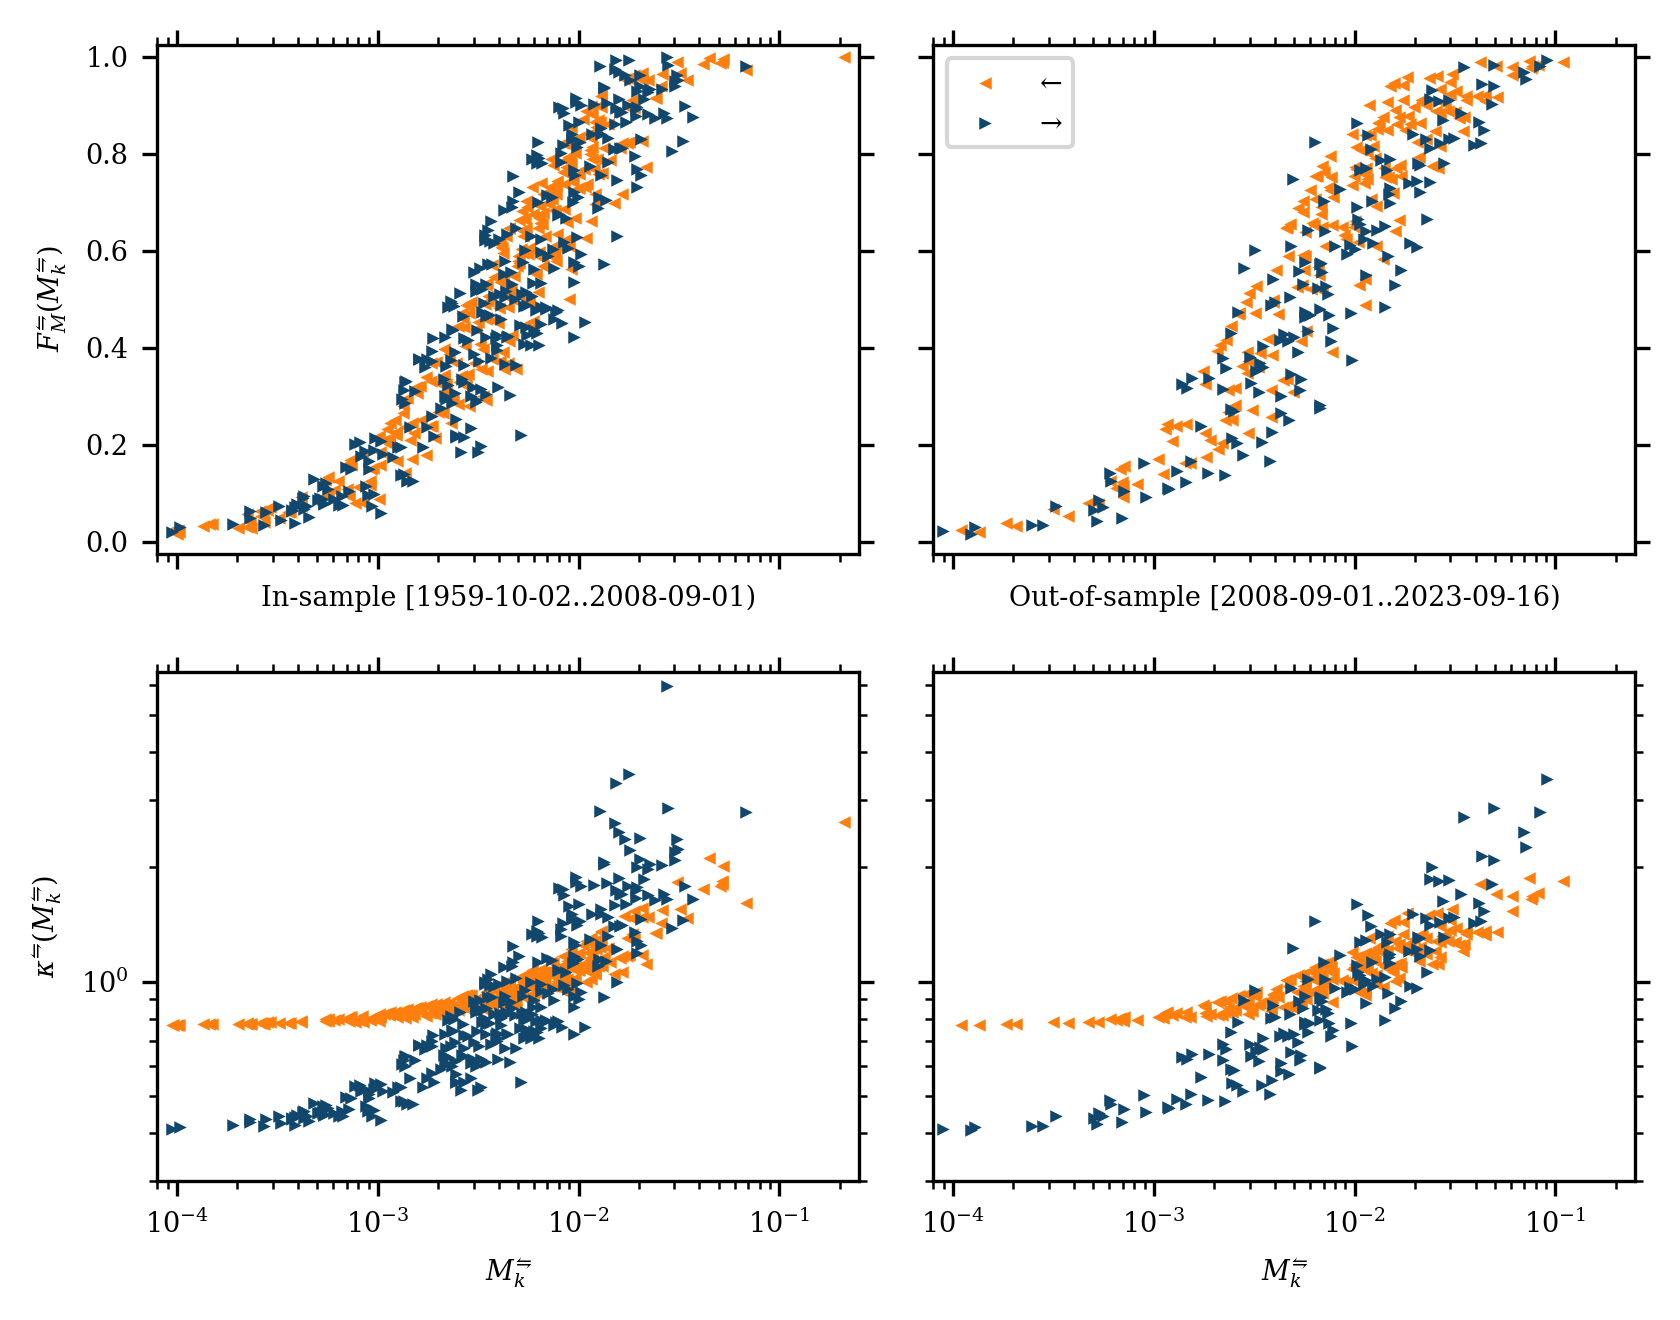

In [32]:
for tick in B20.tk:

    fig_chi_subfn = plot_fns.rc_plot_setup(name=f"{tick}_F_M_kappa_M_M", nrows=2, ncols=2)

    markers = ['<', '>']
    arrows = [f"\\leftarrow", f"\\rightarrow"]

    N_train = B20.tk[tick].tt.tt[mode][mark]._events["N_t"][:,B20.tk[tick].tt.tt[mode][mark]._train_t[-1]]

    bounds = np.array([[
                [0, N_train[k]],
                [N_train[k], B20.tk[tick].tt.tt[mode][mark]._events["N"][k]]
            ] for k in range(2)])


    ms=9

    for j in range(2):
        for k in range(2):  
            
            
            fig_chi_subfn["ax"][0][j].scatter(B20.tk[tick].tt.tt[mode][mark]._events["M"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            B20.tk[tick].tt.tt[mode][mark]._events["F_M"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            color=cols_tail[0][k], marker=markers[k], s=ms, lw=0)
            
            fig_chi_subfn["ax"][1][j].scatter(B20.tk[tick].tt.tt[mode][mark]._events["M"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            B20.tk[tick].tt.tt[mode][mark]._events["kappa"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            color=cols_tail[0][k], marker=markers[k], s=ms, lw=0)
            




    for i in [0]:
        for j in range(2):
            fig_chi_subfn["ax"][i][j].set_ylim(plot_fns.buffer(x=np.array([0,1]), b=1.05))
    for i in [1]:
        ylim_abs = np.max([np.abs(fig_chi_subfn["ax"][i][j].get_ylim()) for j in range(2)])
        for j in range(2):
            fig_chi_subfn["ax"][i][j].set_ylim(np.array([0,ylim_abs]))

    for i in range(2):
        fig_chi_subfn["ax"][i][-1].tick_params(labelright=False)
    for j in range(2):
        fig_chi_subfn["ax"][-1][j].set_xlabel(f"$M_{{k}}^{{\\leftrightharpoons}}$")
        fig_chi_subfn["ax"][0][j].tick_params(labeltop=False)

    for i in range(2):
        for j in range(2):
            fig_chi_subfn["ax"][i][j].set_xscale("log")
            fig_chi_subfn["ax"][i][j].set_xlim(np.array([8E-5,2.5E-1]))

    for j in range(2):

        fig_chi_subfn["ax"][1][j].set_ylim(np.array([3E-1,6.5]))
        fig_chi_subfn["ax"][1][j].set_yscale("log")




    fig_chi_subfn["ax"][0][0].set_ylabel(f"$F_{{M}}^{{\\leftrightharpoons}}{{\\left(M_{{k}}^{{\\leftrightharpoons}}\\right)}}$")
    fig_chi_subfn["ax"][1][0].set_ylabel(f"$\\kappa^{{\\leftrightharpoons}}{{\\left(M_{{k}}^{{\\leftrightharpoons}}\\right)}}$")


    fig_chi_subfn["ax"][0][0].set_xlabel(f"In-sample [{B20.tk[tick].pd._dates['train'][0].strftime('%Y-%m-%d')}..{B20.tk[tick].pd._dates['train'][1].strftime('%Y-%m-%d')})")
    fig_chi_subfn["ax"][0][1].set_xlabel(f"Out-of-sample [{B20.tk[tick].pd._dates['train'][1].strftime('%Y-%m-%d')}..{B20.tk[tick].pd._dates['all'][1].strftime('%Y-%m-%d')})")


    fig_chi_subfn["ax"][0][1].legend([fig_chi_subfn["ax"][0][1].get_children()[k] for k in range(2)],
                                    #[f"$k^{{{arrows[k]}}}$" for k in range(2)], 
                                    [f"${arrows[k]}$" for k in range(2)], 
                                    loc="upper left")

    fig_chi_subfn["fig"].set_size_inches(5.7, 4.5)
    fig_chi_subfn["fig"].tight_layout()


    fig_export(fig_chi_subfn, height=4.5, formats=['pdf', 'png'], dpi=get_dpi())


c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:512: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()


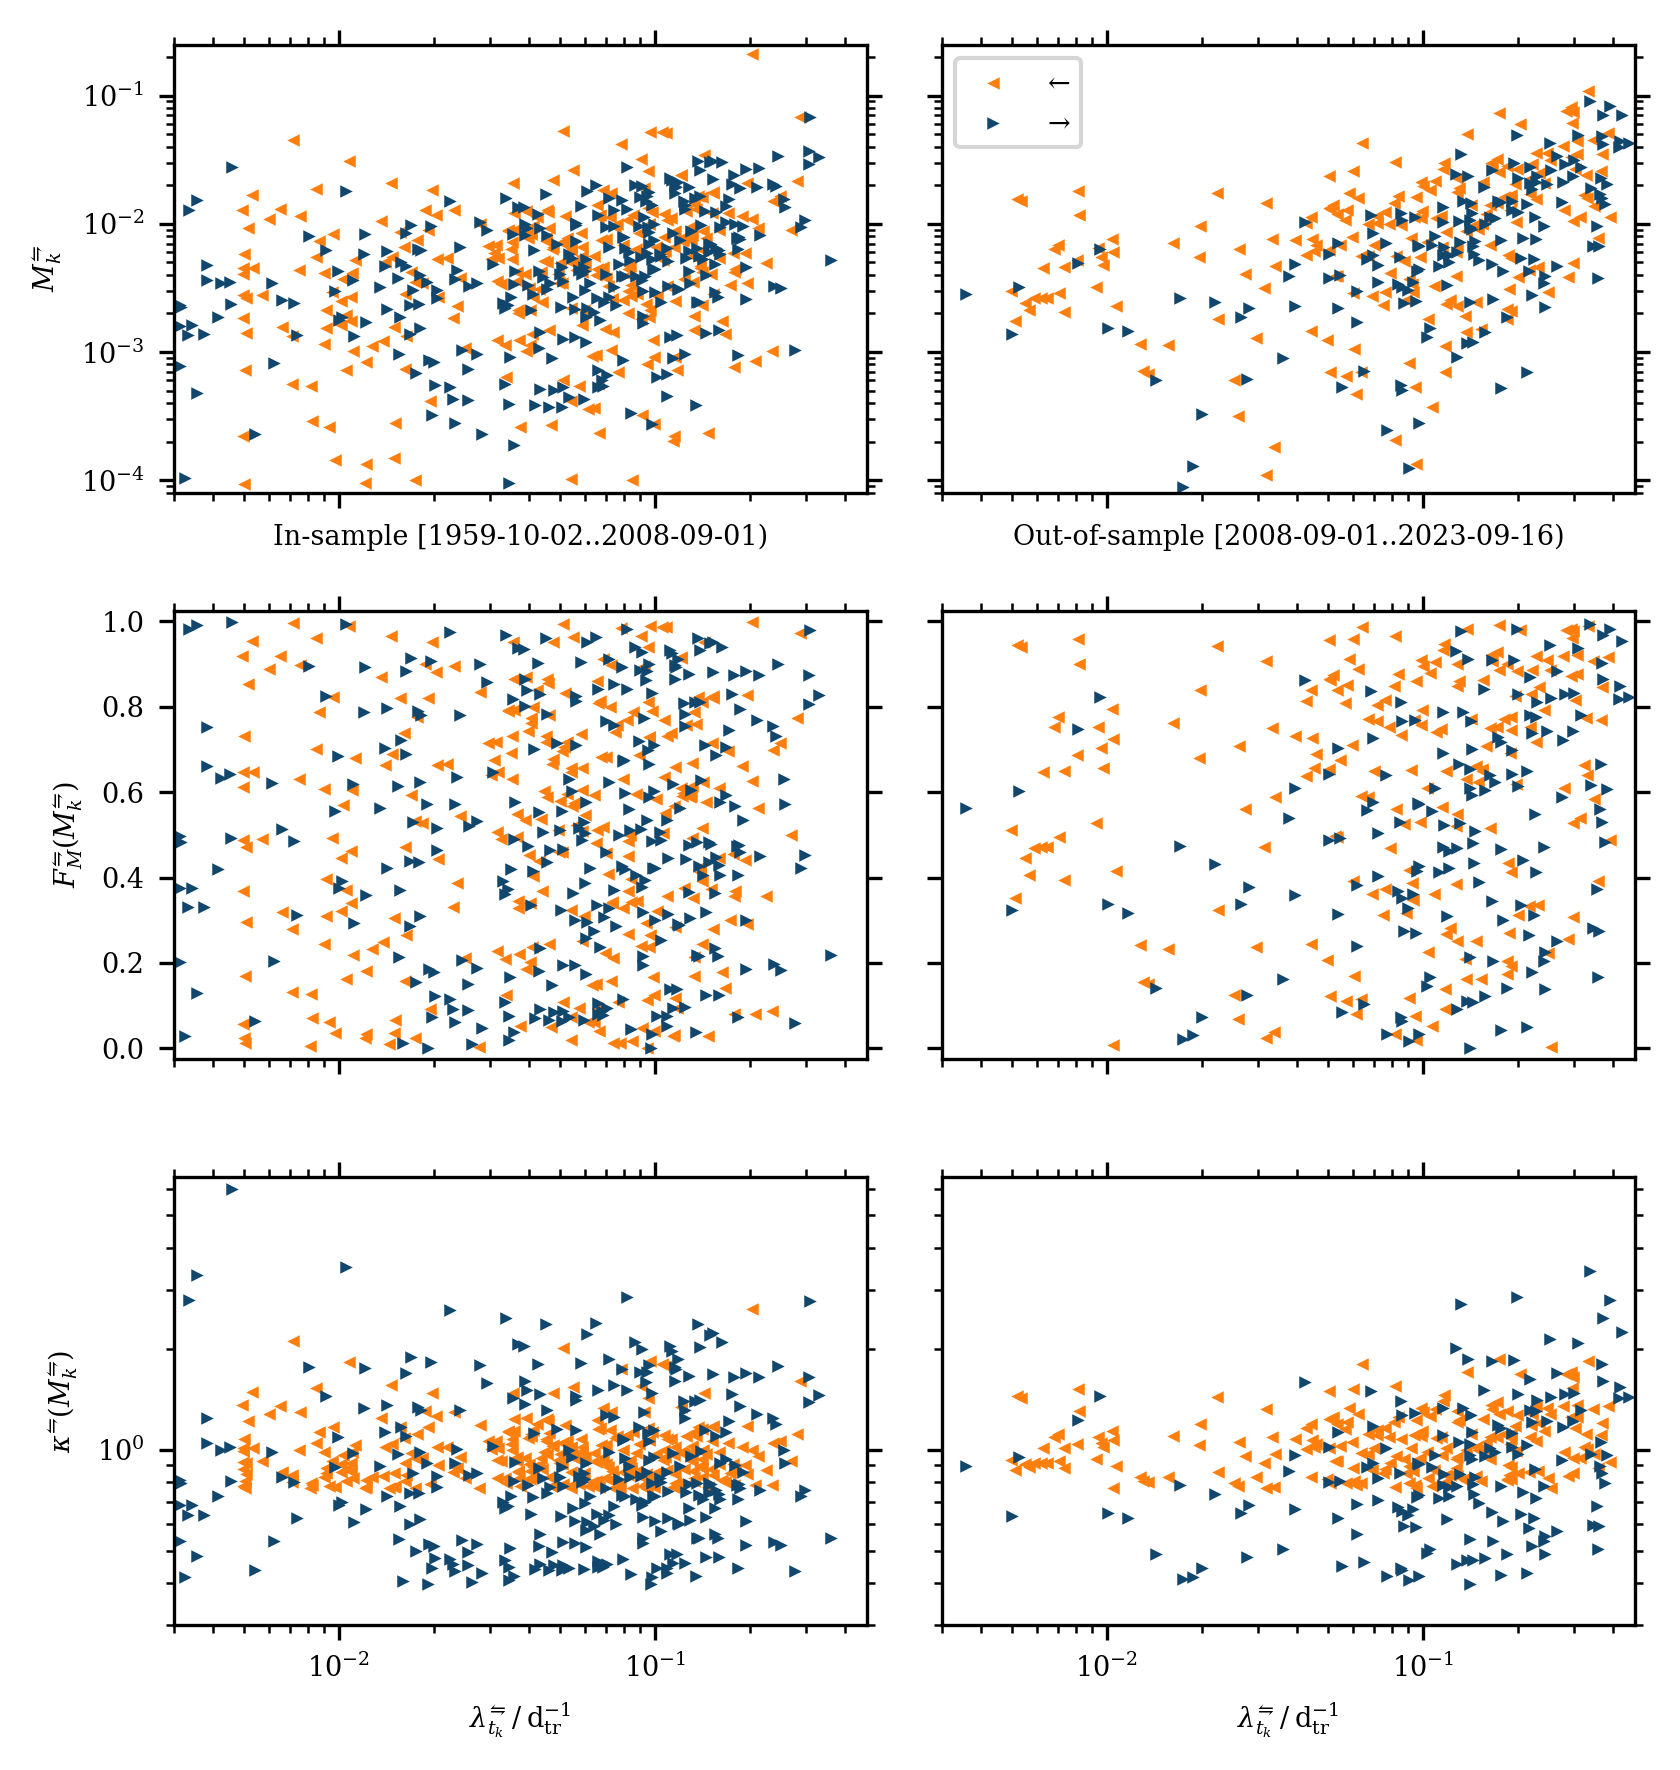

In [33]:
for tick in B20.tk:

    fig_chi_subfn = plot_fns.rc_plot_setup(name=f"{tick}_F_M_kappa_M_lambda", nrows=3, ncols=2)

    markers = ['<', '>']
    arrows = [f"\\leftarrow", f"\\rightarrow"]

    N_train = B20.tk[tick].tt.tt[mode][mark]._events["N_t"][:,B20.tk[tick].tt.tt[mode][mark]._train_t[-1]]

    bounds = np.array([[
                [0, N_train[k]],
                [N_train[k], B20.tk[tick].tt.tt[mode][mark]._events["N"][k]]
            ] for k in range(2)])


    ms=9

    for j in range(2):
        for k in range(2):  
            
            
            fig_chi_subfn["ax"][1][j].scatter(B20.tk[tick].tt.tt[mode][mark]._events["lambda"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            B20.tk[tick].tt.tt[mode][mark]._events["F_M"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            color=cols_tail[0][k], marker=markers[k], s=ms, lw=0)
            
            fig_chi_subfn["ax"][2][j].scatter(B20.tk[tick].tt.tt[mode][mark]._events["lambda"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            B20.tk[tick].tt.tt[mode][mark]._events["kappa"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            color=cols_tail[0][k], marker=markers[k], s=ms, lw=0)
            
            fig_chi_subfn["ax"][0][j].scatter(B20.tk[tick].tt.tt[mode][mark]._events["lambda"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            B20.tk[tick].tt.tt[mode][mark]._events["M"][k,bounds[k,j,0]:bounds[k,j,1]], 
                                            color=cols_tail[0][k], marker=markers[k], s=ms, lw=0)

    xlim_abs = np.max([np.abs(fig_chi_subfn["ax"][0][j].get_xlim()) for j in range(2)])
    for i in range(3):
        for j in range(2):
            fig_chi_subfn["ax"][i][j].set_xlim(np.array([3E-3,xlim_abs]))

    for i in [1]:
        for j in range(2):
            fig_chi_subfn["ax"][i][j].set_ylim(plot_fns.buffer(x=np.array([0,1]), b=1.05))
    for i in [0,2]:
        ylim_abs = np.max([np.abs(fig_chi_subfn["ax"][i][j].get_ylim()) for j in range(2)])
        for j in range(2):
            fig_chi_subfn["ax"][i][j].set_ylim(np.array([0,ylim_abs]))

    for i in range(3):
        fig_chi_subfn["ax"][i][-1].tick_params(labelright=False)
    for j in range(2):
        fig_chi_subfn["ax"][-1][j].set_xlabel(f"$\\lambda_{{t_{{k}}}}^{{\\leftrightharpoons}} \: / \: {hwks_fns.get_model_unit()['a_lambda']}$")
        fig_chi_subfn["ax"][0][j].tick_params(labeltop=False)

    for i in range(3):
        for j in range(2):
            fig_chi_subfn["ax"][i][j].set_xscale("log")

    for j in range(2):
        

        fig_chi_subfn["ax"][2][j].set_ylim(np.array([3E-1,6.5]))
        fig_chi_subfn["ax"][2][j].set_yscale("log")

        fig_chi_subfn["ax"][0][j].set_ylim(np.array([8E-5,2.5E-1]))
        fig_chi_subfn["ax"][0][j].set_yscale("log")


    fig_chi_subfn["ax"][1][0].set_ylabel(f"$F_{{M}}^{{\\leftrightharpoons}}{{\\left(M_{{k}}^{{\\leftrightharpoons}}\\right)}}$")
    fig_chi_subfn["ax"][2][0].set_ylabel(f"$\\kappa^{{\\leftrightharpoons}}{{\\left(M_{{k}}^{{\\leftrightharpoons}}\\right)}}$")
    fig_chi_subfn["ax"][0][0].set_ylabel(f"$M_{{k}}^{{\\leftrightharpoons}}$")


    fig_chi_subfn["ax"][0][0].set_xlabel(f"In-sample [{B20.tk[tick].pd._dates['train'][0].strftime('%Y-%m-%d')}..{B20.tk[tick].pd._dates['train'][1].strftime('%Y-%m-%d')})")
    fig_chi_subfn["ax"][0][1].set_xlabel(f"Out-of-sample [{B20.tk[tick].pd._dates['train'][1].strftime('%Y-%m-%d')}..{B20.tk[tick].pd._dates['all'][1].strftime('%Y-%m-%d')})")


    fig_chi_subfn["ax"][0][1].legend([fig_chi_subfn["ax"][0][1].get_children()[k] for k in range(2)],
                                    #[f"$k^{{{arrows[k]}}}$" for k in range(2)], 
                                    [f"${arrows[k]}$" for k in range(2)], 
                                    loc="upper left")

    fig_chi_subfn["fig"].set_size_inches(5.7, 6)
    fig_chi_subfn["fig"].tight_layout()


    fig_export(fig_chi_subfn, height=6, formats=['pdf', 'png'], dpi=get_dpi())


In [34]:
plt.rcParams['figure.dpi'] = 300

c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:512: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()


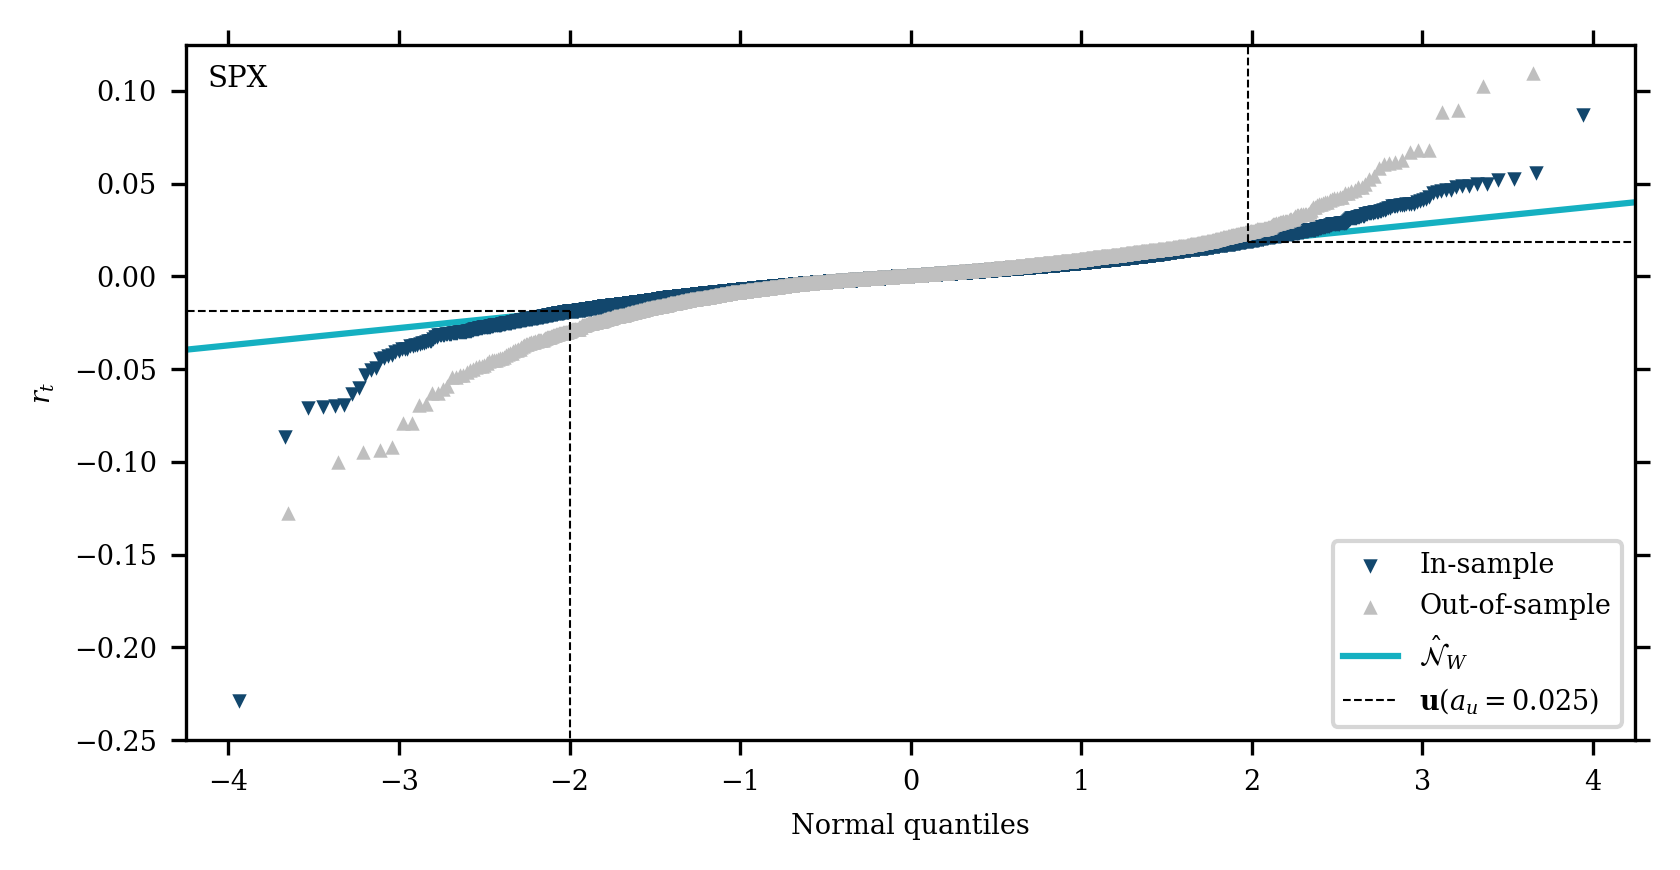

In [35]:
ms = 12
markers = ['v', '^']

xlim_abs = 4.25
xlim = xlim_abs*np.array([-1,1])

for tick in B20.tk:

    fig_norm_qq = plot_fns.rc_plot_setup(name=f'{tick}_r_qq')


    data = copy.deepcopy(B20.tk[tick].pd.lr['p']['train'])
    data_2 = copy.deepcopy(B20.tk[tick].pd.lr['p']['forecast'][0][0])

    normal_mean = scipy.stats.norm(*scipy.stats.norm.fit(data))

    fig_norm_qq_quantiles = (0.5+np.array(range(data.values.size)))/data.values.size
    fig_norm_qq_x = scipy.stats.norm().ppf(fig_norm_qq_quantiles)
    fig_norm_qq_x_ls = np.linspace(fig_norm_qq_x[0], fig_norm_qq_x[-1], 201)

    fig_norm_qq_quantiles_2 = (0.5+np.array(range(data_2.values.size)))/data_2.values.size
    fig_norm_qq_x_2 = scipy.stats.norm().ppf(fig_norm_qq_quantiles_2)

    fig_norm_qq["ax"][0][0].scatter(fig_norm_qq_x, np.sort(data.values), color=cols[0], lw=0, s=ms, marker=markers[0])
    fig_norm_qq["ax"][0][0].scatter(fig_norm_qq_x_2, np.sort(data_2.values), color=cols[7], lw=0, s=ms, marker=markers[1])


    #fig_norm_qq["ax"][0][0].plot(fig_norm_qq_x[[0,-1]], normal_mean.ppf(scipy.stats.norm().cdf(fig_norm_qq_x[[0,-1]])), color=cols[9], linewidth=1.5)
    #fig_norm_qq["ax"][0][0].plot(fig_norm_qq_x[[0,-1]], normal_median.ppf(scipy.stats.norm().cdf(fig_norm_qq_x[[0,-1]])), color="orange", linewidth=1.5) 

    fig_norm_qq["ax"][0][0].plot(xlim, normal_mean.ppf(scipy.stats.norm().cdf(xlim)), color=cols[9], linewidth=1.5, zorder=0)


    #fig_norm_qq["ax"][0][0].set_ylabel(f"{tick} $r_t$")
    fig_norm_qq["ax"][0][0].set_ylabel(f"$r_t$")
    fig_norm_qq["ax"][0][0].set_xlabel(f"Normal quantiles")


    fig_norm_qq["ax"][0][0].set_xlim(4.25*np.array([-1,1]))
    fig_norm_qq["ax"][0][0].set_ylim([-0.25, 0.125])
    #fig_norm_qq["ax"][0][0].set_ylim(0.25*np.array([-1,1]))

    a_u = B20.tk[tick].tt.tt["bi"]["mark"]._parameters.a_u.get_value()
    u_q = np.array(range(2)) + np.array([1,-1])*a_u
    if True:
        u_y = B20.tk[tick].tt.tt["bi"]["mark"]._parameters.u.get_value()
        u_x = (B20.tk[tick].tt.tt["bi"]["mark"]._parameters.u.get_value() - normal_mean.mean())/normal_mean.std()
    else:
        u_y = normal_mean.ppf(u_q)
        u_x = scipy.stats.norm().ppf(u_q)
    for p in range(2):
        fig_norm_qq["ax"][0][0].plot(np.repeat(u_x[p], 2), np.array([u_y[p], ((-1)**(1+p))*5]), linewidth=0.5, linestyle="--", color="black")
        fig_norm_qq["ax"][0][0].plot(np.array([u_x[p], ((-1)**(1+p))*5]), np.repeat(u_y[p], 2), linewidth=0.5, linestyle="--", color="black")

    xy_box = hwks_fns.annotate_model_Hawkes(ax=fig_norm_qq["ax"][0][0], 
                                                #tick=tick, series="r_{{t}}", plot_tick=True, 
                                                str_tick=tick, plot_tick=True, 
                                                an_h='left', an_v='top', 
                                                an_x0=0.015, an_y0=0.03, flip_x0ry0t=True, an_mode=get_an_mode())

    fig_norm_qq["ax"][0][0].legend([fig_norm_qq["ax"][0][0].get_children()[p] for p in range(4)], ["In-sample", "Out-of-sample",
                                                                                                    f"$\\hat{{{dist_fns.get_scipy_dist_symb(dist='norm')}}}_{{W}}$", 
                                                                                                   #f"$u^{{\\leftrightharpoons}}{{\\left(a_u = {a_u[0]:.3f}\\right)}}$",
                                                                                                   f"${GR.pltsbv('u')}{{\\left(a_u = {a_u[0]:.3f}\\right)}}$"
                                                                                                   ], loc="lower right")
    
    fig_norm_qq["ax"][0][0].set_xlim(xlim)


    fig_norm_qq["fig"].set_size_inches(3.4, 3)
    fig_norm_qq["fig"].tight_layout()

    fig_export(fig_norm_qq, height=3, formats=["pdf", "png"], dpi=get_dpi())


c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:512: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()
c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\misc_functions.py:2566: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  full = np.array([KS_stat, KS_p, KS_loc, KS_sign, KS_sup, KS_argmax])
c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\misc_functions.py:2566: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarra

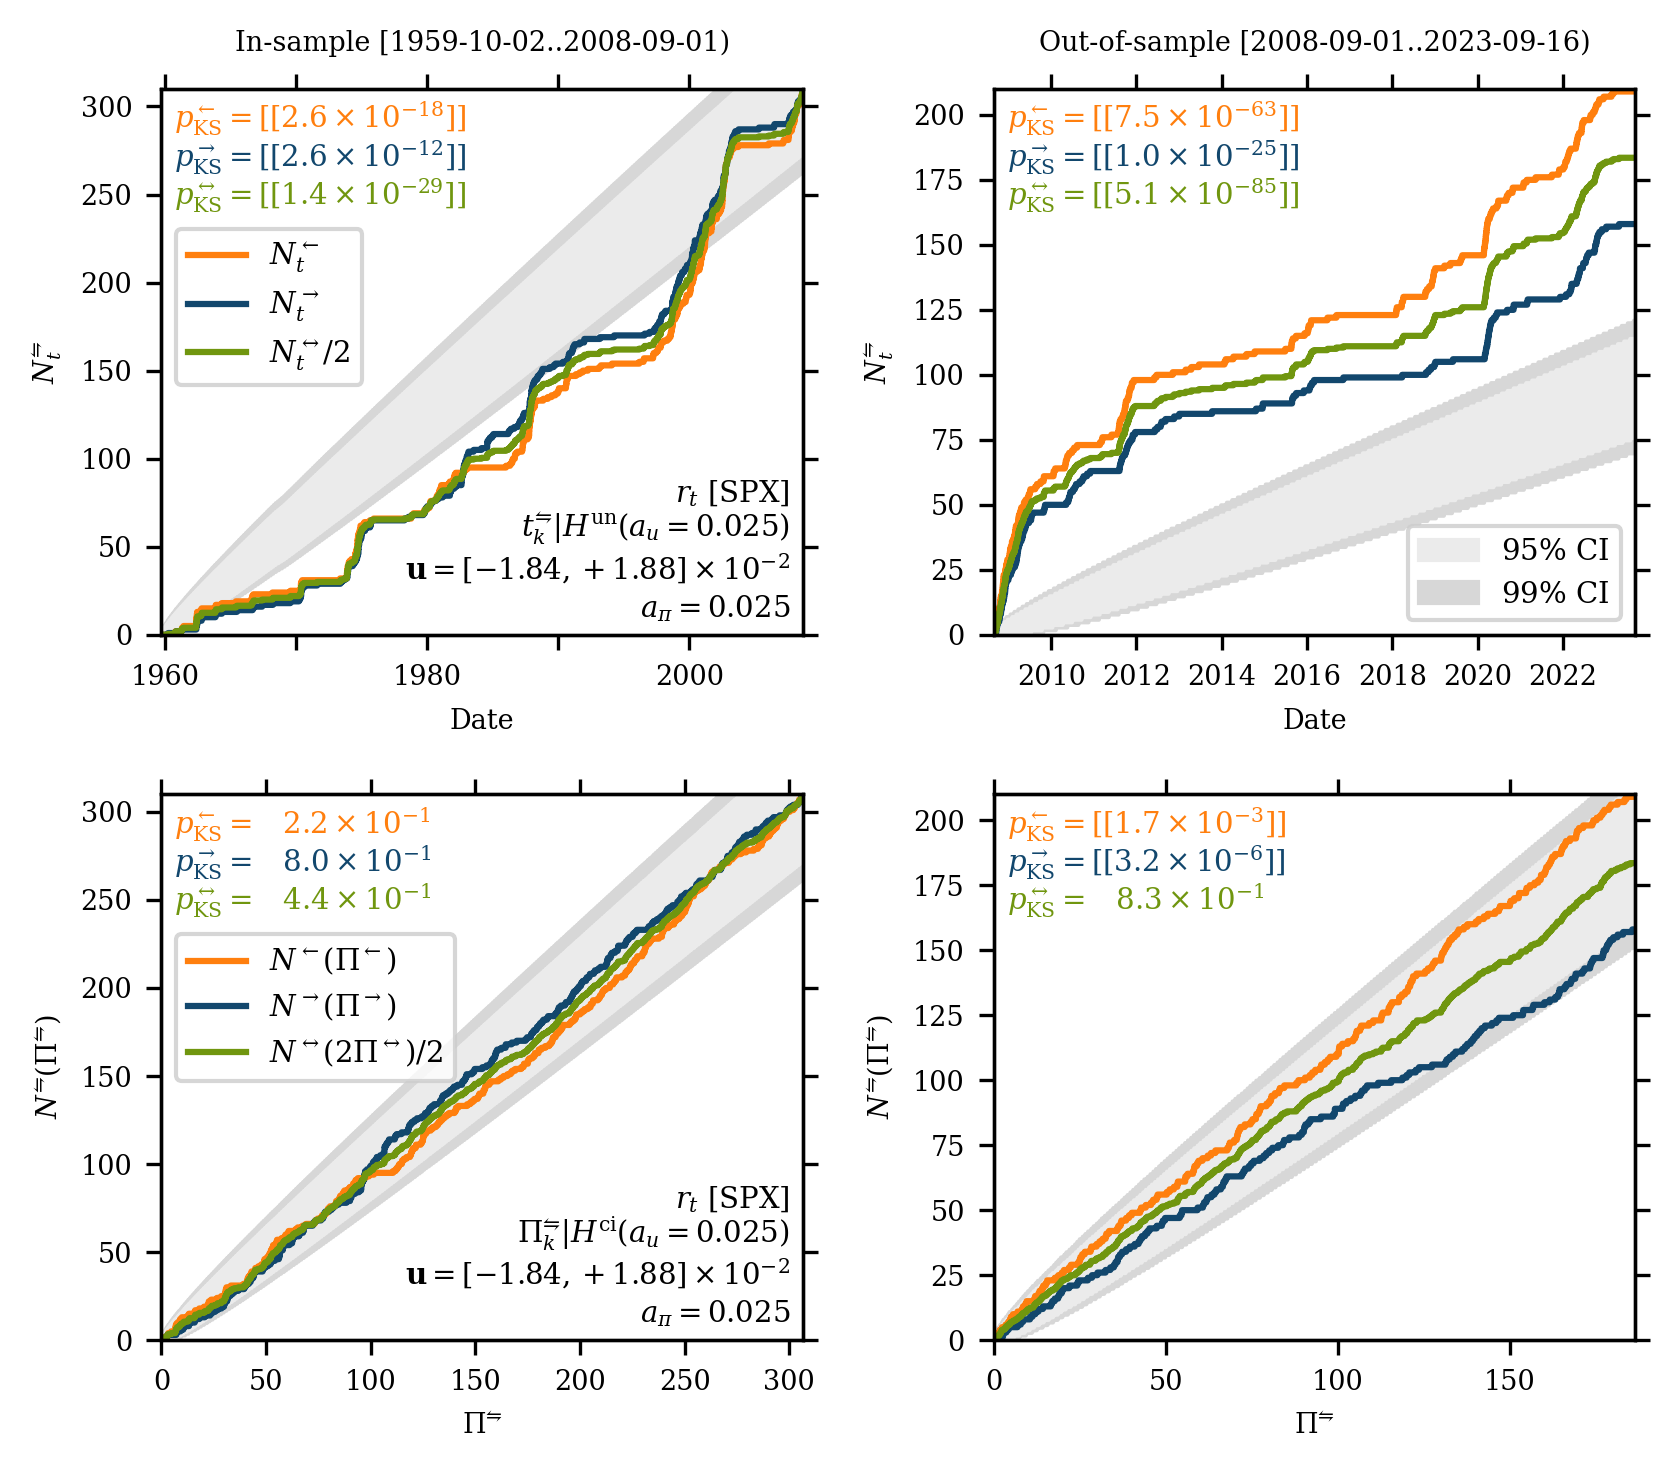

In [36]:
mode='ci'
mark='mark'

tf_mode = 'a_u'
tf_u_key = 1

periods = ['train', 'forecast']
vals = ['N_t', 'N_tilde_t']
I_s = [None]
Nlim_rf_upper_s = [10,5]
Nlim_rb_upper = 0.01
t_bracket = [False, True]

height = {1: 2.5, 2: 5, 3: 7}

KS_arrows = [f"\\leftarrow", f"\\rightarrow", f"\\leftrightarrow"]
ineqs = [f"<", f">"]

decades = 10*np.arange(193, 203)
decades_label = [f"{d}" for d in decades]

I_max = len(vals)
J_max = len(periods)
p_KS = {tick: [[None for j in range(J_max)] for i in range(I_max)] for tick in B20.tk}

for tick in B20.tk:

   ax2_head = [f"In-sample [{B20.tk[tick].pd.get_dates_str()[:10]}..{B20.tk[tick].pd.get_dates_str()[11:21]})", f"Out-of-sample [{B20.tk[tick].pd.get_dates_str()[11:21]}..{B20.tk[tick].pd.get_dates_str()[22:32]})"]


   decades_label = [f"{d}" for d in decades]
   if np.isin(tick, ['SPX', 'DJI']):
        for k in range(decades.size//2):
            decades_label[2*k] = f""

   overwrite_t_ps = {}
   tf_args = {'tf_mode': tf_mode}
   if tf_u_key is not None:
        tf_args['tf_u_key'] = tf_u_key
        tf_args['a_u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_u'][:,tf_u_key]
        tf_args['a_lambda'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_lambda'][:,tf_u_key]
        tf_args['u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['u'][:,tf_u_key]

   if tf_mode=='u':
      u_name = tf_args['u']
   else:
      u_name = tf_args['a_u']

   name = f"{tick}_KS_{misc_fns.str_concatenate(vals, fill_str='-', fill_str_void=-1)}_stat_base_{misc_fns.str_concatenate(periods, fill_str='-', fill_str_void=-1)}_{tf_mode}={str(np.abs(u_name[0])).replace('.','')}"

   fig_KS = plot_fns.rc_plot_setup(name=name, nrows=I_max, ncols=J_max)

   fig_KS['ax2'] = [[fig_KS['ax'][i][j].twiny() for j in range(len(fig_KS['ax'][i]))] for i in range(len(fig_KS['ax']))]

   for i in range(I_max):
         for j in range(J_max):

            fig_KS['ax2'][i][j].tick_params(left=False, right=False, top=False, bottom=False,
                                             labelleft=False, labelright=False, labeltop=False, labelbottom=False)


   for i in range(I_max):
         for j in range(J_max):
            p_KS[tick][i][j] = lr_fns.KS_plot(self=B20, ax=fig_KS['ax'][i][j], ax2=fig_KS['ax2'][i][j], tick=tick, period=periods[j], val_key=vals[i], t_bracket=t_bracket[i], thesis=get_thesis(),
                                             **tf_args,
                                             I_s=I_s[0],
                                             plot_main_legend=j==0, 
                                             #plot_ci_legend=(i==0)*(j==0), plot_tick=(i==0)*(j==0), plot_u=(i==0)*(j==0), plot_a_lambda=(i==0)*(j==0),
                                             plot_ci_legend=(i==0)*(j==1), plot_tick=(j==0), plot_u=(j==0), plot_a_lambda=(j==0), plot_mod=j==0,
                                             a_u_scif_pow10=0, a_lambda_scif_pow10=0,
                                             mode=mode,
                                             lw=1.5,
                                             plot_I_list=['I', 'I_cat'],
                                             overwrite_t_ps=overwrite_t_ps,
                                             Nlim_rf_upper=Nlim_rf_upper_s[i], Nlim_rb_upper=Nlim_rb_upper, 
                                             an_y0=0.02, 
                                             hwk_uncond=True,
                                             #an_y0_p=0.85, 
                                             #an_y0_t=0.02, 
                                             #u_scif_pow10=0,
                                             #ci_legend_loc='lower right', ci_legend_ncols=1,
                                             #main_legend_ncols=2,
                                             #ci_legend_ncols=1, ci_legend_loc='center right', 
                                             #main_legend_ncols=1, main_legend_loc='center left'
                                             )
            if True:
               if i==0 and j==0:
                  xylim = {f"{a}lim": fig_KS['ax'][i][j].__getattribute__(f'get_{a}lim')() for a in ['x', 'y']} 

                  fig_KS["ax"][i][j].set_xticks([pd.Timestamp(f"{d}") for d in decades])
                  fig_KS["ax"][i][j].set_xticklabels(decades_label)

                  for alim in xylim:
                     fig_KS['ax'][i][j].__getattribute__(f'set_{alim}')(xylim[alim])

            if False:
               fig_KS["ax"][i][j].set_ylabel(f"$N_{{t}}^{{{KS_arrows[j]}}} | r_{{t}} {ineqs[j]} u^{{{KS_arrows[j]}}}$ [{tick}]")

   if True:         
      for j in range(len(periods)):
         fig_KS['ax2'][0][j].set_xlabel(ax2_head[j], 
                                    labelpad=9
                                    )


   fig_export(fig_KS, height=height[I_max])


c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:512: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()


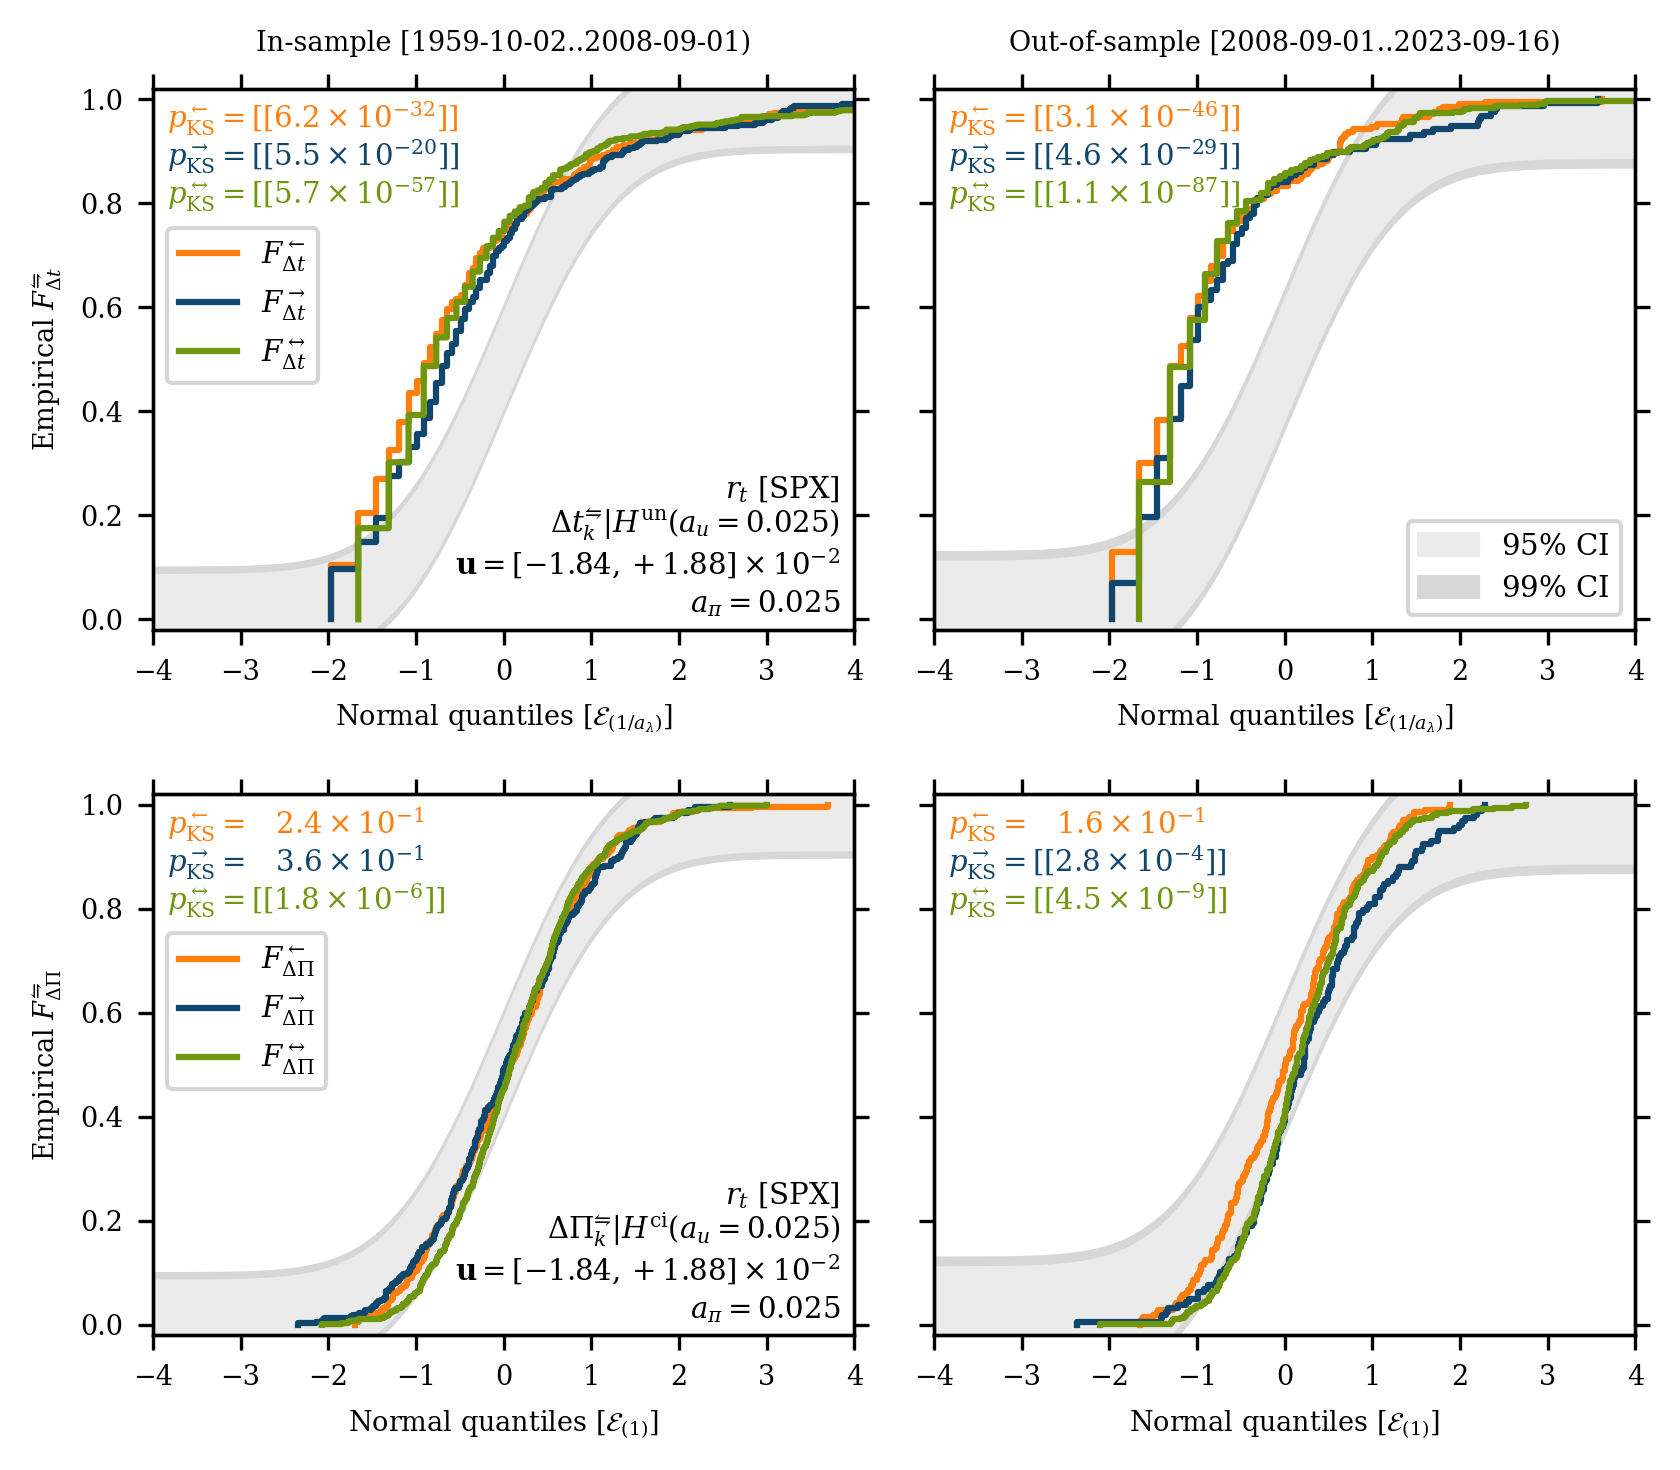

In [37]:
mode='ci'
mark='mark'

tf_mode = 'a_u'
tf_u_key = 1

periods = ['train', 'forecast']
vals = ['delta_t', 'delta_tilde_t']
I_s = [None]
Nlim_rf_upper_s = [10,5]
Nlim_rb_upper = 0.01
t_bracket = [False, True]

height = {1: 2.5, 2: 5, 3: 7}

KS_arrows = [f"\\leftarrow", f"\\rightarrow", f"\\leftrightarrow"]
ineqs = [f"<", f">"]

decades = 10*np.arange(193, 203)
decades_label = [f"{d}" for d in decades]

I_max = len(vals)
J_max = len(periods)
p_KS = {tick: [[None for j in range(J_max)] for i in range(I_max)] for tick in B20.tk}

for tick in B20.tk:

   ax2_head = [f"In-sample [{B20.tk[tick].pd.get_dates_str()[:10]}..{B20.tk[tick].pd.get_dates_str()[11:21]})", f"Out-of-sample [{B20.tk[tick].pd.get_dates_str()[11:21]}..{B20.tk[tick].pd.get_dates_str()[22:32]})"]


   decades_label = [f"{d}" for d in decades]
   if np.isin(tick, ['SPX', 'DJI']):
        for k in range(decades.size//2):
            decades_label[2*k] = f""

   overwrite_t_ps = {}
   tf_args = {'tf_mode': tf_mode}
   if tf_u_key is not None:
        tf_args['tf_u_key'] = tf_u_key
        tf_args['a_u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_u'][:,tf_u_key]
        tf_args['a_lambda'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_lambda'][:,tf_u_key]
        tf_args['u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['u'][:,tf_u_key]

   if tf_mode=='u':
      u_name = tf_args['u']
   else:
      u_name = tf_args['a_u']

   name = f"{tick}_KS_{misc_fns.str_concatenate(vals, fill_str='-', fill_str_void=-1)}_stat_base_{misc_fns.str_concatenate(periods, fill_str='-', fill_str_void=-1)}_{tf_mode}={str(np.abs(u_name[0])).replace('.','')}"

   fig_KS = plot_fns.rc_plot_setup(name=name, nrows=I_max, ncols=J_max)

   fig_KS['ax2'] = [[fig_KS['ax'][i][j].twiny() for j in range(len(fig_KS['ax'][i]))] for i in range(len(fig_KS['ax']))]

   for i in range(I_max):
         for j in range(J_max):

            fig_KS['ax2'][i][j].tick_params(left=False, right=False, top=False, bottom=False,
                                             labelleft=False, labelright=False, labeltop=False, labelbottom=False)


   for i in range(I_max):
         for j in range(J_max):
            p_KS[tick][i][j] = lr_fns.KS_plot(self=B20, ax=fig_KS['ax'][i][j], ax2=fig_KS['ax2'][i][j], tick=tick, period=periods[j], val_key=vals[i], t_bracket=t_bracket[i], thesis=get_thesis(),
                                             **tf_args,
                                             I_s=I_s[0],
                                             plot_main_legend=j==0,
                                             #plot_ci_legend=(i==0)*(j==0), plot_tick=(i==0)*(j==0), plot_u=(i==0)*(j==0), plot_a_lambda=(i==0)*(j==0),
                                             plot_ci_legend=(i==0)*(j==1), plot_tick=(j==0), plot_u=(j==0), plot_a_lambda=(j==0), plot_mod=j==0,
                                             a_u_scif_pow10=0, a_lambda_scif_pow10=0,
                                             mode=mode,
                                             lw=1.5,
                                             plot_I_list=['I', 'I_cat'], 
                                             overwrite_t_ps=overwrite_t_ps,
                                             Nlim_rf_upper=Nlim_rf_upper_s[i], Nlim_rb_upper=Nlim_rb_upper, 
                                             an_y0=0.02, 
                                             hwk_uncond=True,
                                             #an_y0_p=0.85, 
                                             #an_y0_t=0.02, 
                                             #u_scif_pow10=0,
                                             #ci_legend_loc='lower right', ci_legend_ncols=1,
                                             #main_legend_ncols=2,
                                             #ci_legend_ncols=1, ci_legend_loc='center right', 
                                             #main_legend_ncols=1, main_legend_loc='center left'
                                             )
            if False:
               if i==0:
                  xylim = {f"{a}lim": fig_KS['ax'][i][j].__getattribute__(f'get_{a}lim')() for a in ['x', 'y']} 

                  fig_KS["ax"][i][j].set_xticks([pd.Timestamp(f"{d}") for d in decades])
                  fig_KS["ax"][i][j].set_xticklabels(decades_label)

                  for alim in xylim:
                     fig_KS['ax'][i][j].__getattribute__(f'set_{alim}')(xylim[alim])

            if False:
               fig_KS["ax"][i][j].set_ylabel(f"$N_{{t}}^{{{KS_arrows[j]}}} | r_{{t}} {ineqs[j]} u^{{{KS_arrows[j]}}}$ [{tick}]")

   if True:         
      for j in range(len(periods)):
         fig_KS['ax2'][0][j].set_xlabel(ax2_head[j], 
                                    labelpad=9
                                    )

   for i in range(2):
       fig_KS['ax'][i][-1].set_ylabel("")
       fig_KS['ax'][i][-1].tick_params(labelleft=False)

   fig_export(fig_KS, height=height[I_max])


c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:512: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()
c:\Users\mft28\.conda\envs\PhD\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


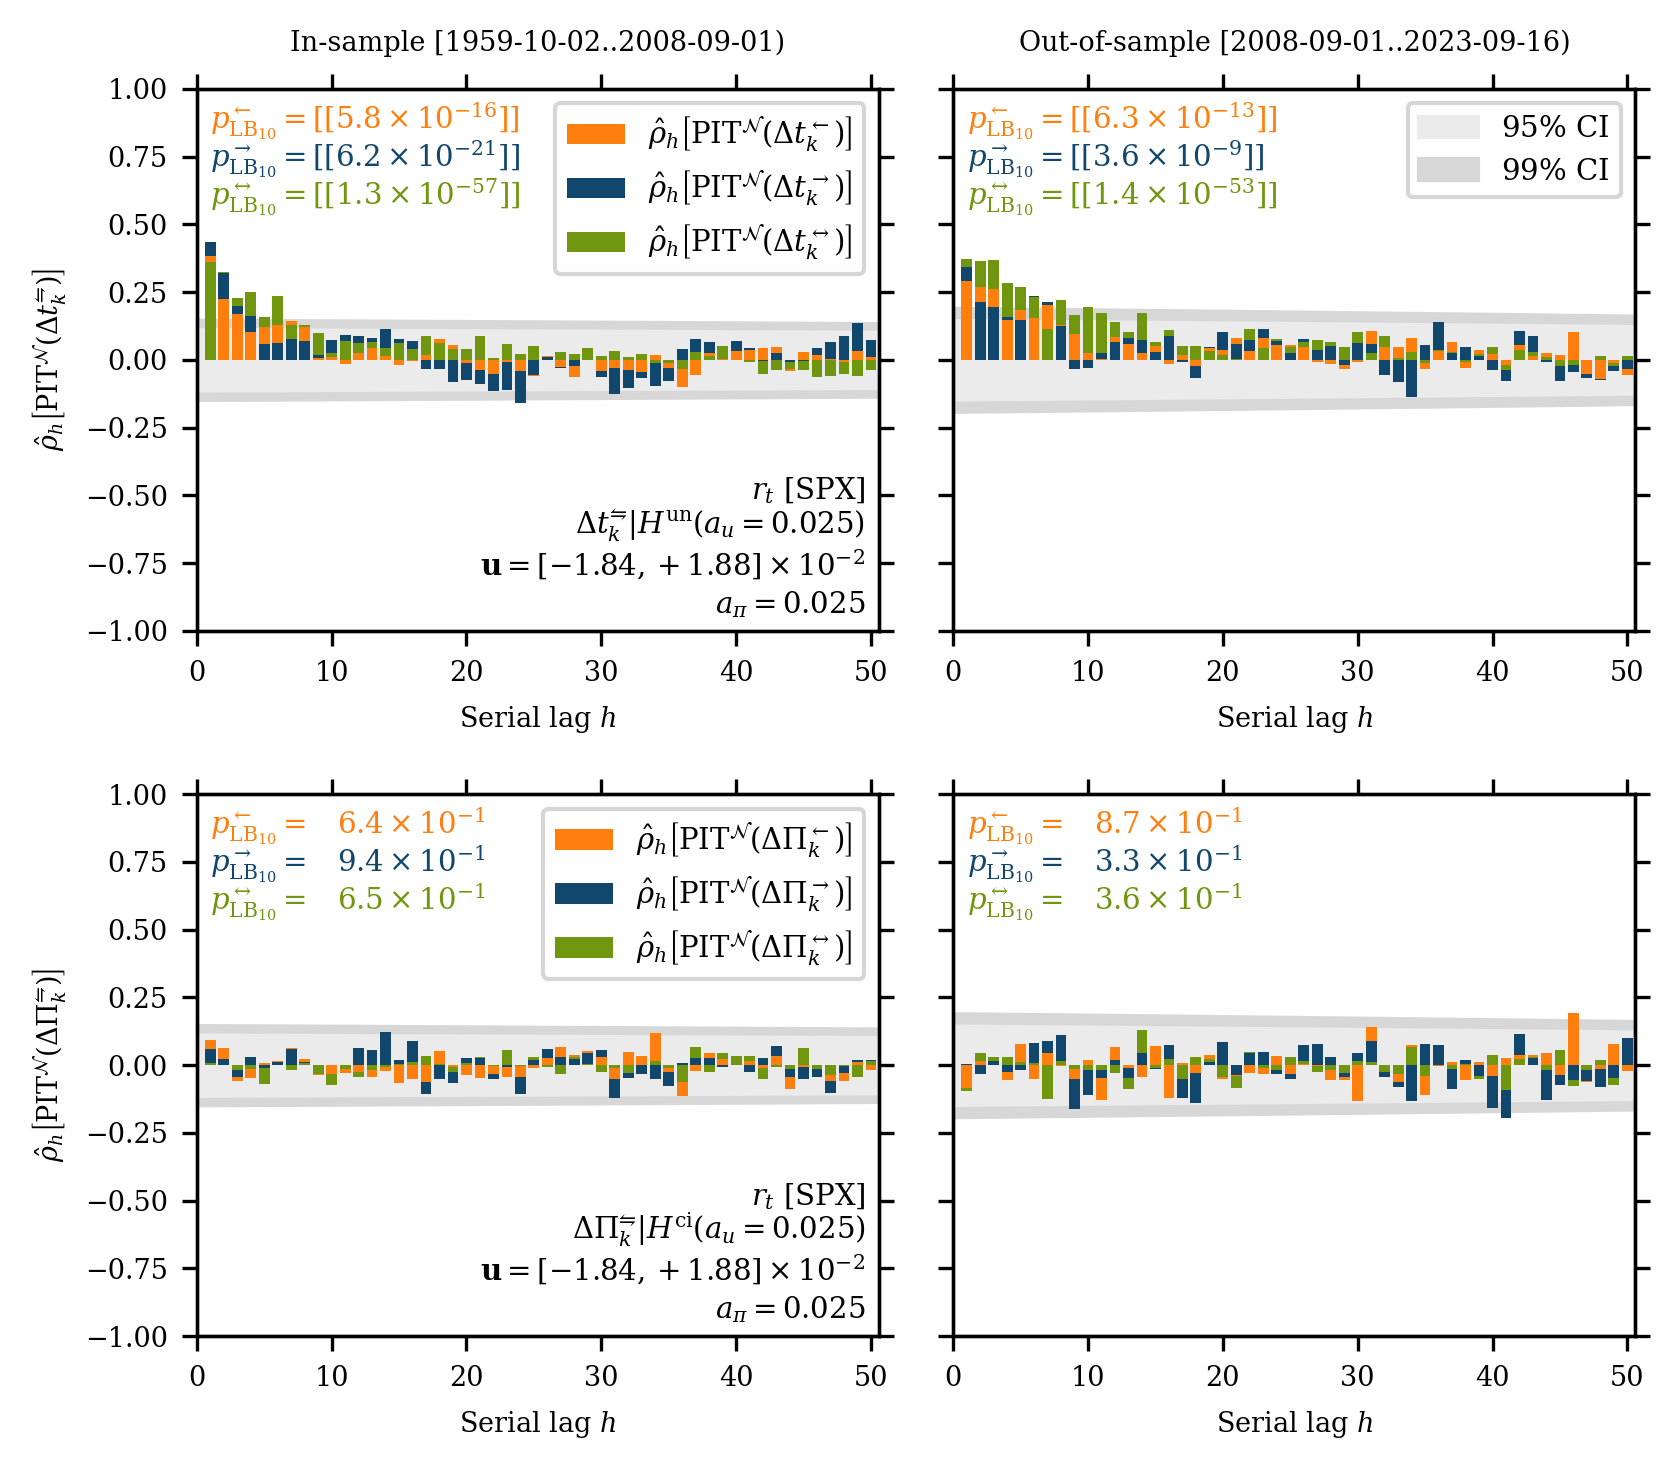

In [38]:
mode='ci'
mark='mark'

tf_mode = 'a_u'
tf_u_key = 1

H_LB = 10

periods = ['train', 'forecast']
vals = ['delta_t', 'delta_tilde_t']
I_s = [None]
Nlim_rf_upper_s = [10,5]
Nlim_rb_upper = 0.01
t_bracket = [False, True]

height = {1: 2.5, 2: 5, 3: 7}

KS_arrows = [f"\\leftarrow", f"\\rightarrow", f"\\leftrightarrow"]
ineqs = [f"<", f">"]

decades = 10*np.arange(193, 203)
decades_label = [f"{d}" for d in decades]

I_max = len(vals)
J_max = len(periods)
p_KS = {tick: [[None for j in range(J_max)] for i in range(I_max)] for tick in B20.tk}

for tick in B20.tk:

   ax2_head = [f"In-sample [{B20.tk[tick].pd.get_dates_str()[:10]}..{B20.tk[tick].pd.get_dates_str()[11:21]})", f"Out-of-sample [{B20.tk[tick].pd.get_dates_str()[11:21]}..{B20.tk[tick].pd.get_dates_str()[22:32]})"]


   decades_label = [f"{d}" for d in decades]
   if np.isin(tick, ['SPX', 'DJI']):
        for k in range(decades.size//2):
            decades_label[2*k] = f""

   overwrite_t_ps = {}
   tf_args = {'tf_mode': tf_mode}
   if tf_u_key is not None:
        tf_args['tf_u_key'] = tf_u_key
        tf_args['a_u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_u'][:,tf_u_key]
        tf_args['a_lambda'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_lambda'][:,tf_u_key]
        tf_args['u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['u'][:,tf_u_key]

   if tf_mode=='u':
      u_name = tf_args['u']
   else:
      u_name = tf_args['a_u']

   name = f"{tick}_LB-{H_LB}_{misc_fns.str_concatenate(vals, fill_str='-', fill_str_void=-1)}_stat_base_{misc_fns.str_concatenate(periods, fill_str='-', fill_str_void=-1)}_{tf_mode}={str(np.abs(u_name[0])).replace('.','')}"

   fig_KS = plot_fns.rc_plot_setup(name=name, nrows=I_max, ncols=J_max)

   fig_KS['ax2'] = [[fig_KS['ax'][i][j].twiny() for j in range(len(fig_KS['ax'][i]))] for i in range(len(fig_KS['ax']))]

   for i in range(I_max):
         for j in range(J_max):

            fig_KS['ax2'][i][j].tick_params(left=False, right=False, top=False, bottom=False,
                                             labelleft=False, labelright=False, labeltop=False, labelbottom=False)


   for i in range(I_max):
         for j in range(J_max):
            p_KS[tick][i][j] = lr_fns.LB_plot(self=B20, ax=fig_KS['ax'][i][j], ax2=fig_KS['ax2'][i][j], tick=tick, period=periods[j], val_key=vals[i], thesis=get_thesis(),
                                             **tf_args,
                                             I_s=I_s[0],
                                             plot_main_legend=j==0, 
                                             #plot_ci_legend=(i==0)*(j==0), plot_tick=(i==0)*(j==0), plot_u=(i==0)*(j==0), plot_a_lambda=(i==0)*(j==0),
                                             plot_ci_legend=(i==0)*(j==1), plot_tick=(j==0), plot_u=(j==0), plot_a_lambda=(j==0), plot_mod=(j==0),
                                             a_u_scif_pow10=0, a_lambda_scif_pow10=0,
                                             an_v_p='top', an_v_t='bottom', 
                                             #main_legend_loc='lower left', 
                                             main_legend_loc='upper right', 
                                             ci_legend_loc='upper right', ci_legend_ncols=1,
                                             mode=mode,
                                             lw=1.5,
                                             plot_I_list=['I', 'I_cat'], 
                                             overwrite_t_ps=overwrite_t_ps,
                                             #Nlim_rf_upper=Nlim_rf_upper_s[i], Nlim_rb_upper=Nlim_rb_upper, 
                                             an_y0=0.02,
                                             hwk_uncond=True,
                                             ylim=[-1,1],
                                             H_LB=H_LB,
                                             #an_y0_p=0.85, 
                                             #an_y0_t=0.02, 
                                             #u_scif_pow10=0,
                                             #ci_legend_loc='lower right', ci_legend_ncols=1,
                                             #main_legend_ncols=2,
                                             #ci_legend_ncols=1, ci_legend_loc='center right', 
                                             #main_legend_ncols=1, main_legend_loc='center left'
                                             )
            if False:
               if i==0:
                  xylim = {f"{a}lim": fig_KS['ax'][i][j].__getattribute__(f'get_{a}lim')() for a in ['x', 'y']} 

                  fig_KS["ax"][i][j].set_xticks([pd.Timestamp(f"{d}") for d in decades])
                  fig_KS["ax"][i][j].set_xticklabels(decades_label)

                  for alim in xylim:
                     fig_KS['ax'][i][j].__getattribute__(f'set_{alim}')(xylim[alim])

            if False:
               fig_KS["ax"][i][j].set_ylabel(f"$N_{{t}}^{{{KS_arrows[j]}}} | r_{{t}} {ineqs[j]} u^{{{KS_arrows[j]}}}$ [{tick}]")

   if True:         
      for j in range(len(periods)):
         fig_KS['ax2'][0][j].set_xlabel(ax2_head[j], 
                                    labelpad=9
                                    )

   for i in range(2):
       fig_KS['ax'][i][-1].set_ylabel("")
       fig_KS['ax'][i][-1].tick_params(labelleft=False)

   if True:
       for i in range(len(fig_KS['ax'])):
           for j in range(len(fig_KS['ax'][i])):
               fig_KS['ax'][i][j].set_ylim([-1,1])

   fig_export(fig_KS, height=height[I_max])


c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:512: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()


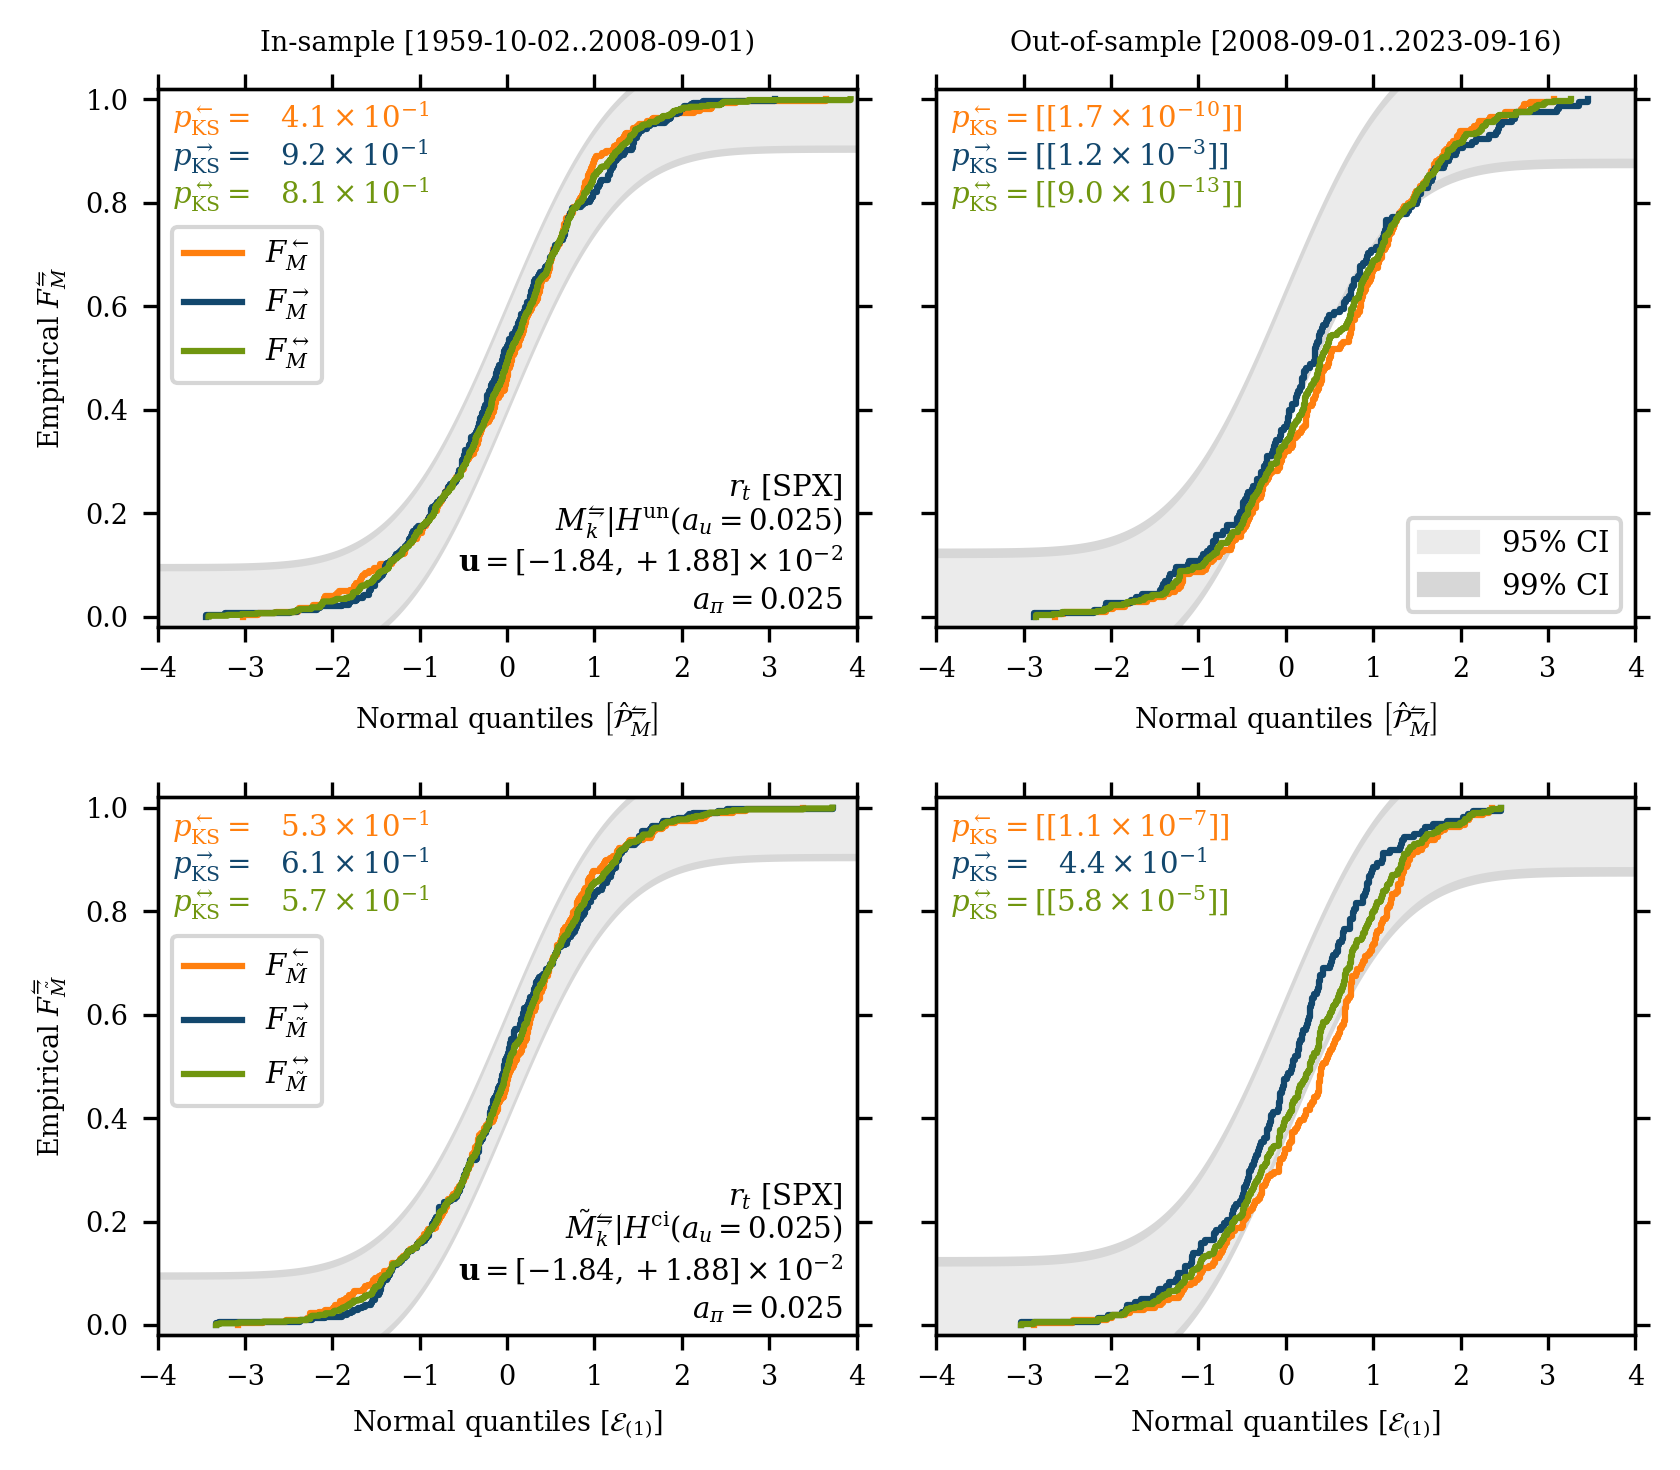

In [39]:
mode='ci'
mark='mark'

tf_mode = 'a_u'
tf_u_key = 1

periods = ['train', 'forecast']
vals = ['M', 'tilde_M']
I_s = [None]
Nlim_rf_upper_s = [10,5]
Nlim_rb_upper = 0.01
t_bracket = [False, True]

height = {1: 2.5, 2: 5, 3: 7}

KS_arrows = [f"\\leftarrow", f"\\rightarrow", f"\\leftrightarrow"]
ineqs = [f"<", f">"]

decades = 10*np.arange(193, 203)
decades_label = [f"{d}" for d in decades]

I_max = len(vals)
J_max = len(periods)
p_KS = {tick: [[None for j in range(J_max)] for i in range(I_max)] for tick in B20.tk}

for tick in B20.tk:

   ax2_head = [f"In-sample [{B20.tk[tick].pd.get_dates_str()[:10]}..{B20.tk[tick].pd.get_dates_str()[11:21]})", f"Out-of-sample [{B20.tk[tick].pd.get_dates_str()[11:21]}..{B20.tk[tick].pd.get_dates_str()[22:32]})"]


   decades_label = [f"{d}" for d in decades]
   if np.isin(tick, ['SPX', 'DJI']):
        for k in range(decades.size//2):
            decades_label[2*k] = f""

   overwrite_t_ps = {}
   tf_args = {'tf_mode': tf_mode}
   if tf_u_key is not None:
        tf_args['tf_u_key'] = tf_u_key
        tf_args['a_u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_u'][:,tf_u_key]
        tf_args['a_lambda'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_lambda'][:,tf_u_key]
        tf_args['u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['u'][:,tf_u_key]

   if tf_mode=='u':
      u_name = tf_args['u']
   else:
      u_name = tf_args['a_u']

   name = f"{tick}_KS_{misc_fns.str_concatenate(vals, fill_str='-', fill_str_void=-1)}_stat_base_{misc_fns.str_concatenate(periods, fill_str='-', fill_str_void=-1)}_{tf_mode}={str(np.abs(u_name[0])).replace('.','')}"

   fig_KS = plot_fns.rc_plot_setup(name=name, nrows=I_max, ncols=J_max)

   fig_KS['ax2'] = [[fig_KS['ax'][i][j].twiny() for j in range(len(fig_KS['ax'][i]))] for i in range(len(fig_KS['ax']))]

   for i in range(I_max):
         for j in range(J_max):

            fig_KS['ax2'][i][j].tick_params(left=False, right=False, top=False, bottom=False,
                                             labelleft=False, labelright=False, labeltop=False, labelbottom=False)


   for i in range(I_max):
         for j in range(J_max):
            p_KS[tick][i][j] = lr_fns.KS_plot(self=B20, ax=fig_KS['ax'][i][j], ax2=fig_KS['ax2'][i][j], tick=tick, period=periods[j], val_key=vals[i], t_bracket=t_bracket[i], thesis=get_thesis(),
                                             **tf_args,
                                             I_s=I_s[0],
                                             plot_main_legend=j==0,
                                             #plot_ci_legend=(i==0)*(j==0), plot_tick=(i==0)*(j==0), plot_u=(i==0)*(j==0), plot_a_lambda=(i==0)*(j==0),
                                             plot_ci_legend=(i==0)*(j==1), plot_tick=(j==0), plot_u=(j==0), plot_a_lambda=(j==0), plot_mod=j==0,
                                             a_u_scif_pow10=0, a_lambda_scif_pow10=0,
                                             mode=mode,
                                             lw=1.5,
                                             plot_I_list=['I', 'I_cat'], 
                                             overwrite_t_ps=overwrite_t_ps,
                                             Nlim_rf_upper=Nlim_rf_upper_s[i], Nlim_rb_upper=Nlim_rb_upper, 
                                             an_y0=0.02, 
                                             hwk_uncond=True,
                                             #an_y0_p=0.85, 
                                             #an_y0_t=0.02, 
                                             #u_scif_pow10=0,
                                             #ci_legend_loc='lower right', ci_legend_ncols=1,
                                             #main_legend_ncols=2,
                                             #ci_legend_ncols=1, ci_legend_loc='center right', 
                                             #main_legend_ncols=1, main_legend_loc='center left'
                                             )
            if False:
               if i==0:
                  xylim = {f"{a}lim": fig_KS['ax'][i][j].__getattribute__(f'get_{a}lim')() for a in ['x', 'y']} 

                  fig_KS["ax"][i][j].set_xticks([pd.Timestamp(f"{d}") for d in decades])
                  fig_KS["ax"][i][j].set_xticklabels(decades_label)

                  for alim in xylim:
                     fig_KS['ax'][i][j].__getattribute__(f'set_{alim}')(xylim[alim])

            if False:
               fig_KS["ax"][i][j].set_ylabel(f"$N_{{t}}^{{{KS_arrows[j]}}} | r_{{t}} {ineqs[j]} u^{{{KS_arrows[j]}}}$ [{tick}]")

   if True:         
      for j in range(len(periods)):
         fig_KS['ax2'][0][j].set_xlabel(ax2_head[j], 
                                    labelpad=9
                                    )

   for i in range(2):
       fig_KS['ax'][i][-1].set_ylabel("")
       fig_KS['ax'][i][-1].tick_params(labelleft=False)

      
   

   fig_export(fig_KS, height=height[I_max])


c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:512: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()
c:\Users\mft28\.conda\envs\PhD\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


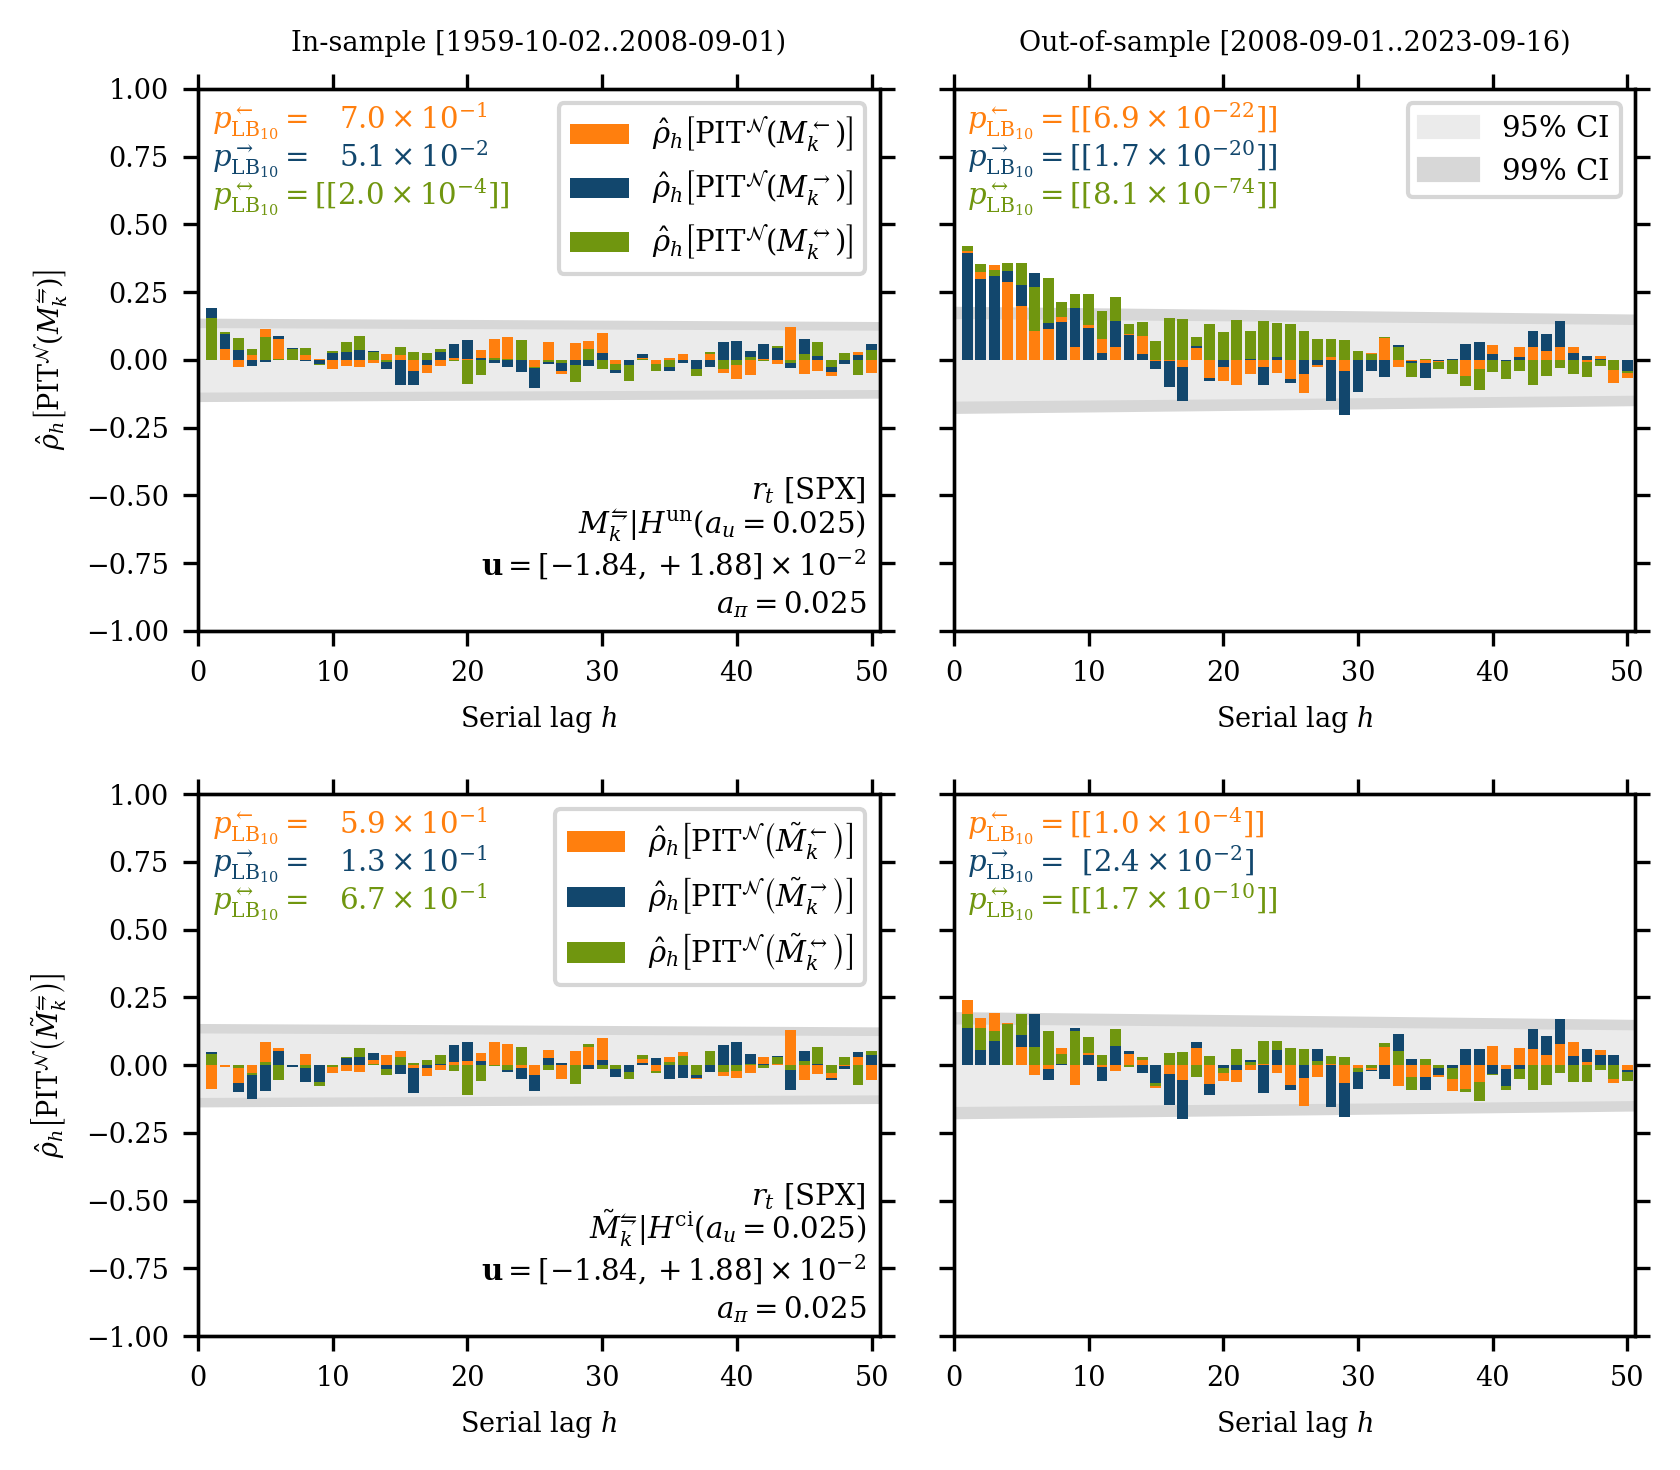

In [40]:
mode='ci'
mark='mark'

tf_mode = 'a_u'
tf_u_key = 1

H_LB = 10

periods = ['train', 'forecast']
vals = ['M', 'tilde_M']
I_s = [None]
Nlim_rf_upper_s = [10,5]
Nlim_rb_upper = 0.01
t_bracket = [False, True]

height = {1: 2.5, 2: 5, 3: 7}

KS_arrows = [f"\\leftarrow", f"\\rightarrow", f"\\leftrightarrow"]
ineqs = [f"<", f">"]

decades = 10*np.arange(193, 203)
decades_label = [f"{d}" for d in decades]

I_max = len(vals)
J_max = len(periods)
p_KS = {tick: [[None for j in range(J_max)] for i in range(I_max)] for tick in B20.tk}

for tick in B20.tk:

   ax2_head = [f"In-sample [{B20.tk[tick].pd.get_dates_str()[:10]}..{B20.tk[tick].pd.get_dates_str()[11:21]})", f"Out-of-sample [{B20.tk[tick].pd.get_dates_str()[11:21]}..{B20.tk[tick].pd.get_dates_str()[22:32]})"]


   decades_label = [f"{d}" for d in decades]
   if np.isin(tick, ['SPX', 'DJI']):
        for k in range(decades.size//2):
            decades_label[2*k] = f""

   overwrite_t_ps = {}
   tf_args = {'tf_mode': tf_mode}
   if tf_u_key is not None:
        tf_args['tf_u_key'] = tf_u_key
        tf_args['a_u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_u'][:,tf_u_key]
        tf_args['a_lambda'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['a_lambda'][:,tf_u_key]
        tf_args['u'] = B20.tk[tick]._tail_fit[tf_mode]['lambda']['u'][:,tf_u_key]

   if tf_mode=='u':
      u_name = tf_args['u']
   else:
      u_name = tf_args['a_u']

   name = f"{tick}_LB-{H_LB}_{misc_fns.str_concatenate(vals, fill_str='-', fill_str_void=-1)}_stat_base_{misc_fns.str_concatenate(periods, fill_str='-', fill_str_void=-1)}_{tf_mode}={str(np.abs(u_name[0])).replace('.','')}"

   fig_KS = plot_fns.rc_plot_setup(name=name, nrows=I_max, ncols=J_max)

   fig_KS['ax2'] = [[fig_KS['ax'][i][j].twiny() for j in range(len(fig_KS['ax'][i]))] for i in range(len(fig_KS['ax']))]

   for i in range(I_max):
         for j in range(J_max):

            fig_KS['ax2'][i][j].tick_params(left=False, right=False, top=False, bottom=False,
                                             labelleft=False, labelright=False, labeltop=False, labelbottom=False)


   for i in range(I_max):
         for j in range(J_max):
            p_KS[tick][i][j] = lr_fns.LB_plot(self=B20, ax=fig_KS['ax'][i][j], ax2=fig_KS['ax2'][i][j], tick=tick, period=periods[j], val_key=vals[i], thesis=get_thesis(),
                                             **tf_args,
                                             I_s=I_s[0],
                                             plot_main_legend=j==0, 
                                             #plot_ci_legend=(i==0)*(j==0), plot_tick=(i==0)*(j==0), plot_u=(i==0)*(j==0), plot_a_lambda=(i==0)*(j==0),
                                             plot_ci_legend=(i==0)*(j==1), plot_tick=(j==0), plot_u=(j==0), plot_a_lambda=(j==0), plot_mod=(j==0),
                                             a_u_scif_pow10=0, a_lambda_scif_pow10=0,
                                             an_v_p='top', an_v_t='bottom', 
                                             #main_legend_loc='lower left', 
                                             main_legend_loc='upper right', 
                                             ci_legend_loc='upper right', ci_legend_ncols=1,
                                             mode=mode,
                                             lw=1.5,
                                             plot_I_list=['I', 'I_cat'], 
                                             overwrite_t_ps=overwrite_t_ps,
                                             #Nlim_rf_upper=Nlim_rf_upper_s[i], Nlim_rb_upper=Nlim_rb_upper, 
                                             an_y0=0.02,
                                             hwk_uncond=True,
                                             ylim=[-1,1],
                                             H_LB=H_LB,
                                             #an_y0_p=0.85, 
                                             #an_y0_t=0.02, 
                                             #u_scif_pow10=0,
                                             #ci_legend_loc='lower right', ci_legend_ncols=1,
                                             #main_legend_ncols=2,
                                             #ci_legend_ncols=1, ci_legend_loc='center right', 
                                             #main_legend_ncols=1, main_legend_loc='center left'
                                             )
            if False:
               if i==0:
                  xylim = {f"{a}lim": fig_KS['ax'][i][j].__getattribute__(f'get_{a}lim')() for a in ['x', 'y']} 

                  fig_KS["ax"][i][j].set_xticks([pd.Timestamp(f"{d}") for d in decades])
                  fig_KS["ax"][i][j].set_xticklabels(decades_label)

                  for alim in xylim:
                     fig_KS['ax'][i][j].__getattribute__(f'set_{alim}')(xylim[alim])

            if False:
               fig_KS["ax"][i][j].set_ylabel(f"$N_{{t}}^{{{KS_arrows[j]}}} | r_{{t}} {ineqs[j]} u^{{{KS_arrows[j]}}}$ [{tick}]")

   if True:         
      for j in range(len(periods)):
         fig_KS['ax2'][0][j].set_xlabel(ax2_head[j], 
                                    labelpad=9
                                    )

   for i in range(2):
       fig_KS['ax'][i][-1].set_ylabel("")
       fig_KS['ax'][i][-1].tick_params(labelleft=False)

   if True:
       for i in range(len(fig_KS['ax'])):
           for j in range(len(fig_KS['ax'][i])):
               fig_KS['ax'][i][j].set_ylim([-1,1])

   fig_export(fig_KS, height=height[I_max])


In [41]:
B20.tk['SPX'].ill_tt = copy.deepcopy(B20.tk['SPX'].tt)
ill_lr = copy.deepcopy(B20.tk['SPX'].pd.lr['p']['all'])

In [42]:

ms=30
markers = ['<', '>']
N_gen = 4
gens = np.array(range(N_gen))
gen_labels = [f'Gen. {gen}' for gen in gens]

dots =  [
            [
                [8, 72],
                [79, 142],
                [93],
                [],
            ],
            [
                [99, 180],
                [17],
                [42, 153],
                [107],
            ],
        ]

daught =  [
            [
                [[[1,0]], [[0,0]]],
                [[[0,0]], [[1,1]]],
                [[[1,0]]],
                [[]],
            ],
            [
                [[[0,1]], []],
                [[[1,0]]],
                [[], []],
                [[]],
            ]
        ]

In [43]:
ill_lr[:200] = B20.tk['SPX'].pd.lr['p']['all'][10000:].values[
                                                np.logical_and(B20.tk['SPX'].pd.lr['p']['all'][10000:].values > B20.tk[tick].ill_tt.tt[mode][mark]._parameters.u.get_value()[0],
                                                                B20.tk['SPX'].pd.lr['p']['all'][10000:].values < B20.tk[tick].ill_tt.tt[mode][mark]._parameters.u.get_value()[1])
                                            ][:200]

In [44]:
tick='SPX'
mode='bi'
mark='mark'


dots_lambda =   [
                    [
                        [B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[0], B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[0]],
                        [B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[0], B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[0]],
                        [B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[0]],
                        [],
                    ],
                    [
                        [0.025, B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[1]],
                        [B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[1]],
                        [B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[1], B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[1]],
                        [B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[1]],
                    ],
                ]

for i in range(2):
    for gen in gens:
        for s in range(len(dots[i][gen])):
            print(i, gen, s, B20.tk[tick].ill_tt.tt[mode][mark]._parameters.u.get_value()[i] + (
                (-1)**i)*(B20.tk[tick].ill_tt.tt[mode][mark]._parameters.varsigma.get_value()[i] + B20.tk[tick].ill_tt.tt[mode][mark]._parameters.eta.get_value()[i]*
                (dots_lambda[i][gen][s] - B20.tk[tick].ill_tt.tt[mode][mark]._parameters.mu.get_value()[i]))*
                ((1-np.exp(B20.tk[tick].ill_tt.tt[mode][mark]._parameters.xi.get_value()[i]))/B20.tk[tick].ill_tt.tt[mode][mark]._parameters.xi.get_value()[i]))


0 0 0 -0.022740370965780077
0 0 1 -0.022740370965780077
0 1 0 -0.022740370965780077
0 1 1 -0.022740370965780077
0 2 0 -0.022740370965780077
1 0 0 0.0232027555565363
1 0 1 0.022145199724376417
1 1 0 0.022145199724376417
1 2 0 0.022145199724376417
1 2 1 0.022145199724376417
1 3 0 0.022145199724376417


In [45]:
dots_x =  [
            [
                [-0.0275, -0.0283],
                [-0.0191, -0.0229],
                [-0.0224],
                [],
            ],
            [
                [0.0232, 0.0212],
                [0.0264],
                [0.0191, 0.0231],
                [0.0203],
            ],
        ]

for i in range(2):
    for gen in gens:
        for s in range(len(dots[i][gen])):
            ill_lr[dots[i][gen][s]] = dots_x[i][gen][s]


In [46]:
# %%time
for mode in B20.tk['SPX'].ill_tt.tt:
    for mark in B20.tk['SPX'].ill_tt.tt[mode]:
        for i in range(2):
            B20.tk['SPX'].ill_tt.tt[mode][mark]._df[i] = ill_lr.values
            B20.tk['SPX'].ill_tt.tt[mode][mark]._data[i,:] = ill_lr.values
        B20.tk['SPX'].ill_tt.tt[mode][mark].detect_events()
        B20.tk['SPX'].ill_tt.tt[mode][mark].set_t_series()
        B20.tk['SPX'].ill_tt.tt[mode][mark].fill_t_series_fine()

c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\plot_functions.py:619: UserWarning: The figure layout has changed to tight
  fig["fig"].tight_layout()


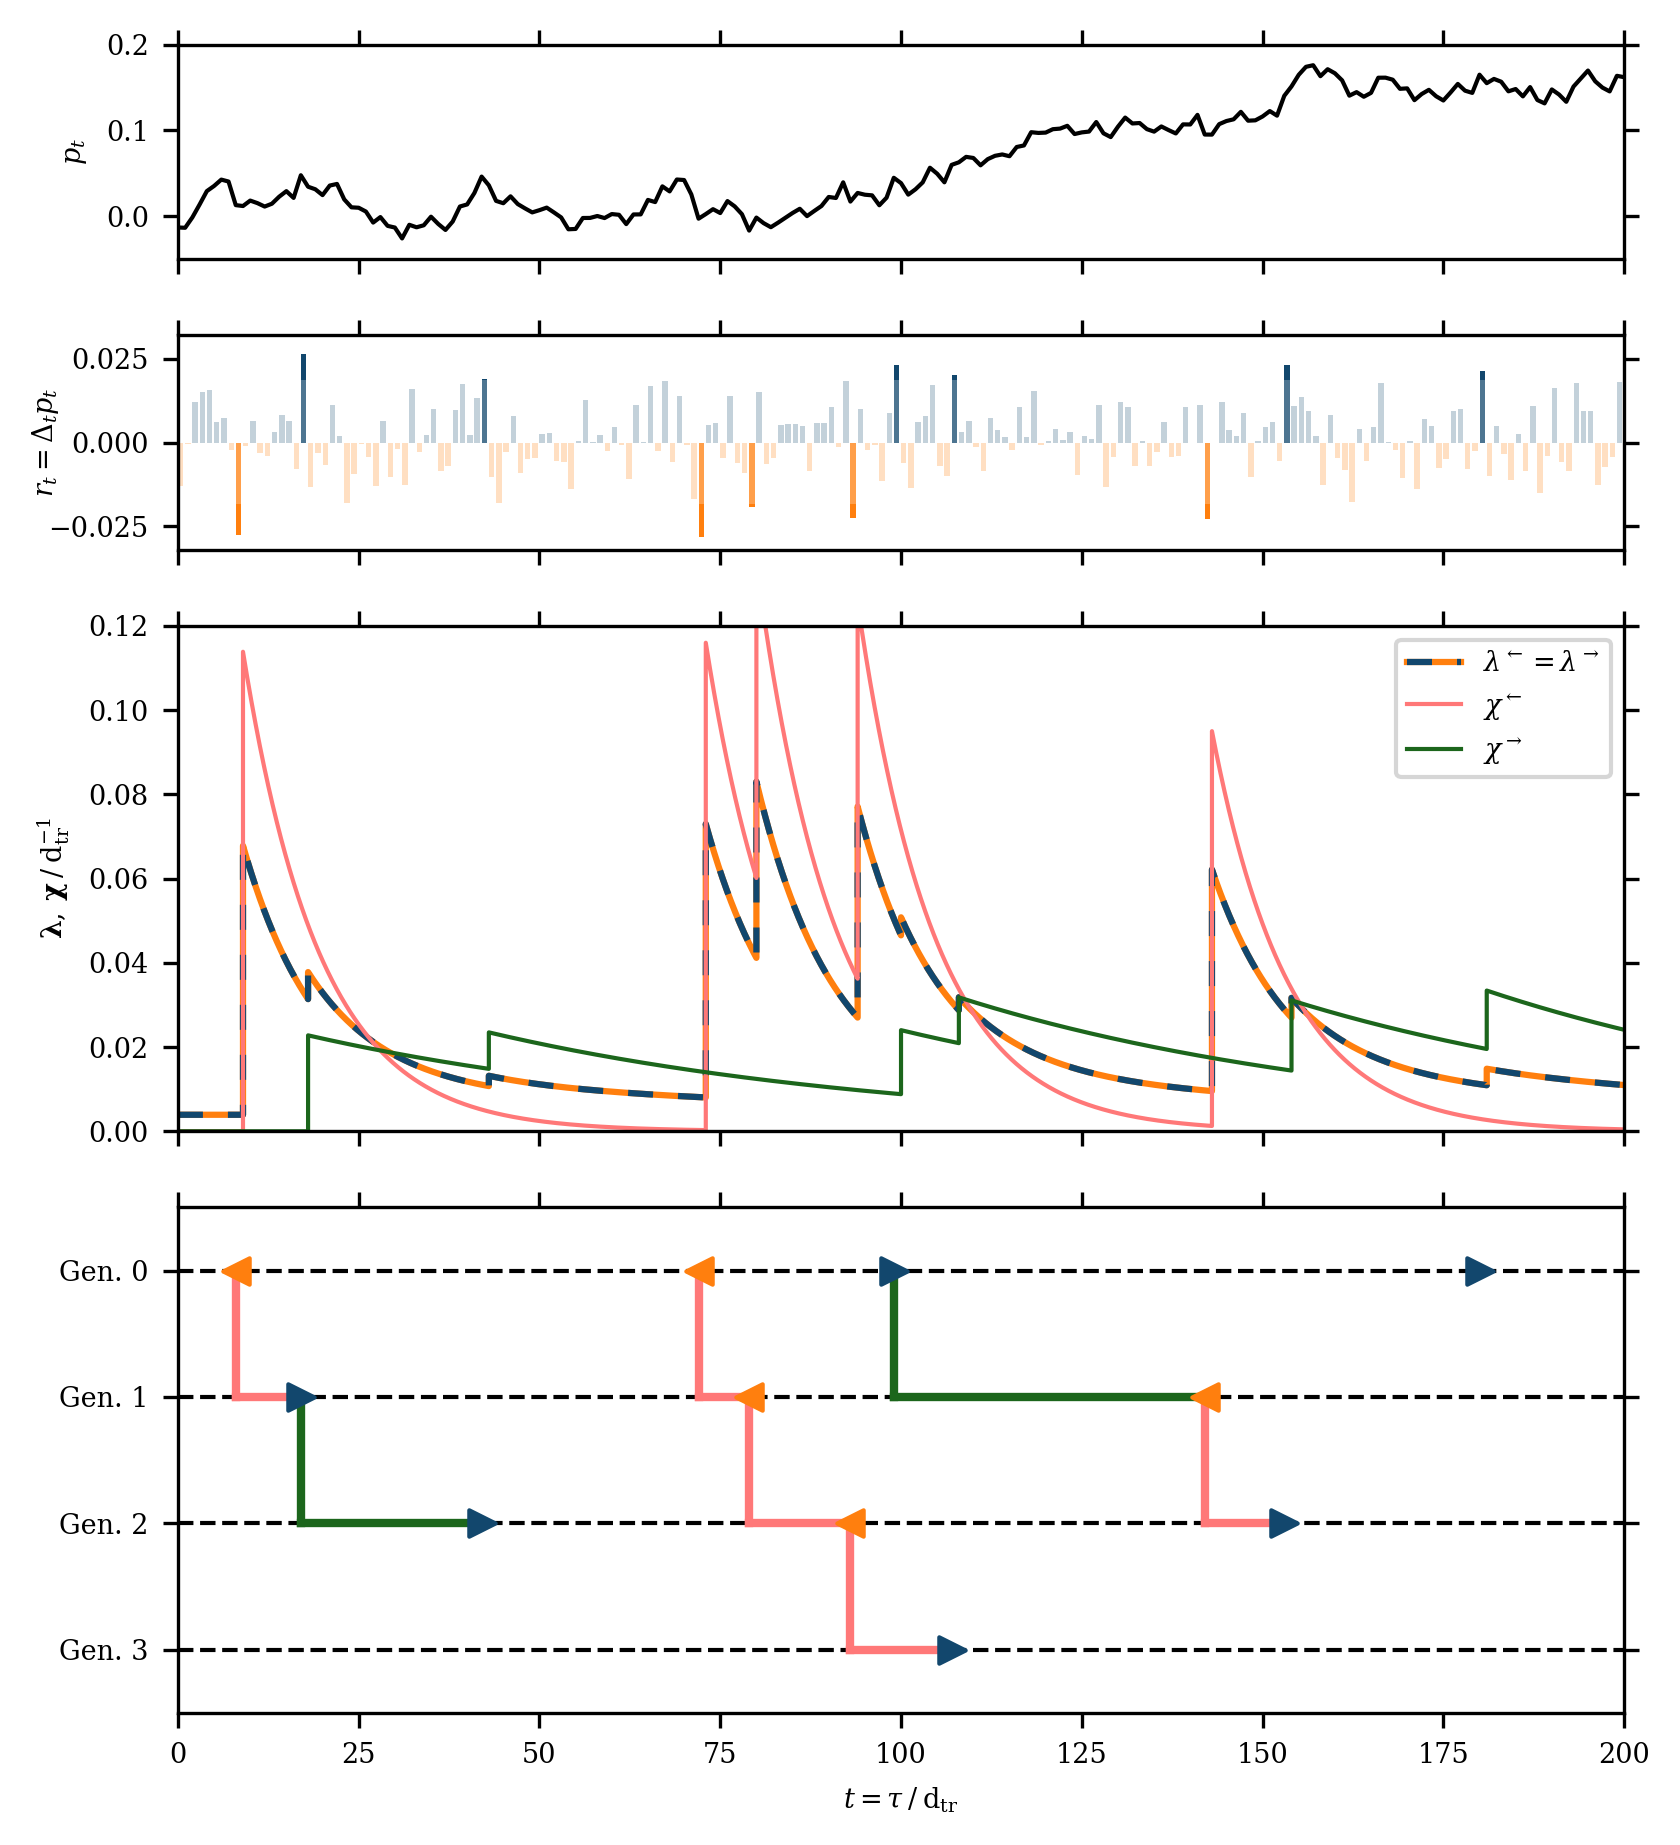

In [47]:
tick='SPX'
mode='ci'
mark='mark'




fig_branch = plot_fns.fig_column_setup(name=f'ILL_branch_{mode}-{mark}', hratio=np.array([1,1,2,2]))

p_t = np.cumsum(B20.tk[tick].ill_tt.tt[mode][mark]._df[0].values)
P_t = 100*np.exp(p_t)

if False:
    fig_branch["ax"][0][0].plot(np.array(range(P_t.size)), P_t, linewidth=1, color='black')
    fig_branch["ax"][0][0].set_ylabel("$P_{{t}}$")
    fig_branch["ax"][0][0].set_ylim([95, 125])
else:
    fig_branch["ax"][0][0].plot(np.array(range(p_t.size)), p_t, linewidth=1, color='black')
    fig_branch["ax"][0][0].set_ylabel("$p_{{t}}$")
    fig_branch["ax"][0][0].set_ylim([-0.05, 0.2])

ms=40
markers = ['<', '>']
alphas = [0.25, 0.75, 1]
side_list = ["left", "right"]
sub = [np.logical_and(-((-1)**i)*B20.tk[tick].ill_tt.tt[mode][mark]._df[0]>0, -((-1)**i)*B20.tk[tick].ill_tt.tt[mode][mark]._df[0]<=np.abs(B20.tk[tick].ill_tt.tt[mode][mark]._parameters.u.get_value())[i]) for i in range(2)]
barwidth=0.75


for i in range(2):
    side = side_list[i]
    fig_branch["ax"][1][0].bar(x=np.where(sub[i])[0], 
                                        height=B20.tk[tick].ill_tt.tt[mode][mark]._df[0][sub[i].values], 
                                width=barwidth, align="edge", color=plot_fns.colour_transform_alpha(cols_tail[0][i], alpha=0.25))
    fig_branch["ax"][1][0].bar(x=B20.tk[tick].ill_tt.tt[mode][mark]._events["t"][i, :B20.tk[tick].ill_tt.tt[mode][mark]._events["N"][i]], 
                                        height=-((-1)**i)*np.abs(B20.tk[tick].ill_tt.tt[mode][mark]._parameters.u.get_value())[i], 
                                width=barwidth, align="edge", color=plot_fns.colour_transform_alpha(cols_tail[0][i], alpha=0.75))
    fig_branch["ax"][1][0].bar(x=B20.tk[tick].ill_tt.tt[mode][mark]._events["t"][i, :B20.tk[tick].ill_tt.tt[mode][mark]._events["N"][i]], 
                                        height=-((-1)**i)*B20.tk[tick].ill_tt.tt[mode][mark]._events["M"][i, :B20.tk[tick].ill_tt.tt[mode][mark]._events["N"][i]], 
                                        bottom=-((-1)**i)*np.abs(B20.tk[tick].ill_tt.tt[mode][mark]._parameters.u.get_value())[i],
                                width=barwidth, align="edge", color=plot_fns.colour_transform_alpha(cols_tail[0][i], alpha=1))

fig_branch["ax"][1][0].set_ylim(0.032*np.array([-1,1]))
if False:
    fig_branch["ax"][1][0].set_ylabel(f"$\\Delta_{{t}}\\mathrm{{ln}}{{P_t}}$", labelpad=-3)
else:
    fig_branch["ax"][1][0].set_ylabel(f"$r_{{t}} = \\Delta_{{t}}{{p_{{t}}}}$", labelpad=-3)



if False:
    B20.tk[tick].ill_tt.tt[mode][mark].plot_lambda_ax(markers=False, plot_chi=True, market_time=True, ax=fig_branch["ax"][2][0])
    for i in range(2):
        fig_branch["ax"][2][0].get_children()[i].set_color(cols_tail[0][i])
        fig_branch["ax"][2][0].get_children()[2+i].set_color(cols_tail[1][i])
        fig_branch["ax"][2][0].get_children()[i].set_linewidth(1.5)
        fig_branch["ax"][2][0].get_children()[2+i].set_linewidth(1)
else:
    linestyles = ['-', (0, (4, 4))]
    t_plot = B20.tk[tick].ill_tt.tt[mode][mark].get_t_fine_plot(market_time=True)[:,:,1:-2]
    for i in range(2):
        fig_branch['ax'][2][0].plot(np.concatenate(t_plot[i]), 
                                    np.concatenate(B20.tk[tick].ill_tt.tt[mode][mark]._t_series["lambda_fine"][i]),
                                    color=cols_tail[0][i], linewidth=1.5, linestyle=linestyles[i])
    for i in range(2):
        fig_branch['ax'][2][0].plot(np.concatenate(t_plot[i]), 
                                    np.concatenate(B20.tk[tick].ill_tt.tt[mode][mark]._t_series["chi_fine"][i]),
                                    color=cols_tail[1][i], linewidth=1, linestyle='-')
fig_branch["ax"][2][0].set_ylim([0,0.12])
#fig_branch["ax"][2][0].set_ylabel("$\\lambda^{{\\leftrightharpoons}}, \\: \\chi^{{\\leftrightharpoons}} \\: / \\: {{\mathrm{{d}}_{{\mathrm{{t}}}}}}^{{-1}}$")
fig_branch["ax"][2][0].set_ylabel(f"${GR.pltsbv('lambda')}, \\: {GR.pltsbv('chi')} \\: / \\: {hwks_fns.get_model_unit()['a_lambda']}$")
fig_branch["ax"][2][0].legend([(fig_branch["ax"][2][0].get_children()[0], fig_branch["ax"][2][0].get_children()[1]), 
                                fig_branch["ax"][2][0].get_children()[2],
                                fig_branch["ax"][2][0].get_children()[3]], 
                                [f'$\\lambda^{{\\leftarrow}} = \\lambda^{{\\rightarrow}}$', 
                                f'$\\chi^{{\\leftarrow}}$', f'$\\chi^{{\\rightarrow}}$'])




for gen in gens:
    fig_branch['ax'][3][0].axhline(-gen, color='black', linewidth=1, linestyle='--')

for i in range(2):
    for gen in gens:
        for s in range(len(daught[i][gen])):
            for d in range(len(daught[i][gen][s])):
                fig_branch['ax'][3][0].plot(np.repeat(dots[i][gen][s],2), -np.array([gen, gen+1]), color=cols_tail[1][i], linewidth=2)
                fig_branch['ax'][3][0].plot([dots[i][gen][s], dots[daught[i][gen][s][d][0]][gen+1][daught[i][gen][s][d][1]]],
                                -np.repeat(gen+1, 2), color=cols_tail[1][i], linewidth=2)

for i in range(2):
    for gen in gens:
        fig_branch['ax'][3][0].scatter(dots[i][gen], np.repeat(-gen, len(dots[i][gen])), color=cols_tail[0][i], zorder=3, marker=markers[i], s=ms)

fig_branch['ax'][3][0].set_ylim(-N_gen+0.5, 0.5)
fig_branch['ax'][3][0].set_yticks(-gens)
fig_branch['ax'][3][0].set_yticklabels(gen_labels)


for i in range(4):
    fig_branch["ax"][i][0].set_xlim([0,200])


#for i in [0, -1]:
fig_branch["ax"][0][0].tick_params(labeltop=False)
for i in [-1]:
    fig_branch["ax"][i][0].set_xlabel(f"$t = \\tau \\: / \\: {hwks_fns.get_unit_d_tr()}$")




fig_branch['fig'].tight_layout()
fig_branch['fig'].set_size_inches(5.7,6.25)

fig_branch["fig"].set_dpi(300)
fig_export(fig_branch, height=6.25)

In [48]:
def print_table_r_stat(ticks=None, do_print=None, do_write=None, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None,
                       phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format=None):

    if print_ftab is None:
        print_ftab = True

    scif_string_spec = {
                        #'exp_zeros': 1,
                        'dp': 2,
                        'phantom_sign': phantom_sign, 
                        'phantom_brac': phantom_brac,
                        'sign_inside_brac': sign_inside_brac, 
                        'scif_string_format': scif_string_format,
                    }


    tab_str = []
    ftab_str = []

    if ticks is None:
        ticks = B20._ticks
    ticks = misc_fns.make_iterable_array(ticks)


    rows = ['head', 'T', 'Xbar', 'sigma_X', 'Q_X', 'MAD_X']
    row_symbols =   [{
                        'head': f"\\multicolumn{{1}}{{c}}{{}}",
                        'T': f"$\\Delta{{T}}_{{{i}}}$",
                        'Xbar': f"$\\mathrm{{Mean}}{{\\left(\\rsPr_{{T_{{{i-1}}}:.T_{{{i}}}}}\\right)}}$",
                        'sigma_X': f"$\\mathrm{{SD}}{{\\left(\\rsPr_{{T_{{{i-1}}}:.T_{{{i}}}}}\\right)}}$",
                        'Q_X': f"$Q_{{0.5}}{{\\left(\\rsPr_{{T_{{{i-1}}}:.T_{{{i}}}}}\\right)}}$",
                        'MAD_X': f"$\\mathrm{{MAD}}{{\\left(\\rsPr_{{T_{{{i-1}}}:.T_{{{i}}}}}\\right)}}$",
                    } for i in 1+np.arange(2)]

    periods = ['train', 'forecast']

    t_str_w = {row: {period: '' for period in periods} for row in rows}
    #t_str = {row: {period: {tick: '' for tick in ticks} for period in ['train', 'forecast']} for row in rows}
    t_str = {row: {period: ['' for tick in ticks] for period in periods} for row in rows}


    for p in range(len(periods)):
        period = periods[p]
        #for tick in t_str['head'][period]:
            #t_str['head'][period][tick] = f"& \\multicolumn{{1}}{{c}}{{{tick}}} "
        for t in range(len(ticks)):
            tick = ticks[t]
            t_str['head'][period][t] = f"& \\multicolumn{{1}}{{l}}{{{tick}}} "

            if period=='train':
                data = B20.tk[tick].pd.lr['p']['train'].values
            else:
                data = B20.tk[tick].pd.lr['p']['forecast'][0][0].values

            T = data.size
            mean = np.mean(data)
            std = np.std(data) * np.sqrt(T/(T-1))

            median = np.quantile(data, 0.5)
            mad = np.quantile(np.abs(data-median), 0.5)

  


            if True:
                t_str['T'][period][t] = f"& {misc_fns.capp_dlrs_tex_num(S=T, app_dlrs=True, app_tex_num=True)} "
                t_str['Xbar'][period][t] = f"& {misc_fns.scif_string(mean, **scif_string_spec)} "
                t_str['sigma_X'][period][t] = f"& {misc_fns.scif_string(std, **scif_string_spec)} "
                t_str['Q_X'][period][t] = f"& {misc_fns.scif_string(median, **scif_string_spec)} "
                t_str['MAD_X'][period][t] = f"& {misc_fns.scif_string(mad, **scif_string_spec)} "
            else:
                t_str['T'][period][t] = f"& ${T}$ "
                t_str['Xbar'][period][t] = f"& {misc_fns.scif_string(mean, dp=1, app_dlrs=True)} "
                t_str['sigma_X'][period][t] = f"& {misc_fns.scif_string(std, dp=1, app_dlrs=True)} "
                

            for row in rows:
                t_str_w[row][period] += t_str[row][period][t]


    N_ticks = len(t_str['head']['train'])
    c_str = 'c'
    for c in range(2*N_ticks):
        c_str += 'c'
    #tab_str.append(f"\\begin{{tabular}}{{{c_str}}}")

    sample_string = {
                        "train": f"& \\multicolumn{{{N_ticks}}}{{c}}{{In-sample [{B20.tk[ticks[0]].pd._dates['train'][0].strftime('%Y-%m-%d')}..{B20.tk[ticks[0]].pd._dates['train'][-1].strftime('%Y-%m-%d')})}}",
                        "forecast": f"& \\multicolumn{{{N_ticks}}}{{c}}{{Out-of-sample [{B20.tk[ticks[0]].pd._dates['train'][-1].strftime('%Y-%m-%d')}..{B20.tk[ticks[0]].pd._dates['all'][-1].strftime('%Y-%m-%d')})}}",
                    }
    
    left_r = 1
    C = np.size(ticks)


    tab_macro_str = f"TABrStat"
    tab_mfn_str = f"\\{C_str['l']}{tab_macro_str}"

    if print_ftab:
        c_str = misc_fns.str_concatenate(np.concatenate([np.repeat('r', left_r), np.repeat('l', C)]))
        ftab_str = plot_fns.calc_ftab_str(tab_mfn_str=tab_mfn_str, c_str=c_str, sizes=None, size=ftab_size, ftab_str=ftab_str)

    tab_str.append(f"\\newcommand{{{tab_mfn_str}}}{{")

    for p in range(len(periods)):
        period = periods[p]


        tab_str.append(f"\\multicolumn{{1}}{{c}}{{}}")
        #tab_str.append(f"& \\multicolumn{{{N_ticks}}}{{c}}{{In-sample [\\rsDateTrainStart{{}}..\\rsDateTrainEnd{{}})}}")
        #tab_str.append(f"& \\multicolumn{{{N_ticks}}}{{c}}{{Out-of-sample [\\rsDateTrainEnd{{}}..\\rsDateAllEnd{{}})}}")

        tab_str.append(sample_string[period])


        tab_str.append(f"\\\\") 
        #tab_str.append(f"\\cmidrule{{{2+0*N_ticks}-{2+1*N_ticks-1}}} \cmidrule{{{2+1*N_ticks}-{2+2*N_ticks-1}}}")
        tab_str.append(f"\\cmidrule{{{2+0*N_ticks}-{2+1*N_ticks-1}}}")

        for row in t_str_w:
            tab_str.append(row_symbols[p][row])
            tab_str.append(t_str_w[row][period])
            tab_str.append("\\\\")
            if row=='head':
                tab_str.append('\\hline')
            elif row==rows[-1] and period!="forecast":
                tab_str.append('\\hline')

        #tab_str.append(f"\\end{{tabular}}")
    tab_str.append(f"}}")
    tab_str.append(f"")


    if file_nm is None:
        file_nm = "r_stat"

    print_str_pw(print_str=tab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"tab_{file_nm}", file_ext=file_ext)
    if print_ftab:
        print_str_pw(print_str=ftab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"ftab_{file_nm}", file_ext=file_ext)

In [49]:
def print_table_r_stat_alt(ticks=None, do_print=None, do_write=None, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None, p_str_head=None, align_tick=None,
                           phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format=None):

    if print_ftab is None:
        print_ftab = True

    Prd = "\\rsPrd"


    tab_str = []
    ftab_str = []

    scif_string_spec = {
            #'exp_zeros': 1,
            'dp': 2,
            'phantom_sign': phantom_sign, 
            'phantom_brac': phantom_brac,
            'sign_inside_brac': sign_inside_brac, 
            'scif_string_format': scif_string_format,
        }

    if ticks is None:
        ticks = B20._ticks
    ticks = misc_fns.make_iterable_array(ticks)
    N_ticks = np.size(ticks)

    if p_str_head is None:
        if N_ticks==1:
            p_str_head = 'p_str'

    if align_tick is None:
        if N_ticks==1:
            align_tick = 'l'
        else:
            align_tick = 'c'
        


    rows = ['head', 'i', 'Date_T_im1', 'Date_T_i', 'T', 'Xbar', 'sigma_X', 'Q_X', 'MAD_X']
    row_symbols =   {
                        'head': f"\\multicolumn{{1}}{{c}}{{}}",
                        'i': f"${Prd}$",
                        'Date_T_im1': f"$\\mathrm{{Date}}_{{T_{{{Prd}-1}}}}$",
                        'Date_T_i': f"$\\mathrm{{Date}}_{{T_{{{Prd}}}}}$",
                        'T': f"$\\Delta{{T}}_{{{Prd}}}$",
                        'Xbar': f"$\\mathrm{{Mean}}{{\\left(\\rsPr_{{T_{{{Prd}-1}}:.T_{{{Prd}}}}}\\right)}}$",
                        'sigma_X': f"$\\mathrm{{SD}}{{\\left(\\rsPr_{{T_{{{Prd}-1}}:.T_{{{Prd}}}}}\\right)}}$",
                        'Q_X': f"$Q_{{0.5}}{{\\left(\\rsPr_{{T_{{{Prd}-1}}:.T_{{{Prd}}}}}\\right)}}$",
                        'MAD_X': f"$\\mathrm{{MAD}}{{\\left(\\rsPr_{{T_{{{Prd}-1}}:.T_{{{Prd}}}}}\\right)}}$",
                    }
    
    periods = ['train', 'forecast']
    P = np.size(periods)

    t_str_w = {row: '' for row in rows}
    #t_str = {row: {period: {tick: '' for tick in ticks} for period in ['train', 'forecast']} for row in rows}
    t_str = {row: {period: ['' for tick in ticks] for period in periods} for row in rows}

    sample_dates = {
                        'train': [B20.tk[ticks[0]].pd._dates['train'][0].strftime('%Y-%m-%d'), B20.tk[ticks[0]].pd._dates['train'][-1].strftime('%Y-%m-%d')],
                        'forecast': [B20.tk[ticks[0]].pd._dates['train'][-1].strftime('%Y-%m-%d'), B20.tk[ticks[0]].pd._dates['all'][-1].strftime('%Y-%m-%d')],
                        'all': [B20.tk[ticks[0]].pd._dates['train'][0].strftime('%Y-%m-%d'), B20.tk[ticks[0]].pd._dates['all'][-1].strftime('%Y-%m-%d')],
                        }
        
    sample_p_str = {
                    "train": f"In-sample",
                    "forecast": f"Out-of-sample",
                    "all": f"In- \\& Out-of-sample",
                }
    
    sample_dates_str = {period: f"[{sample_dates[period][0]}..{sample_dates[period][-1]})" for period in sample_dates}
    
    if p_str_head=='p_str':
        sample_str = {period: f"\\multicolumn{{{N_ticks}}}{{{align_tick}}}{{{sample_p_str[period]}}}" for period in sample_dates}
    else:
        sample_str = {period: f"\\multicolumn{{{N_ticks}}}{{{align_tick}}}{{{sample_p_str[period]} {sample_dates_str[period]}}}" for period in sample_dates}

    for p in range(len(periods)):
        period = periods[p]
        #for tick in t_str['head'][period]:
            #t_str['head'][period][tick] = f"& \\multicolumn{{1}}{{c}}{{{tick}}} 

        

        
        for t in range(len(ticks)):
            tick = ticks[t]
            t_str['head'][period][t] = f"\\multicolumn{{1}}{{l}}{{{tick}}}"

            if period=='train':
                data = B20.tk[tick].pd.lr['p']['train'].values
            else:
                data = B20.tk[tick].pd.lr['p']['forecast'][0][0].values

            T = data.size
            mean = np.mean(data)
            std = np.std(data) * np.sqrt(T/(T-1))

            median = np.quantile(data, 0.5)
            mad = np.quantile(np.abs(data-median), 0.5)







            if True:
                t_str['i'][period][t] = f"${1+p}$"
                if period=='train':
                    t_str['Date_T_im1'][period][t] = B20.tk[ticks[t]].pd._dates['train'][0].strftime('%Y-%m-%d')
                    t_str['Date_T_i'][period][t] = B20.tk[ticks[t]].pd._dates['train'][-1].strftime('%Y-%m-%d')
                if period=='forecast':
                    t_str['Date_T_im1'][period][t] = B20.tk[ticks[t]].pd._dates['train'][-1].strftime('%Y-%m-%d')
                    t_str['Date_T_i'][period][t] = B20.tk[ticks[t]].pd._dates['all'][-1].strftime('%Y-%m-%d')
                if period=='all':
                    t_str['Date_T_im1'][period][t] = B20.tk[ticks[t]].pd._dates['train'][0].strftime('%Y-%m-%d')
                    t_str['Date_T_i'][period][t] = B20.tk[ticks[t]].pd._dates['all'][-1].strftime('%Y-%m-%d')

                t_str['T'][period][t] = f"{misc_fns.capp_dlrs_tex_num(S=T, app_dlrs=True, app_tex_num=True)}"
                t_str['Xbar'][period][t] = f"{misc_fns.scif_string(mean, **scif_string_spec)}"
                t_str['sigma_X'][period][t] = f"{misc_fns.scif_string(std, **scif_string_spec)}"
                t_str['Q_X'][period][t] = f"{misc_fns.scif_string(median, **scif_string_spec)}"
                t_str['MAD_X'][period][t] = f"{misc_fns.scif_string(mad, **scif_string_spec)}"
            else:
                t_str['T'][period][t] = f"& ${T}$ "
                t_str['Xbar'][period][t] = f"& {misc_fns.scif_string(mean, dp=1, app_dlrs=True)} "
                t_str['sigma_X'][period][t] = f"& {misc_fns.scif_string(std, dp=1, app_dlrs=True)} "
                

    for row in rows:
        t_str_w[row] = misc_fns.str_concatenate([misc_fns.str_concatenate(t_str[row][period], fill_str=' & ', fill_str_void=-1) for period in periods], fill_str=' & & ', fill_str_void=-1)

    
    
    left_r = 1
    C = P*(N_ticks+1)-1


    tab_macro_str = f"TABrStatAlt"
    tab_mfn_str = f"\\{C_str['l']}{tab_macro_str}"

    if print_ftab:
        c_str = misc_fns.str_concatenate(np.concatenate([np.repeat('r', left_r), np.repeat('l', C)]))
        ftab_str = plot_fns.calc_ftab_str(tab_mfn_str=tab_mfn_str, c_str=c_str, sizes=None, size=ftab_size, ftab_str=ftab_str)

    tab_str.append(f"\\newcommand{{{tab_mfn_str}}}{{")



    tab_str.append(f"\\multicolumn{{1}}{{c}}{{}}")
    #tab_str.append(f"& \\multicolumn{{{N_ticks}}}{{c}}{{In-sample [\\rsDateTrainStart{{}}..\\rsDateTrainEnd{{}})}}")
    #tab_str.append(f"& \\multicolumn{{{N_ticks}}}{{c}}{{Out-of-sample [\\rsDateTrainEnd{{}}..\\rsDateAllEnd{{}})}}")

    tab_str.append(f"& " + misc_fns.str_concatenate([sample_str[period] for period in periods], fill_str=' & & ', fill_str_void=-1))
    tab_str.append(f"\\\\") 
    #tab_str.append(f"\\cmidrule{{{2+0*N_ticks}-{2+1*N_ticks-1}}} \cmidrule{{{2+1*N_ticks}-{2+2*N_ticks-1}}}")
    tab_str.append(misc_fns.str_concatenate([f"\\cmidrule{{{2+p*(N_ticks+1)}-{2+(1+p)*(N_ticks+1)-2}}}" for p in range(P)]))

    for row in t_str_w:
        tab_str.append(row_symbols[row])
        tab_str.append("& " + t_str_w[row])
        tab_str.append("\\\\")
        if row=='head':
            tab_str.append('\\hline')
        elif row=='Date_T_i':
            tab_str.append('\\hdashline')

        #tab_str.append(f"\\end{{tabular}}")
    tab_str.append(f"}}")
    tab_str.append(f"")


    if file_nm is None:
        file_nm = "r_stat"

    print_str_pw(print_str=tab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"tab_{file_nm}", file_ext=file_ext)
    if print_ftab:
        print_str_pw(print_str=ftab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"ftab_{file_nm}", file_ext=file_ext)

    

In [50]:
def print_table_r_stat_altP(ticks=None, do_print=None, do_write=None, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None, p_str_head=None, align_tick=None,
                            phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format=None):

    if print_ftab is None:
        print_ftab = True

    Prd = "\\rsPrd"


    tab_str = []
    ftab_str = []

    scif_string_spec = {
            #'exp_zeros': 1,
            'dp': 2,
            'phantom_sign': phantom_sign, 
            'phantom_brac': phantom_brac,
            'sign_inside_brac': sign_inside_brac, 
            'scif_string_format': scif_string_format,
        }

    if ticks is None:
        ticks = B20._ticks
    ticks = misc_fns.make_iterable_array(ticks)

    N_ticks = np.size(ticks)

    if p_str_head is None:
        if N_ticks==1:
            p_str_head = 'p_str'

    if align_tick is None:
        if N_ticks==1:
            align_tick = 'l'
        else:
            align_tick = 'c'


    rows = ['head', 'i', 'Date_T_im1', 'Date_T_i', 'T', 'Xbar', 'sigma_X', 'Q_X', 'MAD_X']
    row_symbols =   {
                        'head': f"\\multicolumn{{1}}{{c}}{{}}",
                        'i': f"${Prd}$",
                        'Date_T_im1': f"$\\mathrm{{Date}}_{{(1+T_{{{Prd}-1}})}}$",
                        'Date_T_i': f"$\\mathrm{{Date}}_{{(1+T_{{{Prd}}})}}$",
                        'T': f"$\\Delta{{T}}_{{{Prd}}}$",
                        'Xbar': f"$\\mathrm{{Mean}}{{\\left(\\rsPr_{{T_{{{Prd}-1}}:.T_{{{Prd}}}}}\\right)}}$",
                        'sigma_X': f"$\\mathrm{{SD}}{{\\left(\\rsPr_{{T_{{{Prd}-1}}:.T_{{{Prd}}}}}\\right)}}$",
                        'Q_X': f"$Q_{{0.5}}{{\\left(\\rsPr_{{T_{{{Prd}-1}}:.T_{{{Prd}}}}}\\right)}}$",
                        'MAD_X': f"$\\mathrm{{MAD}}{{\\left(\\rsPr_{{T_{{{Prd}-1}}:.T_{{{Prd}}}}}\\right)}}$",
                    }
    
    periods = ['train', 'forecast']
    P = np.size(periods)

    t_str_w = {row: {period: '' for period in periods} for row in rows}
    #t_str = {row: {period: {tick: '' for tick in ticks} for period in ['train', 'forecast']} for row in rows}
    t_str = {row: {period: ['' for tick in ticks] for period in periods} for row in rows}


    sample_dates = {
                        'train': [B20.tk[ticks[0]].pd._dates['train'][0].strftime('%Y-%m-%d'), B20.tk[ticks[0]].pd._dates['train'][-1].strftime('%Y-%m-%d')],
                        'forecast': [B20.tk[ticks[0]].pd._dates['train'][-1].strftime('%Y-%m-%d'), B20.tk[ticks[0]].pd._dates['all'][-1].strftime('%Y-%m-%d')],
                        'all': [B20.tk[ticks[0]].pd._dates['train'][0].strftime('%Y-%m-%d'), B20.tk[ticks[0]].pd._dates['all'][-1].strftime('%Y-%m-%d')],
                        }
        
    sample_p_str = {
                    "train": f"In-sample",
                    "forecast": f"Out-of-sample",
                    "all": f"In- \\& Out-of-sample",
                }
    
    sample_dates_str = {period: f"[{sample_dates[period][0]}..{sample_dates[period][-1]})" for period in sample_dates}
    
    if p_str_head=='p_str':
        sample_str = {period: f"\\multicolumn{{{N_ticks}}}{{{align_tick}}}{{{sample_p_str[period]}}}" for period in sample_dates}
    else:
        sample_str = {period: f"\\multicolumn{{{N_ticks}}}{{{align_tick}}}{{{sample_p_str[period]} {sample_dates_str[period]}}}" for period in sample_dates}

    for p in range(len(periods)):
        period = periods[p]
        #for tick in t_str['head'][period]:
            #t_str['head'][period][tick] = f"& \\multicolumn{{1}}{{c}}{{{tick}}} "
        

        
        for t in range(len(ticks)):
            tick = ticks[t]
            t_str['head'][period][t] = f"\\multicolumn{{1}}{{l}}{{{tick}}}"

            if period=='train':
                data = B20.tk[tick].pd.lr['p']['train'].values
            else:
                data = B20.tk[tick].pd.lr['p']['forecast'][0][0].values

            T = data.size
            mean = np.mean(data)
            std = np.std(data) * np.sqrt(T/(T-1))

            median = np.quantile(data, 0.5)
            mad = np.quantile(np.abs(data-median), 0.5)


            if True:
                t_str['i'][period][t] = f"{1+p}"
                if period=='train':
                    t_str['Date_T_im1'][period][t] = B20.tk[ticks[t]].pd._dates['train'][0].strftime('%Y-%m-%d')
                    t_str['Date_T_i'][period][t] = B20.tk[ticks[t]].pd._dates['train'][-1].strftime('%Y-%m-%d')
                if period=='forecast':
                    t_str['Date_T_im1'][period][t] = B20.tk[ticks[t]].pd._dates['train'][-1].strftime('%Y-%m-%d')
                    t_str['Date_T_i'][period][t] = B20.tk[ticks[t]].pd._dates['all'][-1].strftime('%Y-%m-%d')
                if period=='all':
                    t_str['Date_T_im1'][period][t] = B20.tk[ticks[t]].pd._dates['train'][0].strftime('%Y-%m-%d')
                    t_str['Date_T_i'][period][t] = B20.tk[ticks[t]].pd._dates['all'][-1].strftime('%Y-%m-%d')

                t_str['T'][period][t] = f"{misc_fns.capp_dlrs_tex_num(S=T, app_dlrs=True, app_tex_num=True)}"
                t_str['Xbar'][period][t] = f"{misc_fns.scif_string(mean, **scif_string_spec)}"
                t_str['sigma_X'][period][t] = f"{misc_fns.scif_string(std, **scif_string_spec)}"
                t_str['Q_X'][period][t] = f"{misc_fns.scif_string(median, **scif_string_spec)}"
                t_str['MAD_X'][period][t] = f"{misc_fns.scif_string(mad, **scif_string_spec)}"
            else:
                t_str['T'][period][t] = f"& ${T}$ "
                t_str['Xbar'][period][t] = f"& {misc_fns.scif_string(mean, dp=1, app_dlrs=True)} "
                t_str['sigma_X'][period][t] = f"& {misc_fns.scif_string(std, dp=1, app_dlrs=True)} "
                

        for row in rows:
            t_str_w[row][period] = misc_fns.str_concatenate(t_str[row][period], fill_str=' & ', fill_str_void=-1)

    
    
    left_r = 1
    C = 1*(N_ticks+1)-1


    tab_macro_str = f"TABrStatAltP"
    tab_mfn_str = f"\\{C_str['l']}{tab_macro_str}"

    if print_ftab:
        c_str = misc_fns.str_concatenate(np.concatenate([np.repeat('r', left_r), np.repeat('l', C)]))
        ftab_str = plot_fns.calc_ftab_str(tab_mfn_str=tab_mfn_str, c_str=c_str, sizes=None, size=ftab_size, ftab_str=ftab_str)

    tab_str.append(f"\\newcommand{{{tab_mfn_str}}}{{")

    for p in range(P):

        if p!=0:
            tab_str.append("\\hline")   

        period = periods[p]

        tab_str.append(f"\\multicolumn{{1}}{{c}}{{}}")
        #tab_str.append(f"& \\multicolumn{{{N_ticks}}}{{c}}{{In-sample [\\rsDateTrainStart{{}}..\\rsDateTrainEnd{{}})}}")
        #tab_str.append(f"& \\multicolumn{{{N_ticks}}}{{c}}{{Out-of-sample [\\rsDateTrainEnd{{}}..\\rsDateAllEnd{{}})}}")

        tab_str.append(f"& " + misc_fns.str_concatenate([sample_str[period]], fill_str=' & & ', fill_str_void=-1))

        tab_str.append(f"\\\\") 
        #tab_str.append(f"\\cmidrule{{{2+0*N_ticks}-{2+1*N_ticks-1}}} \cmidrule{{{2+1*N_ticks}-{2+2*N_ticks-1}}}")
        tab_str.append(misc_fns.str_concatenate([f"\\cmidrule{{{2+p*(N_ticks+1)}-{2+(1+p)*(N_ticks+1)-2}}}" for p in range(1)]))

        for row in t_str_w:
            tab_str.append(row_symbols[row])
            tab_str.append("& " + t_str_w[row][period])
            tab_str.append("\\\\")
            if row=='head':
                tab_str.append('\\hline')
            elif row=='Date_T_i':
                tab_str.append('\\hdashline')

            #tab_str.append(f"\\end{{tabular}}")
    tab_str.append(f"}}")
    tab_str.append(f"")


    if file_nm is None:
        file_nm = "r_stat"

    print_str_pw(print_str=tab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"tab_{file_nm}", file_ext=file_ext)
    if print_ftab:
        print_str_pw(print_str=ftab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"ftab_{file_nm}", file_ext=file_ext)

    

In [51]:
phantom_sign=True
phantom_brac=False
sign_inside_brac=None
scif_string_format='E'
ftab_size=None

if False:
    print_table_r_stat(ticks=None, do_print=True, do_write=True, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=ftab_size,
                    phantom_sign=phantom_sign, phantom_brac=phantom_brac, sign_inside_brac=sign_inside_brac, scif_string_format=scif_string_format)
    print_table_r_stat_altP(ticks=None, do_print=True, do_write=True, write_mode='a', write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=ftab_size,
                            phantom_sign=phantom_sign, phantom_brac=phantom_brac, sign_inside_brac=sign_inside_brac, scif_string_format=scif_string_format)


print_table_r_stat_alt(ticks=None, do_print=True, do_write=True, write_mode='a', write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=ftab_size,
                       phantom_sign=phantom_sign, phantom_brac=phantom_brac, sign_inside_brac=sign_inside_brac, scif_string_format=scif_string_format)


\newcommand{\CmCTABrStatAlt}{
\multicolumn{1}{c}{}
& \multicolumn{1}{l}{In-sample} & & \multicolumn{1}{l}{Out-of-sample}
\\
\cmidrule{2-2}\cmidrule{4-4}
\multicolumn{1}{c}{}
& \multicolumn{1}{l}{SPX} & & \multicolumn{1}{l}{SPX}
\\
\hline
$\rsPrd$
& $1$ & & $2$
\\
$\mathrm{Date}_{T_{\rsPrd-1}}$
& 1959-10-02 & & 2008-09-01
\\
$\mathrm{Date}_{T_{\rsPrd}}$
& 2008-09-01 & & 2023-09-16
\\
\hdashline
$\Delta{T}_{\rsPrd}$
& $\num{12311}$ & & $\num{3786}$
\\
$\mathrm{Mean}{\left(\rsPr_{T_{\rsPrd-1}:.T_{\rsPrd}}\right)}$
& $\phantom{+}2.53\mathrm{E-}{04}$ & & $\phantom{+}3.29\mathrm{E-}{04}$
\\
$\mathrm{SD}{\left(\rsPr_{T_{\rsPrd-1}:.T_{\rsPrd}}\right)}$
& $\phantom{+}9.35\mathrm{E-}{03}$ & & $\phantom{+}1.30\mathrm{E-}{02}$
\\
$Q_{0.5}{\left(\rsPr_{T_{\rsPrd-1}:.T_{\rsPrd}}\right)}$
& $\phantom{+}3.88\mathrm{E-}{04}$ & & $\phantom{+}6.69\mathrm{E-}{04}$
\\
$\mathrm{MAD}{\left(\rsPr_{T_{\rsPrd-1}:.T_{\rsPrd}}\right)}$
& $\phantom{+}4.60\mathrm{E-}{03}$ & & $\phantom{+}5.07\mathrm{E-}{03}$
\\
}



In [69]:
read_ticks = ['SPX']
results_dir = f"{__root__}results/"


periods_list = [B20.tk[tick].pd.get_dates_str(dates_format='t0_t1/_a1')]

mod_dict = {fn: {mod: None for mod in ['tt']} for fn in ['fit']}


suf_dict = copy.deepcopy(mod_dict)
for mod in suf_dict['fit']:
    if np.isin(mod, ['tt']):
        suffs = {
                    'train': ['_est', '_se', '_meta'],
                    'forecast': ['_eval', '_eval_static'],
                }
        
        
    suf_dict['fit'][mod] = {sec: {suf: None for suf in suffs[sec]} for sec in suffs}

In [70]:
B20rA = {fn: {mod: {sec: {suffix: pd.DataFrame() for suffix in suf_dict[fn][mod][sec]} for sec in suf_dict[fn][mod]} for mod in suf_dict[fn]} for fn in suf_dict}
B20rT = {tick: {period: copy.deepcopy(B20rA) for period in periods_list} for tick in read_ticks}

for tick in B20rT:
    for period in B20rT[tick]:
        for fn in B20rT[tick][period]:
            for mod in B20rT[tick][period][fn]:
                for sec in B20rT[tick][period][fn][mod]:
                    if sec=='train':
                        p_str = period[:21]
                    else:
                        p_str = period
                    t_dir = f'{results_dir}{fn}/{tick}/{p_str}/'

                    for suffix in B20rT[tick][period][fn][mod][sec]:
                        f_name = f'{fn}_{mod}{suffix}.csv'
                        B20rT[tick][period][fn][mod][sec][suffix] = pd.read_csv(f'{t_dir}{f_name}', sep=',')
                        B20rA[fn][mod][sec][suffix] = B20rA[fn][mod][sec][suffix].append(B20rT[tick][period][fn][mod][sec][suffix])


In [72]:

def calc_B20rKSLB(H_LB=None):

    if H_LB is None:
        H_LB = 10
    H_LB = misc_fns.make_iterable_array(H_LB)

    H = np.max(H_LB)
    tests_LB = [f"LB_{h}" for h in H_LB]

    tests = np.concatenate([['KS'], tests_LB])

    periods = ['train', 'forecast', 'all']
    modes = np.concatenate([hwks_fns.get_modes(), ['un']])
    marks = {mode: hwks_fns.get_marks() for mode in modes}
    #marks['u'] = ['']

    test_dict = {
                    'N_tilde_t': ['KS'],
                    'delta_tilde_t': tests,
                    'tilde_M': tests,
                }
    tails = ['left', 'right', 'both']

    B20rKSLB = {tick: 
                {period:
                {mode:
                {mark:
                {field:
                {test: 
                {tail: np.nan for tail in tails}
                for test in test_dict[field]}
                for field in test_dict}
                for mark in marks[mode]}
                for mode in modes}
                for period in periods}
                for tick in B20.tk}



    for tick in B20rKSLB:
        for period in B20rKSLB[tick]:
            for mode in B20rKSLB[tick][period]:
                for mark in B20rKSLB[tick][period][mode]:
                    for field in B20rKSLB[tick][period][mode][mark]:
                        if mode=='un':
                            field_eff = field.replace('tilde_', '')
                            mm_dict = {} 
                        else:
                            field_eff = field
                            mm_dict = {'mode': mode, 'mark': mark}
                        ksres = lr_fns.KS_dict(self=B20, tick=tick, r=None, period=period, val_key=field_eff, I_s_cat_list=None, **mm_dict)
                        if field!='N_tilde_t':
                            lbres = lr_fns.LB_dict(self=B20, tick=tick, r=None, period=period, val_key=field_eff, I_s_cat_list=None, H=H, **mm_dict)

                        for test in B20rKSLB[tick][period][mode][mark][field]:
                            if test[:2]=='KS':
                                B20rKSLB[tick][period][mode][mark][field][test]['left'] = ksres['I']['I']['kstest'][0,-1]
                                B20rKSLB[tick][period][mode][mark][field][test]['right'] = ksres['I']['I']['kstest'][1,-1]
                                B20rKSLB[tick][period][mode][mark][field][test]['both'] = ksres['I']['I_cat']['kstest'][0,-1]
                            elif test[:2]=='LB':
                                h = int(test[3:])
                                B20rKSLB[tick][period][mode][mark][field][test]['left'] = lbres['I']['I']['lbtest'][0,h-1,-1]
                                B20rKSLB[tick][period][mode][mark][field][test]['right'] = lbres['I']['I']['lbtest'][1,h-1,-1]
                                B20rKSLB[tick][period][mode][mark][field][test]['both'] = lbres['I']['I_cat']['lbtest'][0,h-1,-1]

    return B20rKSLB

In [73]:


def calc_B20rUPD():

    a_u_mode = 'a_u'
    a_u_key = 1

    periods = ['train', 'forecast', 'all']
    modes = ['un']
    marks = {mode: hwks_fns.get_marks() for mode in modes}
    parts = ['u', 'lambda', 'M']

    tails_key = {
                    'left': 0,
                    'right': 1,
                }

    tails = ['left', 'right', 'both']
    fields = ['log_L', 'N_params', 'N_data', 'T']

    B20rUPD = {tick: 
                {period:
                {mode:
                {mark:
                {part:
                {field:
                {tail: None for tail in tails}
                for field in fields}
                for part in parts}
                for mark in marks[mode]}
                for mode in modes}
                for period in periods}
                for tick in B20.tk}

    

    for tick in B20rUPD:

        periods_t = B20.tk[tick].pd.get_periods_t_offset(forecast_as_list=False)
        Delta_T = {period: np.diff(periods_t[period])[0] for period in periods_t}
        periods_N = {period: B20.tk[tick].tt.tt['bi']['mark']._events['N_t'][:,[periods_t[period][0], periods_t[period][1]-1]] for period in periods_t}
        Delta_N = {period: np.diff(periods_N[period], axis=1)[:,0] for period in periods_t}
        U_GP_params = {tail: B20.tk['SPX']._tail_fit[a_u_mode]['gp_fit']['est'][tails_key[tail],a_u_key,:] for tail in tails_key}
        U_GP_dist = {tail: scipy.stats.genpareto(*U_GP_params[tail]) for tail in tails_key}
        U_GP_ddist = {tail: scipy.stats.genpareto(c=U_GP_params[tail][0]) for tail in tails_key}
        a_u = B20.tk[tick]._tail_fit[a_u_mode]['lambda']['a_u'][:,a_u_key]

        PD_tt_dict = {field: {part: None for part in parts} for field in fields}
        PD_tt_dict['N_params']['lambda'] = np.repeat(1,2)
        PD_tt_dict['N_params']['M'] = np.repeat(2,2)


        for period in B20rUPD[tick]:
            for part in ['lambda', 'M']:
                PD_tt_dict['N_data'][part] =  Delta_N[period]
                PD_tt_dict['T'][part] =  Delta_N[period]
            PD_tt_dict['log_L']['lambda'] = Delta_N[period] * (-1 + np.log(Delta_N[period]) - np.log(Delta_T[period]))
            M = {tail: B20.tk[tick].tt.tt['bi']['mark']._events['M'][tails_key[tail],periods_N[period][tails_key[tail],0]:periods_N[period][tails_key[tail],1]] for tail in tails_key}
            PD_tt_dict['log_L']['M'] = np.array([-PD_tt_dict['N_data']['M'][tails_key[tail]]*np.log(U_GP_params[tail][2]) +np.sum(np.log(U_GP_ddist[tail].pdf(M[tail]/U_GP_params[tail][2]))) for tail in tails_key])

                
        
            for part in PD_tt_dict:
                if part=='T':
                    PD_tt_dict[part]['u'] = PD_tt_dict[part]['lambda']
                else:
                    PD_tt_dict[part]['u'] = PD_tt_dict[part]['lambda'] + PD_tt_dict[part]['M']
            
            for mode in B20rUPD[tick][period]:
                for mark in B20rUPD[tick][period][mode]:
                    for part in B20rUPD[tick][period][mode][mark]:
                        for field in B20rUPD[tick][period][mode][mark][part]:
                            for tail in tails_key:
                                
                                B20rUPD[tick][period][mode][mark][part][field][tail] = PD_tt_dict[field][part][tails_key[tail]]
                            B20rUPD[tick][period][mode][mark][part][field]['both'] = np.sum(PD_tt_dict[field][part])
                    
                    

    return B20rUPD

In [82]:
def print_table_H_LR_ticks(ticks=None, periods=None, tails=None, cmode=None, tt_fix_a_lambdas=None, marks=None, a_u_s=None, parts=None, 
                           embed_head=None, 
                           do_print=None, do_write=None, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None, 
                           phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format=None):

    if print_ftab is None:
        print_ftab = True

    if ticks is None:
        ticks = np.array([[['SPX']]])


    B20rUPD = calc_B20rUPD()
    


    tab_str = []
    ftab_str = []


    if tt_fix_a_lambdas is None:
        tt_fix_a_lambdas = [True, False]
    tt_fix_a_lambdas = misc_fns.make_iterable_array(tt_fix_a_lambdas)

    if marks is None:
        marks = ['unmark', 'mark']
    marks = misc_fns.make_iterable_array(marks)

    if a_u_s is None:
        a_u_s = [0.025]
    a_u_s = misc_fns.make_iterable_array(a_u_s)

    if periods is None:
        periods = ['train', 'forecast']
    periods = misc_fns.make_iterable_array(periods)


    if parts is None:
        parts = ['u', 'lambda', 'M']
    parts = misc_fns.make_iterable_array(parts)

    if tails is None:
        tails = ['left', 'right', 'both']
    tails = misc_fns.make_iterable_array(tails)

    #modes = ['u', 'ci_s', 'ci', 'bi_d', 'bi']
    modes = ['un', 'ci_s', 'ci', 'bi_d', 'bi']
    marks = ['unmark', 'mark']

    #vals = ['N_data', 'N_params', 'log_L', 'AIC', 'BIC']
    vals = ['N_data', 'N_params', 'log_L']

    lead = f"Part & ${GR.sbv('theta')}_{{0}}$ & ${GR.sbv('theta')}_{{1}}$ & "
    N_head_col = lead.count('&')
    align_lead = 'l'
    align_C = 'l'
    empty_lead = misc_fns.str_concatenate([f"& " for l in range(N_head_col)])

    symb_part_tex = {
                    'u': f"Thresh",
                    'lambda': f"Arrival",
                    'M': f"Excess",
                }

    symb_part = {val: f"{hwks_fns.get_part_tex(val=symb_part_tex[val])}" for val in symb_part_tex}


    symb_mod = {
                    #'u': f"\\rsMdlPrtThresh",
                    **{mod: f"{hwks_fns.get_part_tex(val='Hwk')}^{{{hwks_fns.get_mode_tex(val=mod)}}}" for mod in modes}
                }


    for ticks_ij in ticks:

        ticks_flat = misc_fns.make_iterable_array(ticks_ij)
        ticks_shape = np.array(np.shape(ticks_ij))
        T0 = ticks_shape[0]
        T1 = ticks_shape[1]
        ticks_ij_str = misc_fns.str_concatenate([misc_fns.str_concatenate(misc_fns.array_attr(a=ticks_ij[i], attr='upper')) for i in range(ticks_shape[0])], fill_str='x', fill_str_void=-1)


        tick_0 = ticks_flat[0]

        train_start = B20.tk[tick_0].pd._dates['train'][0].strftime('%Y-%m-%d')
        train_end = B20.tk[tick_0].pd._dates['train'][-1].strftime('%Y-%m-%d')
        all_end = B20.tk[tick_0].pd._dates['all'][-1].strftime('%Y-%m-%d')

        heads_period = B20.tk[tick_0].pd.calc_table_periods_head(tick=None, sample_dates=None, periods=periods, sample_labels=None, q_same_row=False, return_heads=True)


        

        mod_vals = {tick:
                    {tt_fix_a_lambda:
                    {mark:
                    {mode:
                    {a_u:
                    {part:
                    {tail:
                    {period: 
                    {val: None for val in vals}
                    for period in periods}
                    for tail in tails}
                    for part in parts}
                    for a_u in a_u_s}
                    for mode in modes}
                    for mark in marks}
                    for tt_fix_a_lambda in tt_fix_a_lambdas}
                    for tick in ticks_flat}
            
        for tick in mod_vals:
            for tt_fix_a_lambda in mod_vals[tick]:
                for mark in mod_vals[tick][tt_fix_a_lambda]:
                    for mode in mod_vals[tick][tt_fix_a_lambda][mark]:
                        for a_u in mod_vals[tick][tt_fix_a_lambda][mark][mode]:
                            for part in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u]:
                                for tail in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part]:
                                    for period in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail]:

                                        tt_colval = {
                                                        'tick': [tick],
                                                        'train_start': [train_start],
                                                        'train_end': [train_end],
                                                        #'all_end': [all_end],
                                                        'a_u_1': [a_u],
                                                        'tail': [tail],
                                                        'period': [period],
                                                    }
                                        
                                        H_colval = {
                                                        'fix_a_lambda': [tt_fix_a_lambda],
                                                        'mode': [mode],
                                                        'mark': [mark],
                                                    }

                                        if mode=='un':
                                            mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period]['N_M'] = B20rUPD[tick][period][mode][mark][part]['T'][tail]
                                            for val in vals:               
                                                mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period][val] = B20rUPD[tick][period][mode][mark][part][val][tail]


                                        else:
                                            colval = {**tt_colval, **H_colval}
                                            mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period]['N_M'] = misc_fns.index_df(B20rA['fit']['tt']['forecast']['_eval'], colval=colval).iloc[0][f'N_M']
                                            for val in vals:
                                                mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period][val] = misc_fns.index_df(B20rA['fit']['tt']['forecast']['_eval'], colval=colval).iloc[0][f'{val}_{part}']


        mod_pairs = {
                        #'ci_s': ['u'],
                        'ci': ['un', 'ci_s'],
                        'bi': ['bi_d', 'ci'],
                        }
        
        mod_0_list = [mod_0 for mod_0 in mod_pairs]

        mod_pairs_res = {tick:
                        {tt_fix_a_lambda:
                        {mark:
                        {a_u:
                        {mode_0:
                        {mode_1:
                        {part:
                        {tail:
                        {period: 
                        misc_fns.LR_test_dict(D_0=mod_vals[tick][tt_fix_a_lambda][mark][mode_0][a_u][part][tail][period]['N_params'], 
                                            D_1=mod_vals[tick][tt_fix_a_lambda][mark][mode_1][a_u][part][tail][period]['N_params'], 
                                            log_L_0=mod_vals[tick][tt_fix_a_lambda][mark][mode_0][a_u][part][tail][period]['log_L'], 
                                            log_L_1=mod_vals[tick][tt_fix_a_lambda][mark][mode_1][a_u][part][tail][period]['log_L'], 
                                            incl_p_str=True, p_str_thresh_format='HL', p_thresh=None, phantom_sign=phantom_sign, phantom_brac=phantom_brac, sign_inside_brac=sign_inside_brac, scif_string_format=scif_string_format)
                        for period in periods}
                        for tail in tails}
                        for part in parts}
                        for mode_1 in mod_pairs[mode_0]}
                        for mode_0 in mod_pairs}
                        for a_u in a_u_s}
                        for mark in marks}
                        for tt_fix_a_lambda in tt_fix_a_lambdas}
                        for tick in ticks_flat}

    

        



        
        #C_str = {'l': 'TEST'}
        tab_macro_str = f"TABHLR{ticks_ij_str}"
        tab_mfn_str = f"\\{C_str['l']}{tab_macro_str}"

        
        
        c_list = []
        tab_str.append(f"\\newcommand{{{tab_mfn_str}}}{{")

        for i in range(T0):

            if i!=0:
                tab_str.append(f"\\hline")
            a_u = a_u_s[0]

            cmode_dict = plot_fns.calc_cmode_dict(cmode=['tick', 'period', 'tail'], N_cap=12, 
                                        lead=lead,
                                        pre=None, post={'tick': f", $a_{{u}} = {a_u:.3f}$"}, calign=None, embed_head=None,
                                        head=f'$p_{{\\mathrm{{LR}}}}$', ticks=ticks_ij[i,:], periods=periods, tails=tails,
                                        N_head=None, N_tick=None, N_period=None, N_tail=None, 
                                        heads_head=None, heads_tick=None, 
                                        heads_period=heads_period,
                                        heads_tail=[[misc_fns.capp_dlrs(hwks_fns.get_tail_tex(tail))] for tail in tails],
                                        )
            
            c_list.append(cmode_dict['C'])

            for i_1 in range(cmode_dict['I']):
                if i_1!=0:
                    tab_str.append(f"\\hline")

                index = misc_fns.calc_index_N(shape=cmode_dict['N_i']['array'], N=i_1, reshape=None)
                tick = ticks_ij[i, index[0]]
                
                for c in range(len(cmode_dict['cmode'])):
                    cm = cmode_dict['cmode'][c]
                    tab_str.append(cmode_dict['head'][cm][index[c]])

                for l0 in range(len(parts)):
                    part = parts[l0]
                    if l0!=0:
                        tab_str.append(f"\\hdashline")
                    for l1 in range(len(mod_pairs)):
                        mod_0 = mod_0_list[l1]
                        for l2 in range(len(mod_pairs[mod_0])):
                            mod_1 = mod_pairs[mod_0][l2]

                            if l1==0 and l2==0:
                                tab_str.append(f"${symb_part[part]}$")
                            tab_str.append(f"& ${symb_mod[mod_0]}$ & ${symb_mod[mod_1]}$ & ")


                            res_str = misc_fns.str_concatenate([
                                            misc_fns.str_concatenate([
                                                mod_pairs_res[tick][tt_fix_a_lambda][mark][a_u][mod_0][mod_1][part][tail][period]['p_str_thresh'] 
                                                for tail in tails], fill_str=' & ', fill_str_void=-1) 
                                                for period in periods], fill_str=" & & ", fill_str_void=-1)
                            tab_str.append(f"{res_str}")
                            tab_str.append(f"\\\\")





        tab_str.append(f"}}")
        tab_str.append(f"")

        if print_ftab:
            c_str = misc_fns.str_concatenate(np.concatenate([np.repeat(align_lead, N_head_col), np.repeat(align_C, np.max(c_list))]))
            ftab_str = plot_fns.calc_ftab_str(tab_mfn_str=tab_mfn_str, c_str=c_str, sizes=None, size=ftab_size, ftab_str=ftab_str)
        



    if file_nm is None:
        file_nm = "H_LR"

    print_str_pw(print_str=tab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"tab_{file_nm}", file_ext=file_ext)
    if print_ftab:
        print_str_pw(print_str=ftab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"ftab_{file_nm}", file_ext=file_ext)



In [83]:
print_table_H_LR_ticks(ticks=None, periods=None, tails=None, cmode=None, tt_fix_a_lambdas=None, marks=None, a_u_s=None, parts=None, 
                           embed_head=None, 
                           do_print=True, do_write=True, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None, 
                           phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format='E')

\newcommand{\CmCTABHLRSPX}{
& & & 
\multicolumn{7}{c}{$p_{\mathrm{LR}}$ $|$ SPX, $a_{u} = 0.025$}
\\
\cmidrule{4-10}
& & & 
\multicolumn{3}{c}{In-sample} & & \multicolumn{3}{c}{Out-of-sample}
\\
& & & 
\multicolumn{3}{c}{[1959-10-02..2008-09-01)} & & \multicolumn{3}{c}{[2008-09-01..2023-09-16)}
\\
\cmidrule{4-6}\cmidrule{8-10}
Part & $\vect{\theta}_{0}$ & $\vect{\theta}_{1}$ & 
\multicolumn{1}{c}{$\rsTL$} & \multicolumn{1}{c}{$\rsTR$} & \multicolumn{1}{c}{$\rsTA$} & & \multicolumn{1}{c}{$\rsTL$} & \multicolumn{1}{c}{$\rsTR$} & \multicolumn{1}{c}{$\rsTA$}
\\
\hline
$\rsMdlPrtHwkThresh$
& $\rsMdlPrtHwkHwk^{\rsHwkModeCi}$ & $\rsMdlPrtHwkHwk^{\rsHwkModeUn}$ & 
\cellcolor{HL2}$3.2\mathrm{E-}{76}$ & \cellcolor{HL2}$1.4\mathrm{E-}{105}$ & \cellcolor{HL2}$5.1\mathrm{E-}{191}$ & & \cellcolor{HL2}$3.2\mathrm{E-}{50}$ & \cellcolor{HL2}$3.2\mathrm{E-}{75}$ & \cellcolor{HL2}$8.5\mathrm{E-}{134}$
\\
& $\rsMdlPrtHwkHwk^{\rsHwkModeCi}$ & $\rsMdlPrtHwkHwk^{\rsHwkModeCiS}$ & 
\cellcolor{HL2}$9.1\mathrm{

In [87]:
def print_table_H_PD_ticks(ticks=None, periods=None, tails=None, cmode=None, tt_fix_a_lambdas=None, marks=None, a_u_s=None, parts=None, 
                           embed_head=None, 
                           do_print=None, do_write=None, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None, 
                           phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format=None):

    if print_ftab is None:
        print_ftab = True

    if ticks is None:
        ticks = np.array([[['SPX']]])


    B20rUPD = calc_B20rUPD()


    tab_str = []
    ftab_str = []


    if tt_fix_a_lambdas is None:
        tt_fix_a_lambdas = [True, False]
    tt_fix_a_lambdas = misc_fns.make_iterable_array(tt_fix_a_lambdas)

    if marks is None:
        marks = ['unmark', 'mark']
    marks = misc_fns.make_iterable_array(marks)

    if a_u_s is None:
        a_u_s = [0.025]
    a_u_s = misc_fns.make_iterable_array(a_u_s)

    if periods is None:
        periods = ['train', 'forecast']
    periods = misc_fns.make_iterable_array(periods)


    if parts is None:
        parts = ['u', 'lambda', 'M']
    parts = misc_fns.make_iterable_array(parts)

    if tails is None:
        tails = ['left', 'right', 'both']
    tails = misc_fns.make_iterable_array(tails)

    #modes = ['u', 'ci_s', 'bi_d', 'ci', 'bi']
    modes = ['un', 'ci_s', 'bi_d', 'ci', 'bi']
    marks = ['unmark', 'mark']

    #vals = ['N_data', 'N_params', 'log_L', 'AIC', 'BIC']
    vals = ['N_data', 'N_params', 'log_L']

    lead = f"Part & $\\mathrm{{PD}}$ & ${GR.sbv('theta')}$ & "
    N_head_col = lead.count('&')
    align_lead = 'l'
    align_C = 'l'
    empty_lead = misc_fns.str_concatenate([f"& " for l in range(N_head_col)])

    PDs = ['dev', 'AIC', 'BIC']
    PDs = misc_fns.make_iterable_array(PDs)

    symb_part_tex = {
                    'u': f"Thresh",
                    'lambda': f"Arrival",
                    'M': f"Excess",
                }

    symb_part = {val: f"{hwks_fns.get_part_tex(val=symb_part_tex[val])}" for val in symb_part_tex}


    symb_mod = {
                    #'u': f"\\rsMdlPrtThresh",
                    **{mod: f"{hwks_fns.get_part_tex(val='Hwk')}^{{{hwks_fns.get_mode_tex(val=mod)}}}" for mod in modes}
                }
    
    symb_PD = { 
                    'dev': f"-2\ell",
                    'AIC': f"\\mathrm{{AIC}}",
                    'BIC': f"\\mathrm{{BIC}}",
                }


    for ticks_ij in ticks:

        ticks_flat = misc_fns.make_iterable_array(ticks_ij)
        ticks_shape = np.array(np.shape(ticks_ij))
        T0 = ticks_shape[0]
        T1 = ticks_shape[1]
        ticks_ij_str = misc_fns.str_concatenate([misc_fns.str_concatenate(misc_fns.array_attr(a=ticks_ij[i], attr='upper')) for i in range(ticks_shape[0])], fill_str='x', fill_str_void=-1)


        tick_0 = ticks_flat[0]

        train_start = B20.tk[tick_0].pd._dates['train'][0].strftime('%Y-%m-%d')
        train_end = B20.tk[tick_0].pd._dates['train'][-1].strftime('%Y-%m-%d')
        all_end = B20.tk[tick_0].pd._dates['all'][-1].strftime('%Y-%m-%d')

        heads_period = B20.tk[tick_0].pd.calc_table_periods_head(tick=None, sample_dates=None, periods=periods, sample_labels=None, q_same_row=False, return_heads=True)


        

        mod_vals = {tick:
                    {tt_fix_a_lambda:
                    {mark:
                    {mode:
                    {a_u:
                    {part:
                    {tail:
                    {period: 
                    {val: None for val in vals}
                    for period in periods}
                    for tail in tails}
                    for part in parts}
                    for a_u in a_u_s}
                    for mode in modes}
                    for mark in marks}
                    for tt_fix_a_lambda in tt_fix_a_lambdas}
                    for tick in ticks_flat}
            
        for tick in mod_vals:
            for tt_fix_a_lambda in mod_vals[tick]:
                for mark in mod_vals[tick][tt_fix_a_lambda]:
                    for mode in mod_vals[tick][tt_fix_a_lambda][mark]:
                        for a_u in mod_vals[tick][tt_fix_a_lambda][mark][mode]:
                            for part in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u]:
                                for tail in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part]:
                                    for period in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail]:

                                        tt_colval = {
                                                        'tick': [tick],
                                                        'train_start': [train_start],
                                                        'train_end': [train_end],
                                                        #'all_end': [all_end],
                                                        'a_u_1': [a_u],
                                                        'tail': [tail],
                                                        'period': [period],
                                                    }
                                        
                                        H_colval = {
                                                        'fix_a_lambda': [tt_fix_a_lambda],
                                                        'mode': [mode],
                                                        'mark': [mark],
                                                    }

                                        if mode=='un':
                                            mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period]['N_M'] = B20rUPD[tick][period][mode][mark][part]['T'][tail]
                                            for val in vals:               
                                                mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period][val] = B20rUPD[tick][period][mode][mark][part][val][tail]


                                        else:
                                            colval = {**tt_colval, **H_colval}
                                            mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period]['N_M'] = misc_fns.index_df(B20rA['fit']['tt']['forecast']['_eval'], colval=colval).iloc[0][f'N_M']
                                            for val in vals:
                                                mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period][val] = misc_fns.index_df(B20rA['fit']['tt']['forecast']['_eval'], colval=colval).iloc[0][f'{val}_{part}']




        mod_res = {tick:
                        {tt_fix_a_lambda:
                        {mark:
                        {a_u:
                        {mode:
                        {part:
                        {tail:
                        {period: 
                        misc_fns.PD_dict(N_params=mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period]['N_params'], 
                                            N_data=mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period]['N_data'], 
                                            log_L=mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period]['log_L'], 
                                            T=mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period]['N_M'],
                                            dp=3, dp_intr=None, sci_pow10=None, sci_pow10_intr=0, symb_pre=None, symb_post=f"_{{{symb_part[part]}}}", intr_symb=f"\\Delta{{N}}_{{p}}",  
                                            incl_str=True, phantom_sign=phantom_sign, phantom_brac=phantom_brac, sign_inside_brac=sign_inside_brac, scif_string_format=scif_string_format)
                        for period in periods}
                        for tail in tails}
                        for part in parts}
                        for mode in modes}
                        for a_u in a_u_s}
                        for mark in marks}
                        for tt_fix_a_lambda in tt_fix_a_lambdas}
                        for tick in ticks_flat}

    

        



        
        #C_str = {'l': 'TEST'}
        tab_macro_str = f"TABHPD{ticks_ij_str}"
        tab_mfn_str = f"\\{C_str['l']}{tab_macro_str}"

        
        
        c_list = []
        tab_str.append(f"\\newcommand{{{tab_mfn_str}}}{{")

        for i in range(T0):

            if i!=0:
                tab_str.append(f"\\hline")

            a_u = a_u_s[0]

            cmode_dict = plot_fns.calc_cmode_dict(cmode=['tick', 'period', 'tail'], N_cap=12, 
                                        lead=lead,
                                        pre=None, post={'tick': f", $a_{{u}} = {a_u:.3f}$"}, calign=None, embed_head=None,
                                        head=f"$\\mathrm{{PD}}/\Delta{{N}}_{{p}}$", ticks=ticks_ij[i,:], periods=periods, tails=tails,
                                        N_head=None, N_tick=None, N_period=None, N_tail=None, 
                                        heads_head=None, heads_tick=None, 
                                        heads_period=heads_period,
                                        heads_tail=[[misc_fns.capp_dlrs(hwks_fns.get_tail_tex(tail))] for tail in tails],
                                        )
            
            c_list.append(cmode_dict['C'])

            for i_1 in range(cmode_dict['I']):
                if i_1!=0:
                    tab_str.append(f"\\hline")

                index = misc_fns.calc_index_N(shape=cmode_dict['N_i']['array'], N=i_1, reshape=None)
                tick = ticks_ij[i, index[0]]
                
                for c in range(len(cmode_dict['cmode'])):
                    cm = cmode_dict['cmode'][c]
                    tab_str.append(cmode_dict['head'][cm][index[c]])

                for l0 in range(len(parts)):
                    part = parts[l0]

                    if not l0==0:
                        tab_str.append(f"\\hdashline")
                    
                    for l1 in range(len(PDs)):
                        if not ((l0==0) and (l1==0)):
                            tab_str.append(f"\\hdashline")

                        PD = PDs[l1]
                        for l2 in range(len(modes)):
                            mode = modes[l2]

                            if l1==0 and l2==0:
                                tab_str.append(f"${symb_part[part]}$")
                            if l2==0:
                                tab_str.append(f"& ${symb_PD[PD]}_{{{symb_part[part]}}}$ ")
                            else:
                                tab_str.append("& ")
                            tab_str.append(f"& ${symb_mod[mode]}$ & ")


                            res_str = misc_fns.str_concatenate([
                                            misc_fns.str_concatenate([
                                                mod_res[tick][tt_fix_a_lambda][mark][a_u][mode][part][tail][period]['val_intr_str'][PD]
                                                for tail in tails], fill_str=' & ', fill_str_void=-1) 
                                                for period in periods], fill_str=" & & ", fill_str_void=-1)
                            tab_str.append(f"{res_str}")
                            tab_str.append(f"\\\\")





        tab_str.append(f"}}")
        tab_str.append(f"")

        if print_ftab:
            c_str = misc_fns.str_concatenate(np.concatenate([np.repeat(align_lead, N_head_col), np.repeat(align_C, np.max(c_list))]))
            ftab_str = plot_fns.calc_ftab_str(tab_mfn_str=tab_mfn_str, c_str=c_str, sizes=None, size=ftab_size, ftab_str=ftab_str)
        



    if file_nm is None:
        file_nm = "H_PD"

    print_str_pw(print_str=tab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"tab_{file_nm}", file_ext=file_ext)
    if print_ftab:
        print_str_pw(print_str=ftab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"ftab_{file_nm}", file_ext=file_ext)



In [88]:
print_table_H_PD_ticks(ticks=None, periods=None, tails=None, cmode=None, tt_fix_a_lambdas=None, marks=None, a_u_s=None, parts=None, 
                           embed_head=None, 
                           do_print=True, do_write=True, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size='script', 
                           phantom_sign=True, phantom_brac=False, sign_inside_brac=None, scif_string_format=None)

\newcommand{\CmCTABHPDSPX}{
& & & 
\multicolumn{7}{c}{$\mathrm{PD}/\Delta{N}_{p}$ $|$ SPX, $a_{u} = 0.025$}
\\
\cmidrule{4-10}
& & & 
\multicolumn{3}{c}{In-sample} & & \multicolumn{3}{c}{Out-of-sample}
\\
& & & 
\multicolumn{3}{c}{[1959-10-02..2008-09-01)} & & \multicolumn{3}{c}{[2008-09-01..2023-09-16)}
\\
\cmidrule{4-6}\cmidrule{8-10}
Part & $\mathrm{PD}$ & $\vect{\theta}$ & 
\multicolumn{1}{c}{$\rsTL$} & \multicolumn{1}{c}{$\rsTR$} & \multicolumn{1}{c}{$\rsTA$} & & \multicolumn{1}{c}{$\rsTL$} & \multicolumn{1}{c}{$\rsTR$} & \multicolumn{1}{c}{$\rsTA$}
\\
\hline
$\rsMdlPrtHwkThresh$
& $-2\ell_{\rsMdlPrtHwkThresh}$ 
& $\rsMdlPrtHwkHwk^{\rsHwkModeUn}$ & 
$\phantom{+}1.504$ & $\phantom{+}1.503$ & $\phantom{+}1.503$ & & $\phantom{+}1.383$ & $\phantom{+}1.735$ & $\phantom{+}1.534$
\\
& 
& $\rsMdlPrtHwkHwk^{\rsHwkModeCiS}$ & 
$\phantom{+}0.416$ & $-0.025$ & $\phantom{+}0.196$ & & $\phantom{+}0.185$ & $-0.505$ & $-0.112$
\\
& 
& $\rsMdlPrtHwkHwk^{\rsHwkModeBiD}$ & 
$\phantom{+}0.287$ & $\ph

In [90]:
def print_table_H_KSLB_ticks_old(ticks=None, periods=None, tails=None, cmode=None, tt_fix_a_lambdas=None, marks=None, a_u_s=None, parts=None, 
                           embed_head=None, 
                           do_print=None, do_write=None, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None, 
                           phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format=None):

    if print_ftab is None:
        print_ftab = True

    if ticks is None:
        ticks = np.array([[['SPX']]])


    


    tab_str = []
    ftab_str = []


    if tt_fix_a_lambdas is None:
        tt_fix_a_lambdas = [True, False]
    tt_fix_a_lambdas = misc_fns.make_iterable_array(tt_fix_a_lambdas)

    if marks is None:
        marks = ['unmark', 'mark']
    marks = misc_fns.make_iterable_array(marks)

    if a_u_s is None:
        a_u_s = [0.025]
    a_u_s = misc_fns.make_iterable_array(a_u_s)

    if periods is None:
        periods = ['train', 'forecast']
    periods = misc_fns.make_iterable_array(periods)


    if parts is None:
        parts = ['u', 'lambda', 'M']
    parts = misc_fns.make_iterable_array(parts)

    if tails is None:
        tails = ['left', 'right', 'both']
    tails = misc_fns.make_iterable_array(tails)

    modes = ['un', 'ci_s', 'bi_d', 'ci', 'bi']
    marks = ['unmark', 'mark']

    
    H_LB = 5

    stat_key = {
                    'tau': 't',
                    'Z_M': 'M',
                }

    if False:
        resids_tests = {
                            "N_tau": ['KS'],
                            "diff_tau": ["KS", "LB"],
                            "Z_M": ["KS", "LB"],
                        }
    else:
        resids_tests = {
                            "N_tau": ['KS'],
                            "diff_tau": ["KS"],
                            "Z_M": ["KS"],
                        }

        
    p_index = {
                    'KS': f"KS_p",
                    'LB': f"LB_p_{H_LB}"
            }
    

    resids = [resid for resid in resids_tests]
    resids_stat = [resid.replace('tau', 't').replace('Z_M', 'M') for resid in resids]

    if False:
        vals = [f"{resid}_{p_index[test]}" for resid in resids_tests for test in resids_tests[resid]]
        vals_stat = [val.replace('tau', 't').replace('Z_M', 'M') for val in vals]


    lead = f"Residual & Test & ${GR.sbv('theta')}$ & "
    N_head_col = lead.count('&')
    align_lead = 'l'
    align_C = 'l'
    empty_lead = misc_fns.str_concatenate([f"& " for l in range(N_head_col)])

    PDs = ['dev', 'AIC', 'BIC']
    PDs = misc_fns.make_iterable_array(PDs)

    symb_part_tex = {
                    'u': f"Thresh",
                    'lambda': f"Intensity",
                    'M': f"Excess",
                }
    
    symb_tests = {
                    'KS': f"\\mathrm{{KS}}",
                    'LB': f"\\mathrm{{LB}}_{{{H_LB}}}",
            }
    

    symb_resids = {
                    'N_tau': f"\\rsMdlPrtPotTimeResidDisc",
                    'diff_tau': f"\\Delta{{\\rsMdlPrtPotTimeResidDisc}}",
                    'Z_M': f"\\rsMdlPrtPotExcessResid",
                }

    symb_part = {val: f"{hwks_fns.get_part_tex(val=symb_part_tex[val])}" for val in symb_part_tex}


    symb_mod = {
                    #'u': f"\\rsMdlPrtThresh",
                    **{mod: f"{hwks_fns.get_part_tex(val='Hwk')}^{{{hwks_fns.get_mode_tex(val=mod)}}}" for mod in modes}
                }
    
    symb_PD = { 
                    'dev': f"-2\ell",
                    'AIC': f"\\mathrm{{AIC}}",
                    'BIC': f"\\mathrm{{BIC}}",
                }


    for ticks_ij in ticks:

        ticks_flat = misc_fns.make_iterable_array(ticks_ij)
        ticks_shape = np.array(np.shape(ticks_ij))
        T0 = ticks_shape[0]
        T1 = ticks_shape[1]
        ticks_ij_str = misc_fns.str_concatenate([misc_fns.str_concatenate(misc_fns.array_attr(a=ticks_ij[i], attr='upper')) for i in range(ticks_shape[0])], fill_str='x', fill_str_void=-1)


        tick_0 = ticks_flat[0]

        train_start = B20.tk[tick_0].pd._dates['train'][0].strftime('%Y-%m-%d')
        train_end = B20.tk[tick_0].pd._dates['train'][-1].strftime('%Y-%m-%d')
        all_end = B20.tk[tick_0].pd._dates['all'][-1].strftime('%Y-%m-%d')

        heads_period = B20.tk[tick_0].pd.calc_table_periods_head(tick=None, sample_dates=None, periods=periods, sample_labels=None, q_same_row=False, return_heads=True)


        

        mod_vals = {tick:
                    {tt_fix_a_lambda:
                    {mark:
                    {mode:
                    {a_u:
                    {tail:
                    {period: 
                    {resid: {test: np.nan for test in resids_tests[resid]} for resid in resids}
                    for period in periods}
                    for tail in tails}
                    for a_u in a_u_s}
                    for mode in modes}
                    for mark in marks}
                    for tt_fix_a_lambda in tt_fix_a_lambdas}
                    for tick in ticks_flat}
            
        for tick in mod_vals:
            for tt_fix_a_lambda in mod_vals[tick]:
                for mark in mod_vals[tick][tt_fix_a_lambda]:
                    for mode in mod_vals[tick][tt_fix_a_lambda][mark]:
                        for a_u in mod_vals[tick][tt_fix_a_lambda][mark][mode]:
                            for tail in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u]:
                                for period in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail]:
                                    

                                    tt_colval = {
                                                    'tick': [tick],
                                                    'train_start': [train_start],
                                                    'train_end': [train_end],
                                                    'all_end': [all_end],
                                                    'a_u_1': [a_u],
                                                    'tail': [tail],
                                                    'period': [period],
                                                }
                                    
                                    H_colval = {
                                                    'fix_a_lambda': [tt_fix_a_lambda],
                                                    'mode': [mode],
                                                    'mark': [mark],
                                                }
                                    
                                    #for resid in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail]:
                                    for r in range(len(resids)):
                                        resid = resids[r]
                                        resid_stat = resids_stat[r]
                                        
                                        for test in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail][period][resid]:
                                            itest = p_index[test]
                                            
                                            if mode=='un':
                                                #mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][part][tail][period][val] = np.nan
                                                val_stat = f"{resid_stat}_{itest}"
                                                mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail][period][resid][test] = misc_fns.index_df(B20rA['fit']['tt']['forecast']['_eval_static'], colval=tt_colval).iloc[0][val_stat]


                                            else:
                                                colval = {**tt_colval, **H_colval}
                                                val = f"{resid}_{itest}"
                                                mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail][period][resid][test] = misc_fns.index_df(B20rA['fit']['tt']['forecast']['_eval'], colval=colval).iloc[0][val]




        mod_res = {tick:
                        {tt_fix_a_lambda:
                        {mark:
                        {mode:
                        {a_u:
                        {tail:
                        {period: 
                        {resid: 
                        {test: 
                        misc_fns.p_test_dict(p=mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail][period][resid][test], 
                                            incl_p_str=True, p_str_thresh_format='HL', p_thresh=None, phantom_sign=phantom_sign, phantom_brac=phantom_brac, sign_inside_brac=sign_inside_brac, scif_string_format=scif_string_format)
                        for test in resids_tests[resid]} 
                        for resid in resids}
                        for period in periods}
                        for tail in tails}
                        for a_u in a_u_s}
                        for mode in modes}
                        for mark in marks}
                        for tt_fix_a_lambda in tt_fix_a_lambdas}
                        for tick in ticks_flat}

    

        



        
        #C_str = {'l': 'TEST'}
        tab_macro_str = f"TABHKSLBOld{ticks_ij_str}"
        tab_mfn_str = f"\\{C_str['l']}{tab_macro_str}"

        
        
        c_list = []
        tab_str.append(f"\\newcommand{{{tab_mfn_str}}}{{")

        for i in range(T0):

            if i!=0:
                tab_str.append(f"\\hline")

            a_u = a_u_s[0]

            cmode_dict = plot_fns.calc_cmode_dict(cmode=['tick', 'period', 'tail'], N_cap=12, 
                                        lead=lead,
                                        pre=None, post={'tick': f", $a_{{u}} = {a_u:.3f}$"}, calign=None, embed_head=None,
                                        head=f"$p_{{\\mathrm{{Test}}}}$", ticks=ticks_ij[i,:], periods=periods, tails=tails,
                                        N_head=None, N_tick=None, N_period=None, N_tail=None, 
                                        heads_head=None, heads_tick=None, 
                                        heads_period=heads_period,
                                        heads_tail=[[misc_fns.capp_dlrs(hwks_fns.get_tail_tex(tail))] for tail in tails],
                                        )
            
            c_list.append(cmode_dict['C'])

            for i_1 in range(cmode_dict['I']):
                if i_1!=0:
                    tab_str.append(f"\\hline")

                index = misc_fns.calc_index_N(shape=cmode_dict['N_i']['array'], N=i_1, reshape=None)
                tick = ticks_ij[i, index[0]]
                
                for c in range(len(cmode_dict['cmode'])):
                    cm = cmode_dict['cmode'][c]
                    tab_str.append(cmode_dict['head'][cm][index[c]])

                for l0 in range(len(resids)):
                    resid = resids[l0]

                    if not l0==0:
                        tab_str.append(f"\\hdashline")
                    
                    for l1 in range(len(resids_tests[resid])):
                        if not ((l0==0) and (l1==0)):
                            tab_str.append(f"\\hdashline")

                        test = resids_tests[resid][l1]
                        for l2 in range(len(modes)):
                            mode = modes[l2]

                            if l1==0 and l2==0:
                                tab_str.append(f"${symb_resids[resid]}$")
                            if l2==0:
                                tab_str.append(f"& ${symb_tests[test]}$ ")
                            else:
                                tab_str.append("& ")
                            tab_str.append(f"& ${symb_mod[mode]}$ & ")


                            res_str = misc_fns.str_concatenate([
                                            misc_fns.str_concatenate([
                                                mod_res[tick][tt_fix_a_lambda][mark][mode][a_u][tail][period][resid][test]['p_str_thresh']
                                                for tail in tails], fill_str=' & ', fill_str_void=-1) 
                                                for period in periods], fill_str=" & & ", fill_str_void=-1)
                            tab_str.append(f"{res_str}")
                            tab_str.append(f"\\\\")





        tab_str.append(f"}}")
        tab_str.append(f"")

        if print_ftab:
            c_str = misc_fns.str_concatenate(np.concatenate([np.repeat(align_lead, N_head_col), np.repeat(align_C, np.max(c_list))]))
            ftab_str = plot_fns.calc_ftab_str(tab_mfn_str=tab_mfn_str, c_str=c_str, sizes=None, size=ftab_size, ftab_str=ftab_str)
        



    if file_nm is None:
        file_nm = "H_KSLB_old"

    print_str_pw(print_str=tab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"tab_{file_nm}", file_ext=file_ext)
    if print_ftab:
        print_str_pw(print_str=ftab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"ftab_{file_nm}", file_ext=file_ext)



In [91]:
if False:
    print_table_H_KSLB_ticks_old(ticks=None, periods=None, tails=None, cmode=None, tt_fix_a_lambdas=None, marks=None, a_u_s=None, parts=None, 
                            embed_head=None, 
                            do_print=True, do_write=True, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None, 
                            phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format='E')

In [92]:
def print_table_H_KSLB_ticks(ticks=None, periods=None, tails=None, cmode=None, tt_fix_a_lambdas=None, marks=None, a_u_s=None, parts=None, H_LB=None,
                           embed_head=None, 
                           do_print=None, do_write=None, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None, 
                           phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format=None):

    if print_ftab is None:
        print_ftab = True

    if ticks is None:
        ticks = np.array([[['SPX']]])


    


    tab_str = []
    ftab_str = []


    if tt_fix_a_lambdas is None:
        tt_fix_a_lambdas = [True, False]
    tt_fix_a_lambdas = misc_fns.make_iterable_array(tt_fix_a_lambdas)

    if marks is None:
        marks = ['unmark', 'mark']
    marks = misc_fns.make_iterable_array(marks)

    if a_u_s is None:
        a_u_s = [0.025]
    a_u_s = misc_fns.make_iterable_array(a_u_s)

    if periods is None:
        periods = ['train', 'forecast']
    periods = misc_fns.make_iterable_array(periods)


    if parts is None:
        parts = ['u', 'lambda', 'M']
    parts = misc_fns.make_iterable_array(parts)

    if tails is None:
        tails = ['left', 'right', 'both']
    tails = misc_fns.make_iterable_array(tails)

    modes = ['un', 'ci_s', 'bi_d', 'ci', 'bi']
    marks = ['unmark', 'mark']

    
    if H_LB is None:
        H_LB = 10

    B20rKSLB = calc_B20rKSLB(H_LB=H_LB)

    resids_tests = {
                            "N_tilde_t": ['KS'],
                            "delta_tilde_t": ["KS", "LB"],
                            "tilde_M": ["KS", "LB"],
                        }

        
    p_index = {
                    'KS': f"KS",
                    'LB': f"LB_{H_LB}"
            }

    

    resids = [resid for resid in resids_tests]
    resids_stat = [resid.replace('tau', 't').replace('Z_M', 'M') for resid in resids]

    if False:
        vals = [f"{resid}_{p_index[test]}" for resid in resids_tests for test in resids_tests[resid]]
        vals_stat = [val.replace('tau', 't').replace('Z_M', 'M') for val in vals]


    lead = f"Residual & Test & ${GR.sbv('theta')}$ & "
    N_head_col = lead.count('&')
    align_lead = 'l'
    align_C = 'l'
    empty_lead = misc_fns.str_concatenate([f"& " for l in range(N_head_col)])

    PDs = ['dev', 'AIC', 'BIC']
    PDs = misc_fns.make_iterable_array(PDs)

    symb_part_tex = {
                    'u': f"Thresh",
                    'lambda': f"Intensity",
                    'M': f"Excess",
                }
    
    symb_tests = {
                    'KS': f"\\mathrm{{KS}}",
                    'LB': f"\\mathrm{{LB}}_{{{H_LB}}}",
            }
    

    symb_resids = {
                    'N_tilde_t': f"\\rsMdlPrtPotTimeResidDisc",
                    'delta_tilde_t': f"\\Delta{{\\rsMdlPrtPotTimeResidDisc}}",
                    'tilde_M': f"\\rsMdlPrtPotExcessResid",
                }

    symb_part = {val: f"{hwks_fns.get_part_tex(val=symb_part_tex[val])}" for val in symb_part_tex}


    symb_mod = {
                    #'u': f"\\rsMdlPrtThresh",
                    **{mod: f"{hwks_fns.get_part_tex(val='Hwk')}^{{{hwks_fns.get_mode_tex(val=mod)}}}" for mod in modes}
                }
    
    symb_PD = { 
                    'dev': f"-2\ell",
                    'AIC': f"\\mathrm{{AIC}}",
                    'BIC': f"\\mathrm{{BIC}}",
                }


    for ticks_ij in ticks:
        ticks_flat = misc_fns.make_iterable_array(ticks_ij)
        ticks_shape = np.array(np.shape(ticks_ij))
        T0 = ticks_shape[0]
        T1 = ticks_shape[1]
        ticks_ij_str = misc_fns.str_concatenate([misc_fns.str_concatenate(misc_fns.array_attr(a=ticks_ij[i], attr='upper')) for i in range(ticks_shape[0])], fill_str='x', fill_str_void=-1)


        tick_0 = ticks_flat[0]

        train_start = B20.tk[tick_0].pd._dates['train'][0].strftime('%Y-%m-%d')
        train_end = B20.tk[tick_0].pd._dates['train'][-1].strftime('%Y-%m-%d')
        all_end = B20.tk[tick_0].pd._dates['all'][-1].strftime('%Y-%m-%d')

        heads_period = B20.tk[tick_0].pd.calc_table_periods_head(tick=None, sample_dates=None, periods=periods, sample_labels=None, q_same_row=False, return_heads=True)


        

        mod_vals = {tick:
                    {tt_fix_a_lambda:
                    {mark:
                    {mode:
                    {a_u:
                    {tail:
                    {period: 
                    {resid: {test: np.nan for test in resids_tests[resid]} for resid in resids}
                    for period in periods}
                    for tail in tails}
                    for a_u in a_u_s}
                    for mode in modes}
                    for mark in marks}
                    for tt_fix_a_lambda in tt_fix_a_lambdas}
                    for tick in ticks_flat}
            
        for tick in mod_vals:
            for tt_fix_a_lambda in mod_vals[tick]:
                for mark in mod_vals[tick][tt_fix_a_lambda]:
                    for mode in mod_vals[tick][tt_fix_a_lambda][mark]:
                        for a_u in mod_vals[tick][tt_fix_a_lambda][mark][mode]:
                            for tail in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u]:
                                for period in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail]:
                                    

                                    tt_colval = {
                                                    'tick': [tick],
                                                    'train_start': [train_start],
                                                    'train_end': [train_end],
                                                    'all_end': [all_end],
                                                    'a_u_1': [a_u],
                                                    'tail': [tail],
                                                    'period': [period],
                                                }
                                    
                                    H_colval = {
                                                    'fix_a_lambda': [fix_a_lambda],
                                                    'mode': [mode],
                                                    'mark': [mark],
                                                }
                                    
                                    #for resid in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail]:
                                    for r in range(len(resids)):
                                        resid = resids[r]
                                        
                                        for test in mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail][period][resid]:
                                            itest = p_index[test]
                                        
                                            colval = {**tt_colval, **H_colval}
                                            val = f"{resid}_{itest}"
                                            mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail][period][resid][test] = B20rKSLB[tick][period][mode][mark][resid][itest][tail]
                                            #misc_fns.index_df(B20rA['fit'][tt_fix_a_lambda]['_eval'], colval=colval).iloc[0][val]
                                            #p_KSLB = misc_fns.index_df(B20rA['fit'][tt_fix_a_lambda]['_eval'], colval=colval).iloc[:20][f'{field_key[field]}_{KSLB2}_p{H_key}'].values




        mod_res = {tick:
                        {tt_fix_a_lambda:
                        {mark:
                        {mode:
                        {a_u:
                        {tail:
                        {period: 
                        {resid: 
                        {test: 
                        misc_fns.p_test_dict(p=mod_vals[tick][tt_fix_a_lambda][mark][mode][a_u][tail][period][resid][test], 
                                            incl_p_str=True, p_str_thresh_format='HL', p_thresh=None, phantom_sign=phantom_sign, phantom_brac=phantom_brac, sign_inside_brac=sign_inside_brac, scif_string_format=scif_string_format)
                        for test in resids_tests[resid]} 
                        for resid in resids}
                        for period in periods}
                        for tail in tails}
                        for a_u in a_u_s}
                        for mode in modes}
                        for mark in marks}
                        for tt_fix_a_lambda in tt_fix_a_lambdas}
                        for tick in ticks_flat}

    

        



        
        #C_str = {'l': 'TEST'}
        tab_macro_str = f"TABHKSLB{ticks_ij_str}"
        tab_mfn_str = f"\\{C_str['l']}{tab_macro_str}"

        
        
        c_list = []
        tab_str.append(f"\\newcommand{{{tab_mfn_str}}}{{")

        for i in range(T0):

            if i!=0:
                tab_str.append(f"\\hline")

            a_u = a_u_s[0]

            cmode_dict = plot_fns.calc_cmode_dict(cmode=['tick', 'period', 'tail'], N_cap=12, 
                                        lead=lead,
                                        pre=None, post={'tick': f", $a_{{u}} = {a_u:.3f}$"}, calign=None, embed_head=None,
                                        head=f"$p_{{\\mathrm{{Test}}}}$", ticks=ticks_ij[i,:], periods=periods, tails=tails,
                                        N_head=None, N_tick=None, N_period=None, N_tail=None, 
                                        heads_head=None, heads_tick=None, 
                                        heads_period=heads_period,
                                        heads_tail=[[misc_fns.capp_dlrs(hwks_fns.get_tail_tex(tail))] for tail in tails],
                                        )
            
            c_list.append(cmode_dict['C'])

            for i_1 in range(cmode_dict['I']):
                if i_1!=0:
                    tab_str.append(f"\\hline")

                index = misc_fns.calc_index_N(shape=cmode_dict['N_i']['array'], N=i_1, reshape=None)
                tick = ticks_ij[i, index[0]]
                
                for c in range(len(cmode_dict['cmode'])):
                    cm = cmode_dict['cmode'][c]
                    tab_str.append(cmode_dict['head'][cm][index[c]])

                for l0 in range(len(resids)):
                    resid = resids[l0]

                    if not l0==0:
                        tab_str.append(f"\\hdashline")
                    
                    for l1 in range(len(resids_tests[resid])):
                        if not ((l0==0) and (l1==0)):
                            tab_str.append(f"\\hdashline")

                        test = resids_tests[resid][l1]
                        for l2 in range(len(modes)):
                            mode = modes[l2]

                            if l1==0 and l2==0:
                                tab_str.append(f"${symb_resids[resid]}$")
                            if l2==0:
                                tab_str.append(f"& ${symb_tests[test]}$ ")
                            else:
                                tab_str.append("& ")
                            tab_str.append(f"& ${symb_mod[mode]}$ & ")


                            res_str = misc_fns.str_concatenate([
                                            misc_fns.str_concatenate([
                                                mod_res[tick][tt_fix_a_lambda][mark][mode][a_u][tail][period][resid][test]['p_str_thresh']
                                                for tail in tails], fill_str=' & ', fill_str_void=-1) 
                                                for period in periods], fill_str=" & & ", fill_str_void=-1)
                            tab_str.append(f"{res_str}")
                            tab_str.append(f"\\\\")





        tab_str.append(f"}}")
        tab_str.append(f"")

        if print_ftab:
            c_str = misc_fns.str_concatenate(np.concatenate([np.repeat(align_lead, N_head_col), np.repeat(align_C, np.max(c_list))]))
            ftab_str = plot_fns.calc_ftab_str(tab_mfn_str=tab_mfn_str, c_str=c_str, sizes=None, size=ftab_size, ftab_str=ftab_str)
        



    if file_nm is None:
        file_nm = "H_KSLB"

    print_str_pw(print_str=tab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"tab_{file_nm}", file_ext=file_ext)
    if print_ftab:
        print_str_pw(print_str=ftab_str, do_print=do_print, do_write=do_write, write_mode=write_mode, write_address=write_address, root=root, file_nm=f"ftab_{file_nm}", file_ext=file_ext)



In [93]:
print_table_H_KSLB_ticks(ticks=None, periods=None, tails=None, cmode=None, tt_fix_a_lambdas=None, marks=None, a_u_s=None, parts=None, H_LB=10,
                           embed_head=None, 
                           do_print=True, do_write=True, write_mode=None, write_address=None, root=None, file_nm=None, file_ext=None, print_ftab=None, ftab_size=None, 
                           phantom_sign=None, phantom_brac=None, sign_inside_brac=None, scif_string_format='E')

c:\Users\mft28\Documents\PhD\Git\Code\Python\Experiments\2023_MFT_PhD_code_test/py\misc_functions.py:2566: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  full = np.array([KS_stat, KS_p, KS_loc, KS_sign, KS_sup, KS_argmax])
c:\Users\mft28\.conda\envs\PhD\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


\newcommand{\CmCTABHKSLBSPX}{
& & & 
\multicolumn{7}{c}{$p_{\mathrm{Test}}$ $|$ SPX, $a_{u} = 0.025$}
\\
\cmidrule{4-10}
& & & 
\multicolumn{3}{c}{In-sample} & & \multicolumn{3}{c}{Out-of-sample}
\\
& & & 
\multicolumn{3}{c}{[1959-10-02..2008-09-01)} & & \multicolumn{3}{c}{[2008-09-01..2023-09-16)}
\\
\cmidrule{4-6}\cmidrule{8-10}
Residual & Test & $\vect{\theta}$ & 
\multicolumn{1}{c}{$\rsTL$} & \multicolumn{1}{c}{$\rsTR$} & \multicolumn{1}{c}{$\rsTA$} & & \multicolumn{1}{c}{$\rsTL$} & \multicolumn{1}{c}{$\rsTR$} & \multicolumn{1}{c}{$\rsTA$}
\\
\hline
$\rsMdlPrtPotTimeResidDisc$
& $\mathrm{KS}$ 
& $\rsMdlPrtHwkHwk^{\rsHwkModeUn}$ & 
\cellcolor{HL2}$2.6\mathrm{E-}{18}$ & \cellcolor{HL2}$2.6\mathrm{E-}{12}$ & \cellcolor{HL2}$1.4\mathrm{E-}{29}$ & & \cellcolor{HL2}$7.5\mathrm{E-}{63}$ & \cellcolor{HL2}$1.0\mathrm{E-}{25}$ & \cellcolor{HL2}$5.1\mathrm{E-}{85}$
\\
& 
& $\rsMdlPrtHwkHwk^{\rsHwkModeCiS}$ & 
$7.7\mathrm{E-}{02}$ & $7.5\mathrm{E-}{01}$ & $1.6\mathrm{E-}{01}$ & & \cellcolor{HL

In [94]:
tabs = [
        'r_stat',
        'H_mode_param_square',
        "H_LR", "H_PD", "H_KSLB", #"H_KSLB_old"
      ]

tabdir = calc_dir(field='tables')

for pretab in ['ftab', 'tab']:
   print_str_pw(print_str=[open(f"{tabdir}{pretab}_{tab}.txt", "r").read() for tab in tabs], do_print=None, do_write=True, write_mode='w', write_address=None, 
                dir=tabdir,
                file_ext=".sty",
                file_nm=f"{calc_C_str()['n'][:-1]}_{pretab}")

\newcommand{\CmCFTABrStatAlt}{
\footnotesize
%\scriptsize
\begin{tabular}{rlll}
\hline
\hline
\CmCTABrStatAlt
\hline
\hline
\end{tabular}
}


\newcommand{\CmCFTABparamBiCiMarkSPX}{
\footnotesize
%\scriptsize
\begin{tabular}{llllll}
\hline
\hline
\CmCTABparamBiCiMarkSPX
\hline
\hline
\end{tabular}
\footnotetext[1]{Left-tail: $\rsPr_{t} < u^{\rsTL} = \CmCrsThreshLeft{}$.}
\footnotetext[2]{Right-tail: $\rsPr_{t} > u^{\rsTR} = \CmCrsThreshRight{}$.}
\footnotetext[3]{Common-tail: $\left|\rsPr_{t} - \left(u^{\rsTR} + u^{\rsTL}\right)/2\right| > u^{\rsTA} = \left(u^{\rsTR} - u^{\rsTL}\right)/2 = \CmCrsThreshBoth{}$.}
}


\newcommand{\CmCFTABHLRSPX}{
\footnotesize
%\scriptsize
\begin{tabular}{llllllllll}
\hline
\hline
\CmCTABHLRSPX
\hline
\hline
\end{tabular}
}


\newcommand{\CmCFTABHPDSPX}{
%\footnotesize
\scriptsize
\begin{tabular}{llllllllll}
\hline
\hline
\CmCTABHPDSPX
\hline
\hline
\end{tabular}
}


\newcommand{\CmCFTABHKSLBSPX}{
\footnotesize
%\scriptsize
\begin{tabular}{llllllllll}
\hli